## 0.1. Imports


# STEP 0

In [1]:
import os
import numpy                    as np
import pandas                   as pd
import seaborn                  as sns
import matplotlib.pyplot        as plt
from datetime                  import datetime

## 0.2. Funções de apoio

In [2]:
# ===================================================================
# Configura o notebook
def jupyter_settings():
    import warnings
    warnings.filterwarnings('ignore')
    %matplotlib inline

    # Tamanho e estilo dos gráficos
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [22, 9]
    plt.rcParams['font.size'] = 21

    # Configuração de exibição das linhas e colunas do pandas
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)

    # configuração do pandas para quantidade de casas decimais
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()

jupyter_settings()

# Imprime n gráficos do tipo boxplot lado a lado
def exibe_boxplot(data, col):
    indice = 1
    for coluna in data.columns:
        plt.subplot(1, col, indice)
        sns.boxplot(data[coluna]).set(title=coluna)
        indice += 1


# Imprime n gráficos do tipo countplot lado a lado
def exibe_countplot(data, col):
    indice = 1
    for coluna in data.columns:
        plt.subplot(1, col, indice)
        plt.xticks(rotation=90)
        sns.countplot(data=data, x=data[coluna]).set(title=coluna,  ylabel='Contagem', xlabel=None)
        indice += 1


def plota_ausentes(data, title, x_title, perc_minimo=0):
    """
    Plota uma tabela com a contagem de valores ausentes por coluna e um gráfico de
    barras com o percentual de ausentes por colunas caso existam dados ausentes,
    caso não, imprime o resultado de isna().sum()
    Params
    data: dataframe com os dados a serem plotados
    title: título do gráfico
    x_title: título do eixo x
    perc_minimo: percentual mínimo a ser plotado no gráfico
    """

    # Pega as colunas com dados ausentes
    colunas_com_nan = [col for col in data if data[col].isna().sum() > perc_minimo]

    # Plot do gráfico de barras com o percentual
    if len(colunas_com_nan) > 0:    # Se tiver colunas com dados faltantes
        ax = (  # Grafico                              
            data[colunas_com_nan]   # Dataframe a ser plotado no gráfico
            .isna() # Pegar valores faltantes
            .mean() # Pegar a média dos valores faltantes
            .sort_values(ascending=True)    # Ordenar os dados 
            .mul(100)   # multiplicar a média por 100 (percentual)
            .round(1)   # Arredondar as casas decimais para 1
            .plot(kind="barh")  # Tipo do gráfico (barras horizontais)
        )
        _ = ax.set_xlabel(x_title)  # Título do eixo x
        _ = ax.set_title(title) # Título do gráfico
        _ = ax.bar_label(ax.containers[0])  # Mostrar valores sobre as barras

        # Tabela da contagems dos dados faltantes
        print("Contagem de faltantes")
        print(data[colunas_com_nan].isna().sum().sort_values(ascending=True))
    else:   # Caso não exista dados faltantes imprime uma lista das colunas
        print('Contagem de faltantes')
        print(data.isna().sum())


def carrega_dados(caminho):
    lista_arquivos = os.listdir(caminho)
    lista_arquivos = [arquivo for arquivo in lista_arquivos if arquivo.endswith(".csv")]
    df_list = []

    for arquivo in lista_arquivos:
        caminho_arquivo = os.path.join(caminho, arquivo)
        # Tentar diferentes encodings
        try:
            df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='utf-8', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
        except UnicodeDecodeError:
            try:
                df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='latin-1', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
            except UnicodeDecodeError:
                df_temp = pd.read_csv(caminho_arquivo, sep=',', encoding='iso-8859-1', parse_dates=['Data Accesso', 'Data Fine Contatto', 'Data Nascita'], dayfirst=True )
        df_list.append(df_temp)

    df = pd.concat(df_list, ignore_index=True)
    df_unicos = df.drop_duplicates(keep='first')

    return df_unicos


## 0.3. Carregando os dados

In [3]:
tudo = "../dados/csv"
a2022 = "../dados/csv/2022"
a2023 = "../dados/csv/2023"
a2024 = "../dados/csv/2024"
        
ano_2022_raw = carrega_dados(a2022)
ano_2023_raw = carrega_dados(a2023)
ano_2024_raw = carrega_dados(a2024)

df_raw = pd.concat([ano_2022_raw, ano_2023_raw, ano_2024_raw], ignore_index=True)

# 1 - Entendimento dos dados


In [4]:
ano_2022 = ano_2022_raw.copy()
ano_2023 = ano_2023_raw.copy()
ano_2024 = ano_2024_raw.copy()
df = df_raw.copy()

In [5]:
df.head(3)

,Urgenza,Data Accesso,Data Fine Contatto,Struttura,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Struttura di Ricovero/Trasferimento,Et&agrave;,Fast Track,Operatore Triagista,Sessione Ticket,Data Nascita
0,3,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,MARINO FRANCESCO,Dimissione a domicilio,Febbre,2022000001,MARINI MARIA ELENA,NaN,43.00,NaN,CRESCINI SONIA,803877.00,1982-11-19
1,2,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,BRIOLA THOMAS,Dimissione a domicilio,Autolesionismo,2022000002,MARINI MARIA ELENA,NaN,47.00,NaN,MACALUSO LIBORIO FABIO,804837.00,1978-05-11
2,2,2022-01-01,2022-01-01,DEA - PRONTO SOCCORSO P.O. CHIARI,POMA LORENZO,Ricoverato,Dolore toracico,2022000003,POLONI ALBERTO,CARDIOLOGIA\rPRESIDIO OSPEDALIERO CHIARI,75.00,NaN,MACALUSO LIBORIO FABIO,803945.00,1950-09-29


## 1.1. Renomear as colunas

In [6]:
df.columns

Index(['Urgenza', 'Data Accesso', 'Data Fine Contatto', 'Struttura',
       'Paziente', 'Modalità Dimissione', 'Problema Principale',
       'Numero Scheda PS', 'Medico Dimettente',
       'Struttura di Ricovero/Trasferimento', 'Et&agrave;', 'Fast Track',
       'Operatore Triagista', 'Sessione Ticket', 'Data Nascita'],
      dtype='object')

## 1.2. Volumetria dos dados

In [7]:
# Conferindo a volumetria
print(f"Quantidade de colunas:  {df.shape[1]}")
print(f"Quantidade de linhas:   {df.shape[0]}")
print(f"Cartões PS únicos:      {df['Numero Scheda PS'].nunique()}")
print(f"Quantidade de pazientes:{df['Paziente'].nunique()}")
print(f"Diferença pacientes por atendimento: {df.shape[0] - df['Numero Scheda PS'].nunique()}")

Quantidade de colunas:  15
Quantidade de linhas:   160011
Cartões PS únicos:      159815
Quantidade de pazientes:82136
Diferença pacientes por atendimento: 196


## 1.3. Tipos dos dados

In [8]:
df.dtypes

Urgenza                                         int64
Data Accesso                           datetime64[ns]
Data Fine Contatto                     datetime64[ns]
Struttura                                      object
Paziente                                       object
Modalità Dimissione                            object
Problema Principale                            object
Numero Scheda PS                                int64
Medico Dimettente                              object
Struttura di Ricovero/Trasferimento            object
Et&agrave;                                    float64
Fast Track                                    float64
Operatore Triagista                            object
Sessione Ticket                               float64
Data Nascita                           datetime64[ns]
dtype: object

## 1.4. alterando o tipo dos dados

In [9]:
df['Sessione Ticket'] = df['Sessione Ticket'].astype('Int64')
df['Numero Scheda PS'] = df['Numero Scheda PS'].astype('str') 
# df['Data Accesso'] = pd.to_datetime(df['Data Accesso'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# df['Data Fine Contatto'] = pd.to_datetime(df['Data Fine Contatto'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# df['Data Nascita'] = pd.to_datetime(df['Data Nascita'], format='%d/%m/%Y %H:%M:%S', errors='coerce')


## 1.5. Verificando dados faltantes


Contagem de faltantes
Et&agrave;                                  1
Data Nascita                                1
Problema Principale                         6
Sessione Ticket                          3955
Struttura di Ricovero/Trasferimento    142101
Fast Track                             160011
dtype: int64


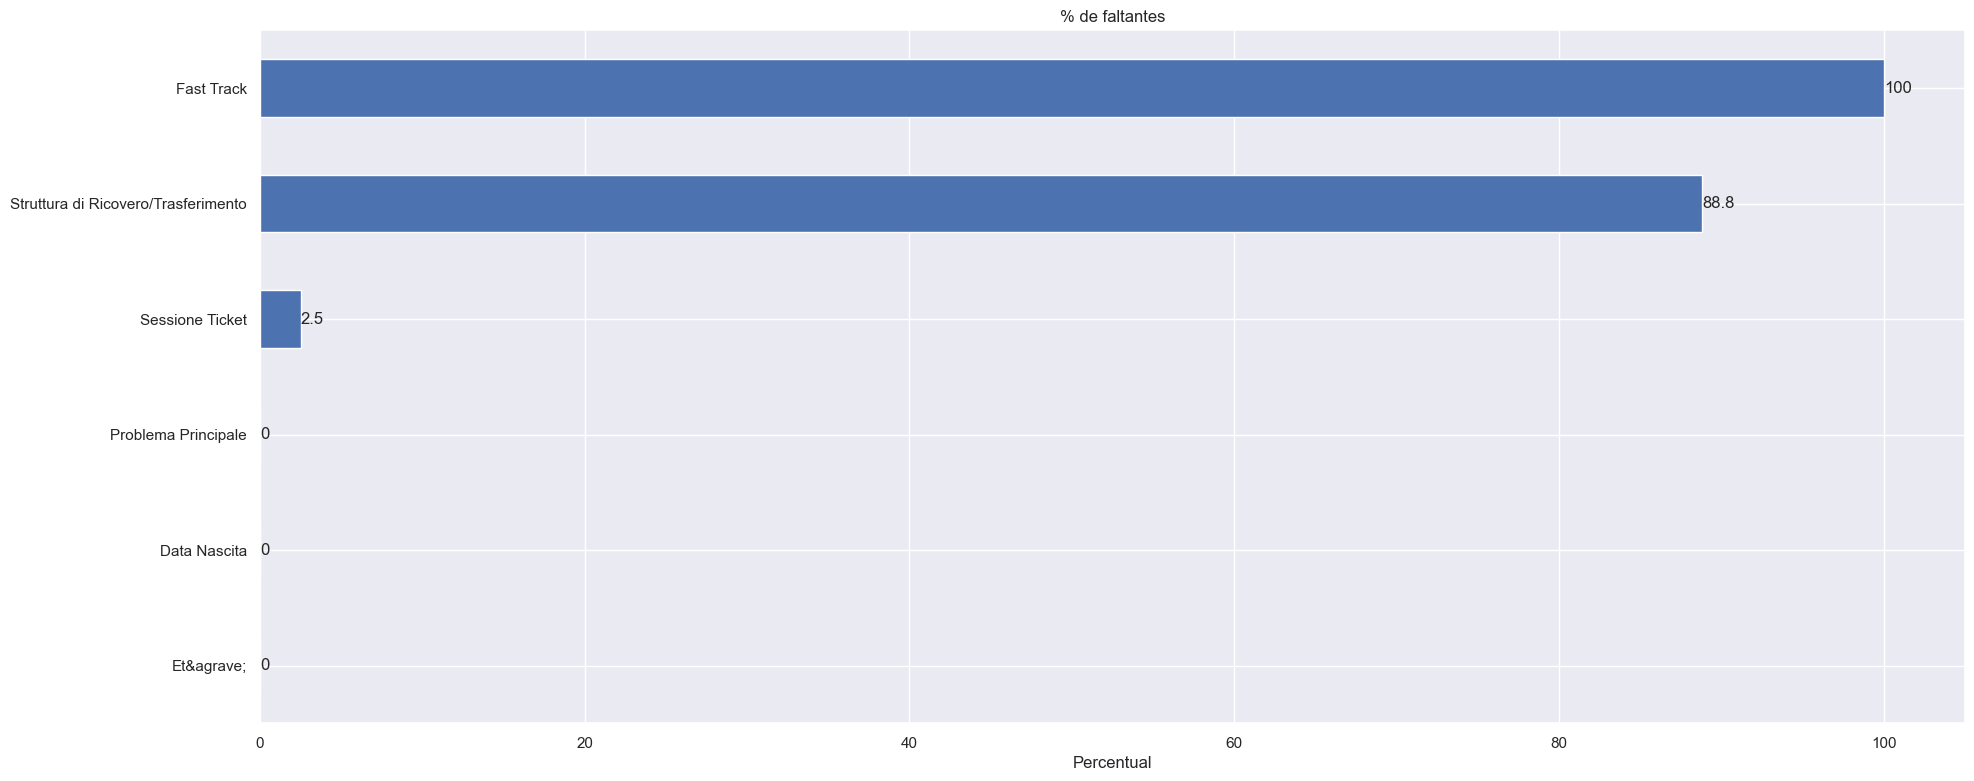

In [10]:
plota_ausentes(df, '% de faltantes', 'Percentual')

In [11]:
df.drop(
    columns=[
        "Fast Track",
        "Struttura",
        "Struttura di Ricovero/Trasferimento",
        "Sessione Ticket",
    ],
    inplace=True,
)

df.dropna(inplace=True)

In [12]:
plota_ausentes(df, '% de faltantes', 'Percentual')

Contagem de faltantes
Urgenza                0
Data Accesso           0
Data Fine Contatto     0
Paziente               0
Modalità Dimissione    0
Problema Principale    0
Numero Scheda PS       0
Medico Dimettente      0
Et&agrave;             0
Operatore Triagista    0
Data Nascita           0
dtype: int64


## 1.7. Estatística Descritiva


In [13]:
# Separando os atributos entre numéricos e categóricos
numericos = df.select_dtypes(exclude=['object'])

categoricos = df.select_dtypes(include=['object'])

### 1.7.1 Atributos Numéricos

In [14]:
numericos.describe().T

,count,mean,min,25%,50%,75%,max,std
Urgenza,160004.00,3.26,1.00,3.00,3.00,4.00,7.00,0.84
Data Accesso,160004,2023-07-16 01:20:43.678907392,2022-01-01 00:00:00,2022-10-24 00:00:00,2023-07-18 00:00:00,2024-04-12 00:00:00,2024-12-31 00:00:00,NaN
Data Fine Contatto,160004,2023-07-16 03:48:32.417189376,2022-01-01 00:00:00,2022-10-24 00:00:00,2023-07-18 00:00:00,2024-04-12 00:00:00,2025-01-01 00:00:00,NaN
Et&agrave;,160004.00,46.99,0.00,26.00,47.00,68.00,125.00,26.04
Data Nascita,160004,1978-05-30 11:41:42.747431328,1900-01-01 00:00:00,1956-11-28 00:00:00,1978-05-31 00:00:00,1999-08-14 00:00:00,2024-12-22 00:00:00,NaN


### 1.7.2 Atributos Categóricos

In [15]:
categoricos.apply(lambda x: x.unique().shape[0]).sort_values(ascending=False)

Numero Scheda PS       159808
Paziente                82135
Medico Dimettente          90
Operatore Triagista        88
Problema Principale        32
Modalità Dimissione        10
dtype: int64

In [16]:
df.sample(5)

,Urgenza,Data Accesso,Data Fine Contatto,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Et&agrave;,Operatore Triagista,Data Nascita
144854,4,2024-09-08,2024-09-08,PORTA GIUSEPPINA,Dimissione a domicilio,Trauma,2024039198,RODA ANDREA,67.00,PEZZOTTI GIULIETTA,1958-08-01
149562,3,2024-12-27,2024-12-27,COSENTINO SILVIO,Dimissione a domicilio,Sintomi o disturbi oculistici,2024056221,DI GIROLAMO GIOVANNI,35.00,LANCINI ALESSANDRA,1990-06-26
132706,2,2024-06-06,2024-06-06,CERUTI CLAUDIA,Dimissione a domicilio,Sintomi o disturbi ostetrico-ginecologici,2024024681,BASSANI RAFFAELLA,41.00,CATTANEO SILVIA,1984-03-25
38962,4,2022-02-22,2022-02-22,STUTO GIOVANNI MARCELLO,Dimissione a domicilio,Sintomi o disturbi otorinolaringoiatrici,2022006066,RODA ANDREA,22.00,RIZZELLI GIUSEPPE,2003-09-22
148728,3,2024-12-21,2024-12-21,KAUR TAJPREET,Dimissione a domicilio,Altri sintomi o disturbi,2024055359,BRAGA FLORIANA,4.00,FERRARI MARIA,2021-10-07


## 1.8 Filtros

### 1.8.1. Filtros de alteração

In [17]:
df.loc[df['Idade'] > 100].shape

KeyError: 'Idade'

In [ ]:
df.loc[df['Idade'] > 100][['Paziente', 'Idade']].groupby('Paziente').max()

,Idade
Paziente,
ABBATE ANNA,103
BETTERA ADELE,102
BINELLE ERMENEGILDO,102
BOSCHETTI CHIARA EUGENIA,105
DONATI MARIO,103
FIORINI GIOVANNI,102
GUARIENTI FRANCESCA,101
GUERINI DOMENICA,102
GUGLIELMI ALBINA,105


In [18]:
df.sort_values(['Data Nascita']).head()

,Urgenza,Data Accesso,Data Fine Contatto,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Et&agrave;,Operatore Triagista,Data Nascita
32478,4,2022-12-02,2022-12-02,2022046052 SCONOSCIUTO,Il paziente abbandona il PS prima della visita...,Altri sintomi o disturbi,2022046052,GHEZZI ANNIBALE,125.00,FERRARI MARIA,1900-01-01
67135,2,2023-08-04,2023-08-04,2023032793 SCONOSCIUTO,Inserito per errore,Sindrome neurologica acuta,2023032793,RODA ANDREA,125.00,RODA ANDREA,1900-01-01
71904,3,2023-01-17,2023-01-18,2023002330 SCONOSCIUTO,Il paziente abbandona il PS prima della visita...,Problema sociale,2023002330,CAMOTTI GIANNI,125.00,PELLEGRINI LUCA,1900-01-01
89861,4,2023-12-23,2023-12-23,2023054149 SCONOSCIUTO,Il paziente abbandona il PS in corso di accert...,Altri sintomi o disturbi,2023054149,MASSOLARI ROBERTO,125.00,PEZZOTTI GIULIETTA,1900-01-01
113500,4,2024-01-20,2024-01-21,2024002975 SCONOSCIUTO,Il paziente abbandona il PS in corso di accert...,Altri sintomi o disturbi,2024002975,MARINO FRANCESCO,125.00,PEZZOTTI GIULIETTA,1900-01-01


### 1.8.2. Filtros de exclusão

In [19]:
def subcategoria(dframe):
    # Criar uma coluna chamada 'Subgrupo Usuário' com os seguintes subgrupos:
    # < 4 atendimentos (Common user),
    # 4–5 atendimentos (Frequent User),
    # 6–9 atendimentos (High user),
    # ≥10 atendimentos (Heavy users)

    # Primeiro, contar quantos atendimentos cada Paziente teve
    contagem_por_paciente = df.groupby("Paziente").size()

    # Criar um dicionário mapeando cada Paziente para sua categoria
    def categoriza_paciente(quantidade):
        if quantidade < 4:
            return "Common user"
        elif quantidade <= 5:
            return "Frequent User"
        elif quantidade <= 9:
            return "High User"
        else:
            return "Heavy User"

    # Mapear cada paciente para sua categoria
    mapa_categorias = contagem_por_paciente.apply(categoriza_paciente)
    dframe["Subgrupo Usuário"] = dframe["Paziente"].map(mapa_categorias)

    return dframe


def filtra_pacientes(dataframe):
    # Excluir pacientes com data de nascimento inválida
    dataframe = dataframe[dataframe["Data Nascita"] >= pd.Timestamp("1900-01-03")]

    # Calcular a idade com base na data Data Accesso e Data Nascita
    dataframe["Idade"] = dataframe.apply(
        lambda row: (
            int((row["Data Accesso"] - row["Data Nascita"]).days / 365.25)
        ),
        axis=1,
    )

    # Excluir pacientes com nomes específicos
    exclusão = [
        "KAUR AMANDEEP",
        "KAUR HARPREET",
        "EL YAQOUTI MAJDA",
        "KAUR MANDEEP",
        "GUGA INDRIT",
        "SINGH SUKHWINDER",
        "BAHYOUNE ABDERRAHIM",
        "CITTASISS CENTO",
        "SABRI AHMED",
        "MUHAMMAD ZAHOOR",
        "KAUR MANPREET",
        "KAUR SANDEEP",
        "SINGH KARTAR",
        "SINGH TARSEM",
        "CITTASISS SEICENTOVENTI",
        "PROVA RICOVERODUE",
        "DISHA FIKE",
        "SINGH AMANDEEP",
        "KAUR BALJIT",
        "KAUR PARAMJIT",
        "KAUR MANDEEP",
        "KAUR AMANDEEP",
        "SINGH KARTAR",
        "SINGH TARSEM",
    ]

    dataframe = dataframe[~dataframe["Paziente"].isin(exclusão)]


    # Filtrar apenas os pacientes sem problemas ginecológicos
    dataframe = dataframe[
        dataframe["Problema Principale"] != "Sintomi o disturbi ostetrico-ginecologici"
    ]
    # Filtrar pacientes maiores que 14 anos
    dataframe = dataframe[dataframe["Idade"] > 14]
    return dataframe

def aplica_filtros(dataframe):
    aux = subcategoria(dataframe)
    aux = filtra_pacientes(aux)
    return aux

# Adicionar a coluna no dataframe original
df = aplica_filtros(df)
ano_2022 = aplica_filtros(ano_2022)
ano_2023 = aplica_filtros(ano_2023)
ano_2024 = aplica_filtros(ano_2024)


# Verificar a distribuição das categorias criadas
print("Distribuição de ATENDIMENTOS por categoria:")
print(df["Subgrupo Usuário"].value_counts().sort_index())
print("\n" + "=" * 80)


print("Distribuição de PACIENTES ÚNICOS por categoria:")
pacientes_unicos_por_categoria = (
    df.groupby("Subgrupo Usuário")["Numero Scheda PS"].nunique().sort_index()
)
print(pacientes_unicos_por_categoria)
print("\n" + "=" * 80)
print(f"Total de pacientes únicos: {df['Numero Scheda PS'].nunique()}")
print(f"Total de atendimentos: {len(df)}")

Distribuição de ATENDIMENTOS por categoria:
Subgrupo Usuário
Common user      83551
Frequent User    20270
Heavy User        7695
High User        14414
Name: count, dtype: int64

Distribuição de PACIENTES ÚNICOS por categoria:
Subgrupo Usuário
Common user      83482
Frequent User    20228
Heavy User        7688
High User        14378
Name: Numero Scheda PS, dtype: int64

Total de pacientes únicos: 125776
Total de atendimentos: 125930


In [20]:
# # Criar uma coluna chamada 'Subgrupo Usuário' com os seguintes subgrupos:
# # < 4 atendimentos (Common user),
# # 4–5 atendimentos (Frequent User),
# # 6–9 atendimentos (High user),
# # ≥10 atendimentos (Heavy users)

# # Primeiro, contar quantos atendimentos cada Paziente teve
# contagem_por_paciente = df.groupby("Paziente").size()

# # Criar um dicionário mapeando cada Paziente para sua categoria
# def categoriza_paciente(quantidade):
#     if quantidade < 4:
#         return "Common user"
#     elif quantidade <= 5:
#         return "Frequent User"
#     elif quantidade <= 9:
#         return "High User"
#     else:
#         return "Heavy User"

# # Mapear cada paciente para sua categoria
# mapa_categorias = contagem_por_paciente.apply(categoriza_paciente)

# # Adicionar a coluna no dataframe original
# df["Subgrupo Usuário"] = df["Paziente"].map(mapa_categorias)
# ano_2022["Subgrupo Usuário"] = ano_2022["Paziente"].map(mapa_categorias)
# ano_2023["Subgrupo Usuário"] = ano_2023["Paziente"].map(mapa_categorias)
# ano_2024["Subgrupo Usuário"] = ano_2024["Paziente"].map(mapa_categorias)

# # Excluir pacientes com data de nascimento inválida
# df = df[df["Data Nascita"] >= pd.Timestamp("1900-01-03")]
# ano_2022 = ano_2022[ano_2022["Data Nascita"] >= pd.Timestamp("1900-01-03")]
# ano_2023 = ano_2023[ano_2023["Data Nascita"] >= pd.Timestamp("1900-01-03")]
# ano_2024 = ano_2024[ano_2024["Data Nascita"] >= pd.Timestamp("1900-01-03")]

# # Calcular a idade com base na data Data Accesso e Data Nascita
# df["Idade"] = df.apply(
#     lambda row: (
#         int((row["Data Accesso"] - row["Data Nascita"]).days / 365.25)
#         if pd.notna(row["Data Nascita"]) and pd.notna(row["Data Accesso"])
#         else None
#     ),
#     axis=1,
# )
# ano_2022["Idade"] = ano_2022.apply(
#     lambda row: (
#         int((row["Data Accesso"] - row["Data Nascita"]).days / 365.25)
#         if pd.notna(row["Data Nascita"]) and pd.notna(row["Data Accesso"])
#         else None
#     ),
#     axis=1,
# )
# ano_2023["Idade"] = ano_2023.apply(
#     lambda row: (
#         int((row["Data Accesso"] - row["Data Nascita"]).days / 365.25)
#         if pd.notna(row["Data Nascita"]) and pd.notna(row["Data Accesso"])
#         else None
#     ),
#     axis=1,
# )
# ano_2024["Idade"] = ano_2024.apply(
#     lambda row: (
#         int((row["Data Accesso"] - row["Data Nascita"]).days / 365.25)
#         if pd.notna(row["Data Nascita"]) and pd.notna(row["Data Accesso"])
#         else None
#     ),
#     axis=1,
# )

# # Excluir pacientes com nomes específicos
# exclusão = [
#     "KAUR AMANDEEP",
#     "KAUR HARPREET",
#     "EL YAQOUTI MAJDA",
#     "KAUR MANDEEP",
#     "GUGA INDRIT",
#     "SINGH SUKHWINDER",
#     "BAHYOUNE ABDERRAHIM",
#     "CITTASISS CENTO",
#     "SABRI AHMED",
#     "MUHAMMAD ZAHOOR",
#     "KAUR MANPREET",
#     "KAUR SANDEEP",
#     "SINGH KARTAR",
#     "SINGH TARSEM",
#     "CITTASISS SEICENTOVENTI",
#     "PROVA RICOVERODUE",
#     "DISHA FIKE",
#     "SINGH AMANDEEP",
#     "KAUR BALJIT",
#     "KAUR PARAMJIT",
#     "KAUR MANDEEP",
#     "KAUR AMANDEEP",
#     "SINGH KARTAR",
#     "SINGH TARSEM",
# ]

# df = df[~df["Paziente"].isin(exclusão)]
# ano_2022 = ano_2022[~ano_2022["Paziente"].isin(exclusão)]
# ano_2023 = ano_2023[~ano_2023["Paziente"].isin(exclusão)]
# ano_2024 = ano_2024[~ano_2024["Paziente"].isin(exclusão)]


# def aplica_filtros(dataframe):
#     # Filtrar apenas os pacientes sem problemas ginecológicos
#     dataframe = dataframe[
#         dataframe["Problema Principale"] != "Sintomi o disturbi ostetrico-ginecologici"
#     ]
#     # Filtrar pacientes maiores que 14 anos
#     dataframe = dataframe[dataframe["Idade"] > 14]
#     return dataframe


# # Verificar a distribuição das categorias criadas
# print("Distribuição de ATENDIMENTOS por categoria:")
# print(df["Subgrupo Usuário"].value_counts().sort_index())
# print("\n" + "=" * 80)


# print("Distribuição de PACIENTES ÚNICOS por categoria:")
# pacientes_unicos_por_categoria = (
#     df.groupby("Subgrupo Usuário")["Numero Scheda PS"].nunique().sort_index()
# )
# print(pacientes_unicos_por_categoria)
# print("\n" + "=" * 80)
# print(f"Total de pacientes únicos: {df['Numero Scheda PS'].nunique()}")
# print(f"Total de atendimentos: {len(df)}")

In [21]:
# Conferindo a volumetria
print("Números totais da base")
print(f"Atendimentos:           {df.shape[0]}")
print(f"Pazientes:              {df['Paziente'].nunique()}")
print(f"Cartões PS únicos:      {df['Numero Scheda PS'].nunique()}")
print(f"Cartões PS repetidos:   {df.shape[0] - df['Numero Scheda PS'].nunique()}")

Números totais da base
Atendimentos:           125930
Pazientes:              66180
Cartões PS únicos:      125776
Cartões PS repetidos:   154


Dados anteriores:

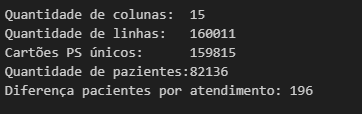

# 2 - Análise exploratória dos dados

## 2.1. Análise Univariada

### Verificando a variância das variáveis numéricas

In [22]:
df.shape

(125930, 13)

In [23]:
numericos.columns

Index(['Urgenza', 'Data Accesso', 'Data Fine Contatto', 'Et&agrave;',
       'Data Nascita'],
      dtype='object')

## 2.2. Análise Bivariada

In [24]:
df.head(2)

,Urgenza,Data Accesso,Data Fine Contatto,Paziente,Modalità Dimissione,Problema Principale,Numero Scheda PS,Medico Dimettente,Et&agrave;,Operatore Triagista,Data Nascita,Subgrupo Usuário,Idade
0,3,2022-01-01,2022-01-01,MARINO FRANCESCO,Dimissione a domicilio,Febbre,2022000001,MARINI MARIA ELENA,43.00,CRESCINI SONIA,1982-11-19,Common user,39
1,2,2022-01-01,2022-01-01,BRIOLA THOMAS,Dimissione a domicilio,Autolesionismo,2022000002,MARINI MARIA ELENA,47.00,MACALUSO LIBORIO FABIO,1978-05-11,Common user,43


### Lista dos pacientes com mais atendimentos por período

,Quantidade de Visitas
Paziente,
PERI GINA,68
GUERRINI FRANCA,68
ALI MAGID,64
PRANDINI LAURA SIMONETTA,45
BARESI NATALE,40
NICOLAE STRUGURICA,38
VILLA VIVIANA,37
NOCELLA CECILIA,36
MAZZOCCHI RAFFAELLA,35


<Figure size 1400x800 with 0 Axes>

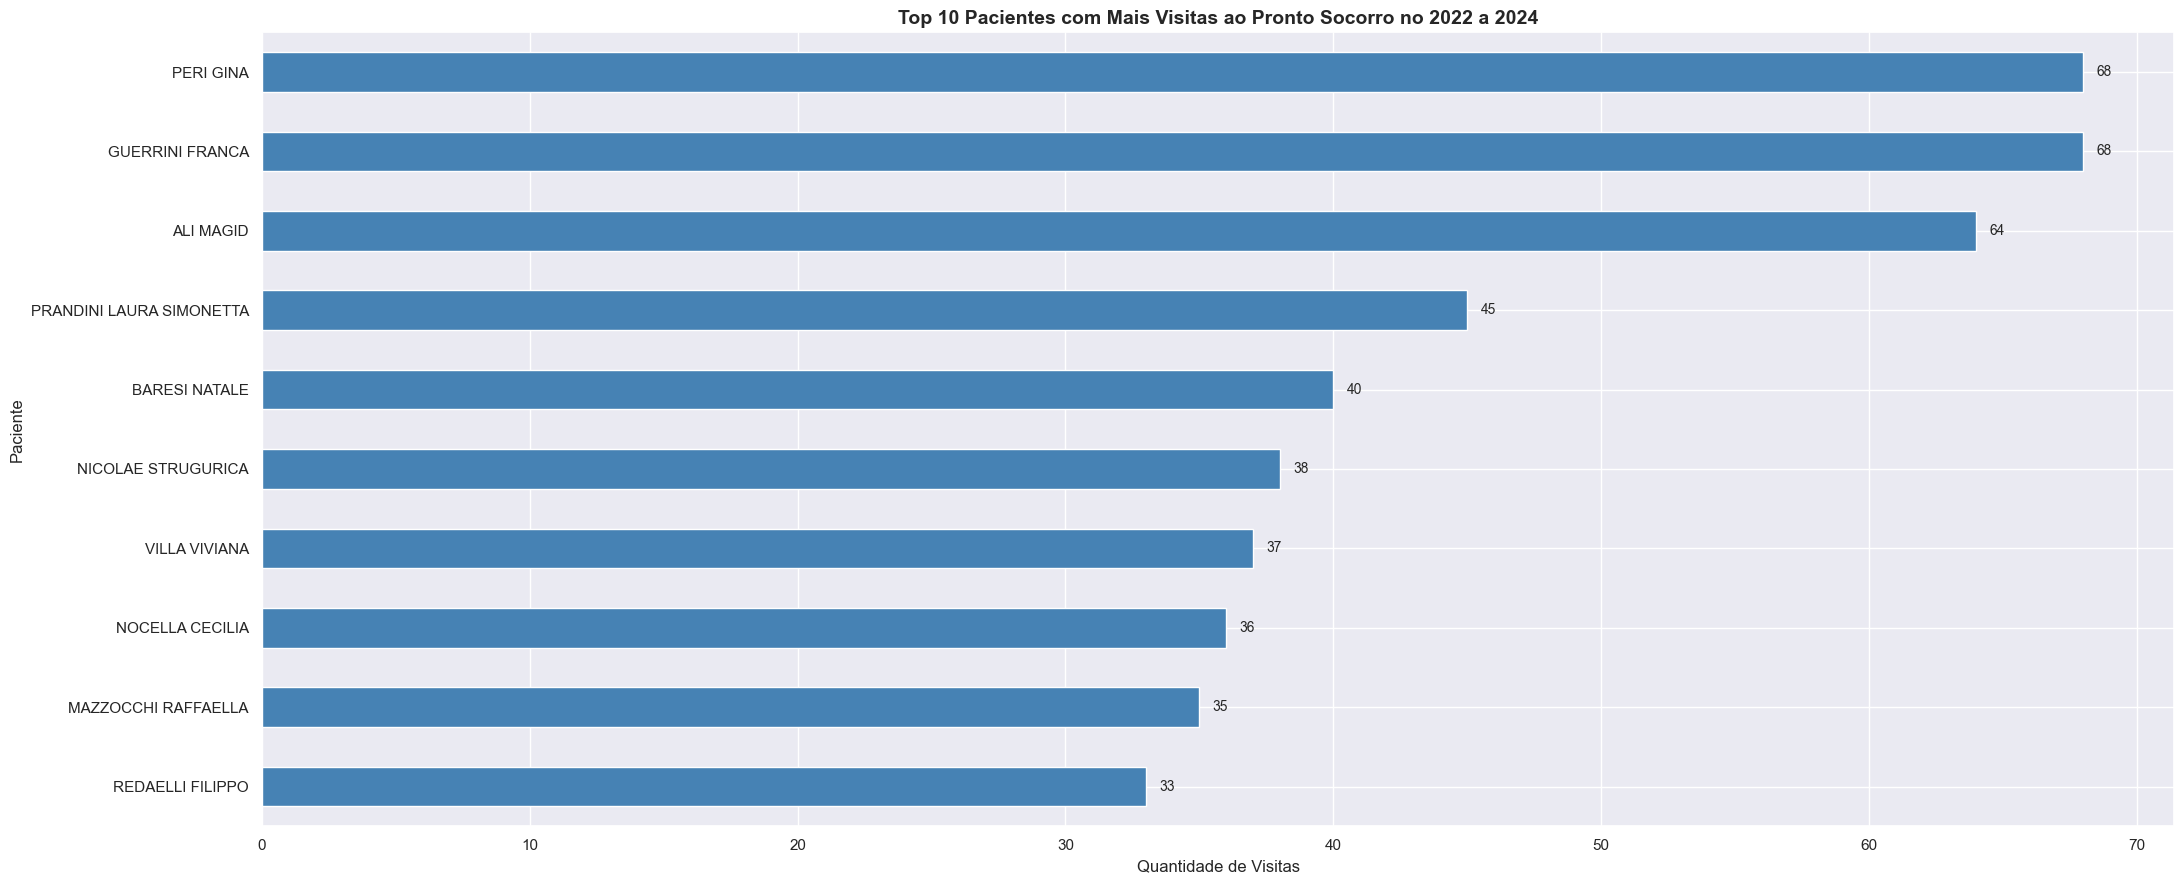

In [25]:
def agrupa(dataframe, top_n=10):
    # Quais os nomes dos 10 pacientes que mais comparecerem ao PS e quantas vezes?
    agrupado = dataframe[['Paziente', 'Numero Scheda PS']].groupby(['Paziente']).count().sort_values(by='Numero Scheda PS', ascending=False).head(top_n)
    agrupado.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)
    
    display(agrupado)
    return agrupado

def gera_graficos_agrupados(dataframe, titulo_periodo, top_n=10):
    # Gráfico de barras - Top 10 pacientes com mais visitas ao PS
    plt.figure(figsize=(14, 8))
    ax = dataframe.sort_values(by='Quantidade de Visitas', ascending=True).plot(kind='barh', legend=False, color='steelblue')
    ax.set_xlabel('Quantidade de Visitas', fontsize=12)
    ax.set_ylabel('Paciente', fontsize=12)

    ax.set_title(f'Top {top_n} Pacientes com Mais Visitas ao Pronto Socorro no ' + titulo_periodo, fontsize=14, fontweight='bold')

    # Adicionar valores nas barras
    for i, v in enumerate(dataframe.sort_values(by='Quantidade de Visitas', ascending=True)['Quantidade de Visitas']):
        ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

    plt.tight_layout()
    plt.show();

def plota_mais_frequentes(dataframe, titulo, top_n=10):
    agrupado = agrupa(dataframe, top_n)  
    gera_graficos_agrupados(agrupado, titulo, top_n)

plota_mais_frequentes(df, '2022 a 2024', top_n=10)

In [26]:
# def agrupa2(dataframe):
#     # Quais os nomes dos 10 pacientes que mais comparecerem ao PS e quantas vezes?
#     agrupado = dataframe[['Paziente', 'Numero Scheda PS']].groupby(['Paziente']).count().sort_values(by='Numero Scheda PS', ascending=False)
#     agrupado.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)
    
    
#     return agrupado

# todos = agrupa2(df)
# display(todos.shape)

In [27]:
# Quais os nomes dos 10 pacientes que mais comparecerem ao PS e quantas vezes?
agrupado = df[['Paziente', 'Numero Scheda PS']].groupby(['Paziente']).count().sort_values(by='Numero Scheda PS', ascending=False).head(20)
agrupado.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)

periodo = "período de 2022 a 2024"
agrupado

,Quantidade de Visitas
Paziente,
PERI GINA,68
GUERRINI FRANCA,68
ALI MAGID,64
PRANDINI LAURA SIMONETTA,45
BARESI NATALE,40
NICOLAE STRUGURICA,38
VILLA VIVIANA,37
NOCELLA CECILIA,36
MAZZOCCHI RAFFAELLA,35


<Figure size 1400x800 with 0 Axes>

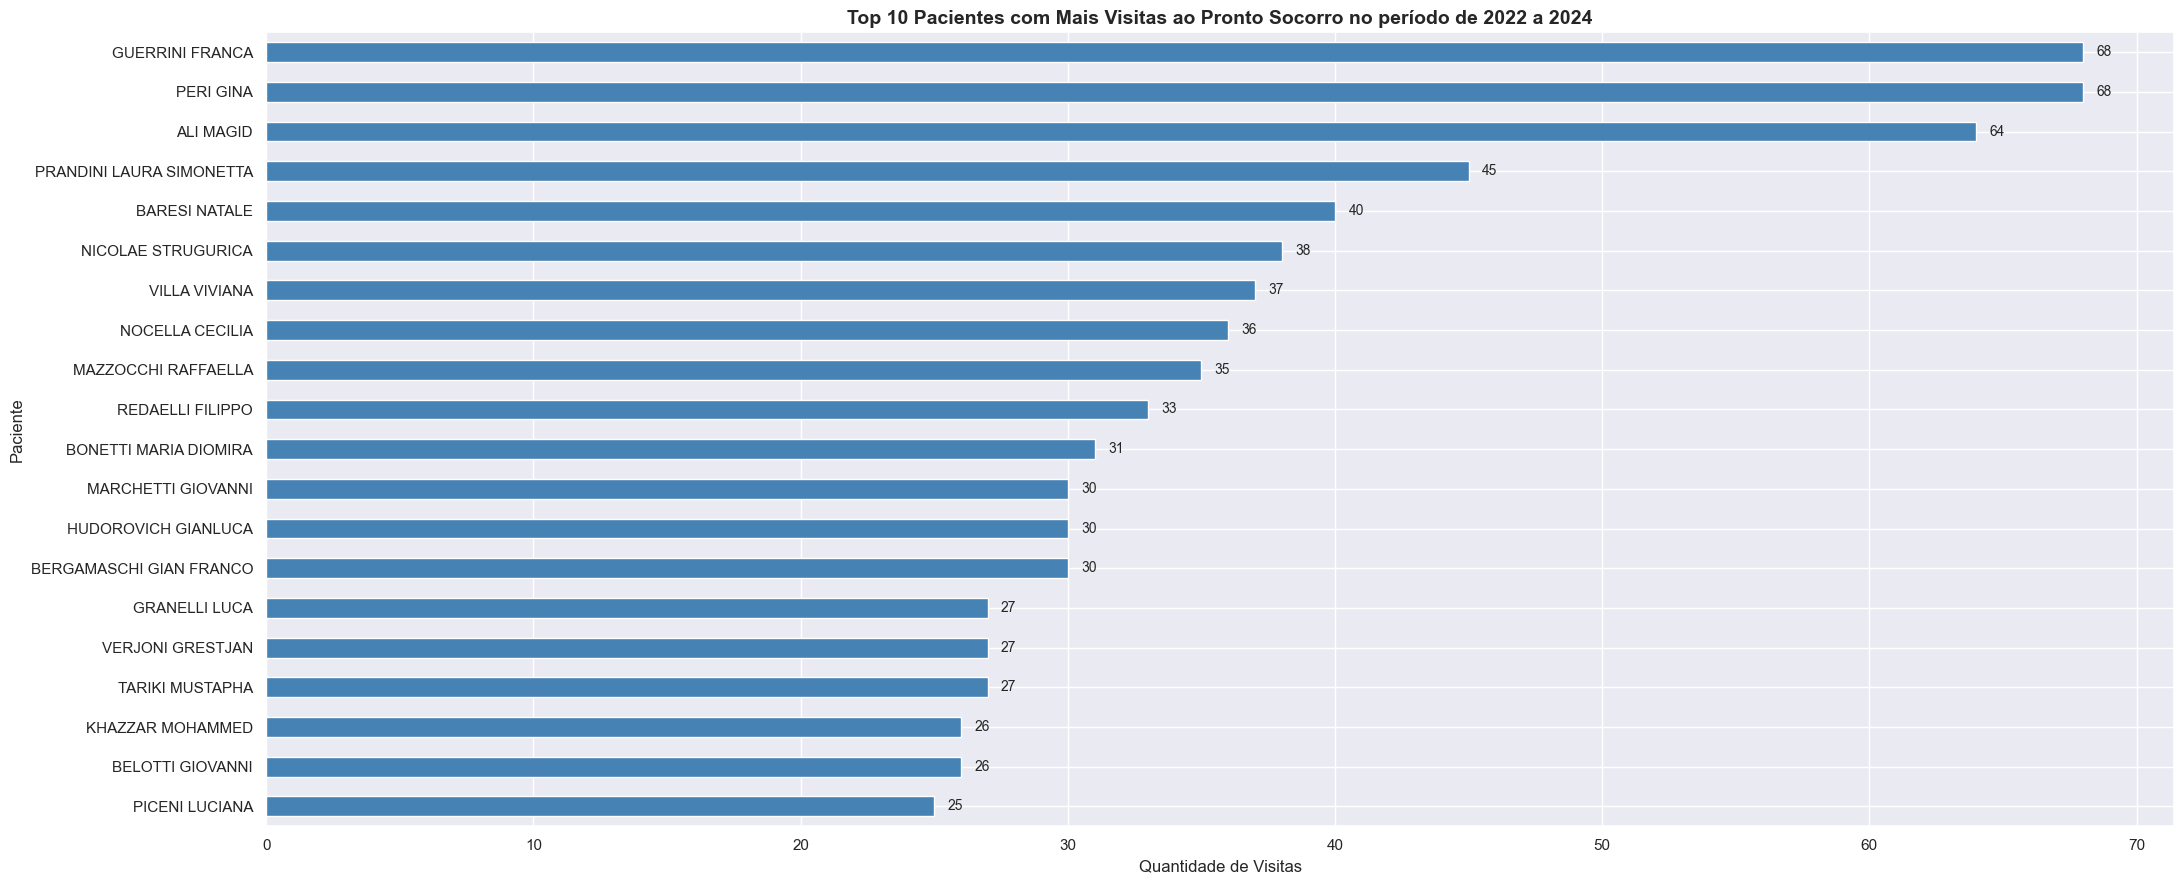

In [28]:
# Gráfico de barras - Top 10 pacientes com mais visitas ao PS
plt.figure(figsize=(14, 8))
ax = agrupado.sort_values(by='Quantidade de Visitas', ascending=True).plot(kind='barh', legend=False, color='steelblue')
ax.set_xlabel('Quantidade de Visitas', fontsize=12)
ax.set_ylabel('Paciente', fontsize=12)

ax.set_title('Top 10 Pacientes com Mais Visitas ao Pronto Socorro no ' + periodo, fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(agrupado.sort_values(by='Quantidade de Visitas', ascending=True)['Quantidade de Visitas']):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show();

### Lista dos pacientes com mais atendimentos (nome e idade)

In [29]:
# Calcular a idade dos pacientes a partir da data de nascimento
from datetime import datetime

# Agrupar por paciente e contar visitas, mantendo a idade
pacientes_info = (
    df[['Paziente', 'Numero Scheda PS', 'Idade']]
    .groupby(['Paziente', 'Idade'])
    .count()
    .reset_index()
    .sort_values(by='Numero Scheda PS', ascending=False)
    .head(20)
)

# Renomear colunas para melhor visualização
pacientes_info.rename(
    columns={
        'Paziente': 'Nome do Paciente',
        'Numero Scheda PS': 'Quantidade de Visitas',
        'Idade': 'Idade (anos)'
    }, 
    inplace=True
)

# Resetar o índice para exibição mais limpa
pacientes_info.reset_index(drop=True, inplace=True)
pacientes_info.index = pacientes_info.index + 1  # Começar índice em 1

print(f"Top 10 Pacientes com Mais Atendimentos no PS - {periodo}")
print("=" * 80)
pacientes_info

Top 10 Pacientes com Mais Atendimentos no PS - período de 2022 a 2024


,Nome do Paciente,Idade (anos),Quantidade de Visitas
1,ALI MAGID,54,57
2,GUERRINI FRANCA,75,35
3,MAZZOCCHI RAFFAELLA,48,27
4,VERJONI GRESTJAN,35,26
5,PERI GINA,88,25
6,NOCELLA CECILIA,59,24
7,PERI GINA,89,23
8,BERGAMASCHI GIAN FRANCO,70,21
9,GUERRINI FRANCA,76,20
10,BONETTI MARIA DIOMIRA,75,17


### Análise de atendimentos por dia da semana

In [30]:
# Converter a coluna de data de entrada para datetime
df["Data Accesso"] = pd.to_datetime(df["Data Accesso"], errors="coerce")

# Criar coluna com o dia da semana
df["Dia_Semana"] = df["Data Accesso"].dt.day_name()

# Mapear os nomes em inglês para italiano
mapeamento_dias = {
    "Monday": "Lunedi",
    "Tuesday": "Martedi",
    "Wednesday": "Mercoledi",
    "Thursday": "Giovedi",
    "Friday": "Venerdi",
    "Saturday": "Sabato",
    "Sunday": "Domenica",
}
df["settimana"] = df["Dia_Semana"].map(mapeamento_dias)

# Contar atendimentos por dia da semana
atendimentos_por_dia = df["settimana"].value_counts()

# Ordenar pelos dias da semana
ordem_dias = [
    "Lunedi",
    "Martedi",
    "Mercoledi",
    "Giovedi",
    "Venerdi",
    "Sabato",
    "Domenica",
]
atendimentos_por_dia = atendimentos_por_dia.reindex(ordem_dias)

print(f"Distribuição de Atendimentos por Dia da Semana - {periodo}")
print("=" * 80)
atendimentos_por_dia

Distribuição de Atendimentos por Dia da Semana - período de 2022 a 2024


settimana
Lunedi       20610
Martedi      18565
Mercoledi    18025
Giovedi      17967
Venerdi      18280
Sabato       16486
Domenica     15997
Name: count, dtype: int64

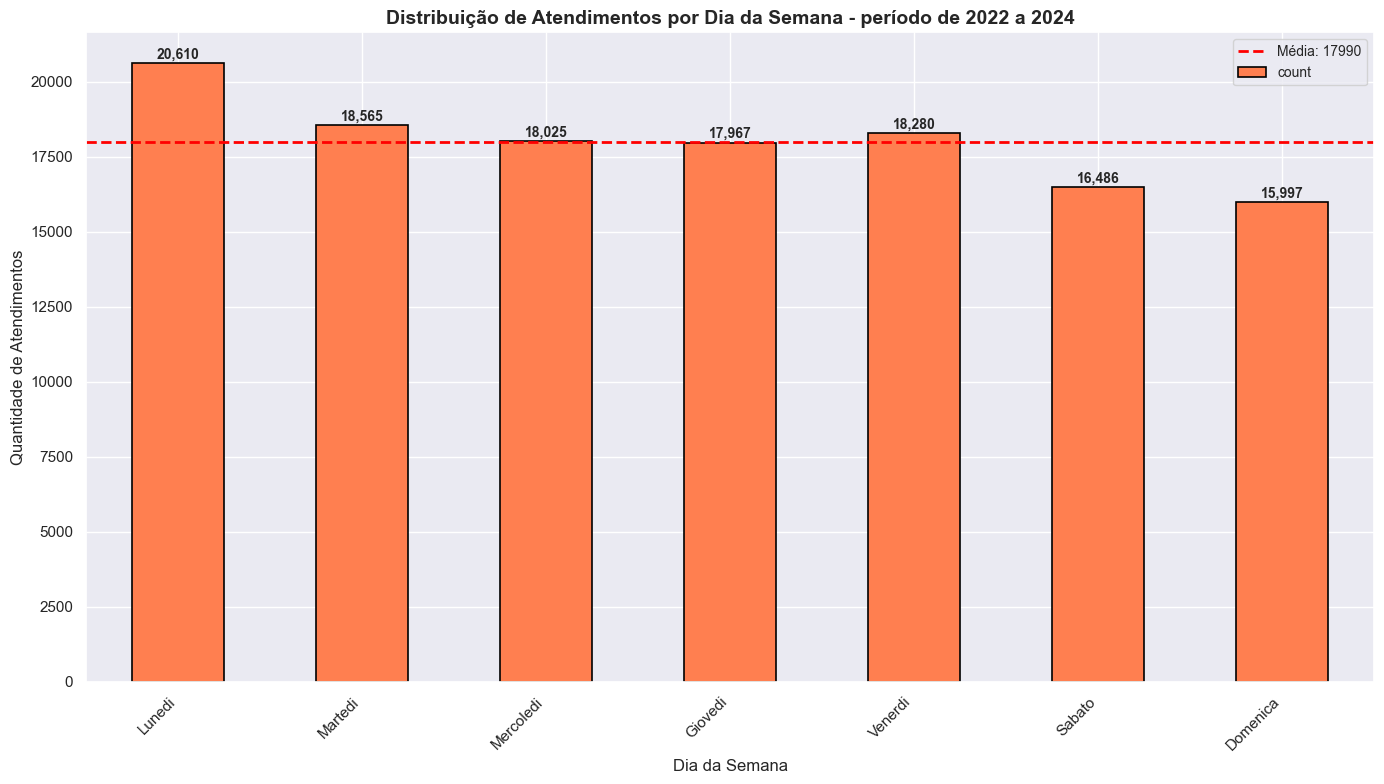

In [31]:
# Gráfico de barras - Atendimentos por dia da semana
plt.figure(figsize=(14, 8))
ax = atendimentos_por_dia.plot(kind='bar', color='coral', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Dia da Semana', fontsize=12)
ax.set_ylabel('Quantidade de Atendimentos', fontsize=12)
ax.set_title(f'Distribuição de Atendimentos por Dia da Semana - {periodo}', 
             fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(atendimentos_por_dia):
    ax.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adicionar linha de média
media_atendimentos = atendimentos_por_dia.mean()
ax.axhline(y=media_atendimentos, color='red', linestyle='--', linewidth=2, 
           label=f'Média: {media_atendimentos:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

### Análise dos 10 principais problemas de saúde

In [32]:
# Contar os principais problemas de saúde
principais_problemas = df['Problema Principale'].value_counts().head(10)

print(f"Top 10 Principais Problemas de Saúde - {periodo}")
print("=" * 80)
principais_problemas

Top 10 Principais Problemas de Saúde - período de 2022 a 2024


Problema Principale
Altri sintomi o disturbi                    38227
Trauma                                      27291
Dolore addominale                           11872
Dolore toracico                              7394
Sintomi o disturbi urologici                 6120
Dispnea                                      5351
Febbre                                       5183
Altri sintomi sistema nervoso                4926
Sintomi o disturbi oculistici                4789
Sintomi o disturbi otorinolaringoiatrici     3608
Name: count, dtype: int64

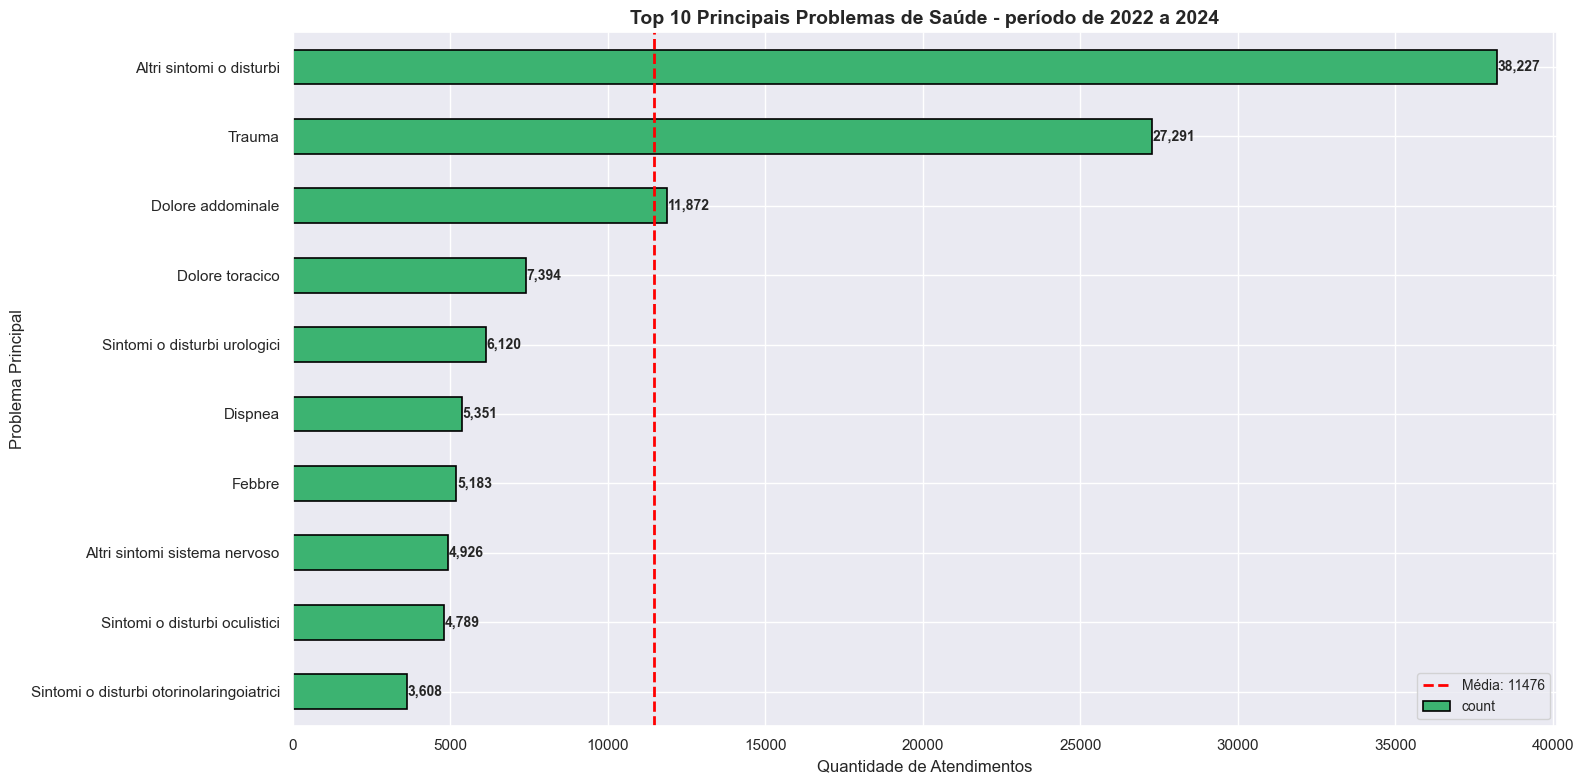

In [33]:
# Gráfico de barras - Top 10 principais problemas
plt.figure(figsize=(16, 8))
ax = principais_problemas.sort_values(ascending=True).plot(
    kind='barh', 
    color='mediumseagreen', 
    edgecolor='black', 
    linewidth=1.2
)
ax.set_xlabel('Quantidade de Atendimentos', fontsize=12)
ax.set_ylabel('Problema Principal', fontsize=12)
ax.set_title(f'Top 10 Principais Problemas de Saúde - {periodo}', 
             fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(principais_problemas.sort_values(ascending=True)):
    ax.text(v + 20, i, f'{v:,}', va='center', fontsize=10, fontweight='bold')

# Adicionar linha de média
media_problemas = principais_problemas.mean()
ax.axvline(x=media_problemas, color='red', linestyle='--', linewidth=2, 
           label=f'Média: {media_problemas:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

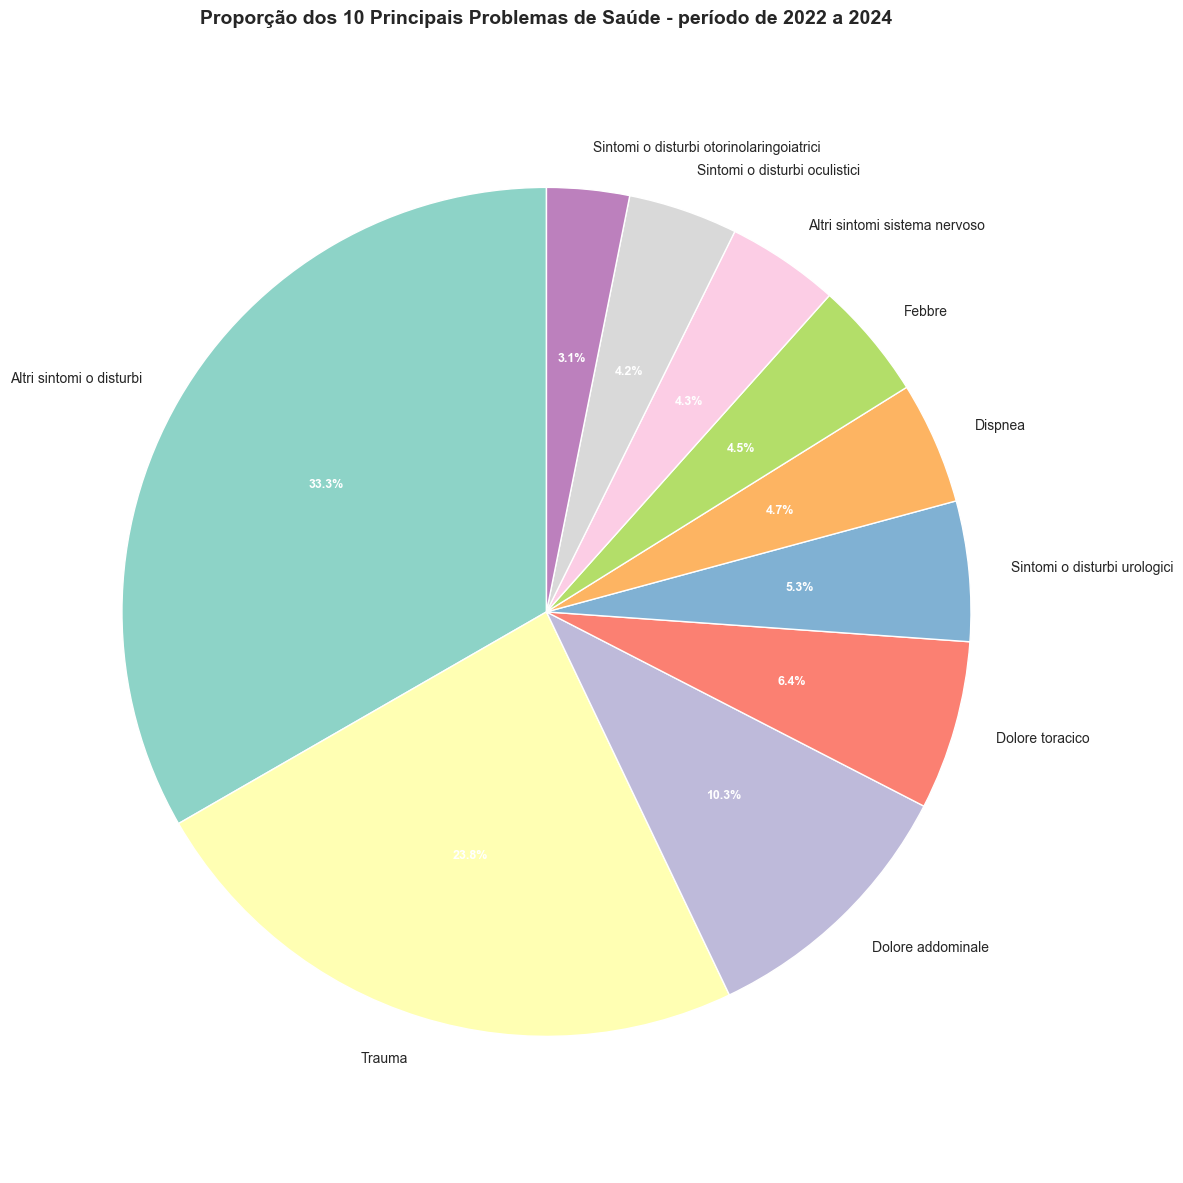

In [34]:
# Gráfico de pizza - Proporção dos 10 principais problemas
plt.figure(figsize=(12, 12))

# Criar o gráfico de pizza
colors = plt.cm.Set3(range(len(principais_problemas)))
wedges, texts, autotexts = plt.pie(
    principais_problemas, 
    labels=principais_problemas.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

# Melhorar a legibilidade dos percentuais
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

plt.title(f'Proporção dos 10 Principais Problemas de Saúde - {periodo}', 
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Análise de atendimentos por mês

In [35]:
# Criar coluna com o mês e ano
df['Mes_Ano'] = df['Data Accesso'].dt.to_period('M')

# Contar atendimentos por mês
atendimentos_por_mes = df['Mes_Ano'].value_counts().sort_index()

# Converter o período de volta para string para melhor visualização
atendimentos_por_mes.index = atendimentos_por_mes.index.astype(str)

# Meses em italiano
mes_ano = {
    '2022-01': 'Gennaio/2022',
    '2022-02': 'Febbraio/2022',
    '2022-03': 'Marzo/2022',
    '2022-04': 'Aprile/2022',
    '2022-05': 'Maggio/2022',
    '2022-06': 'Giugno/2022',
    '2022-07': 'Luglio/2022',
    '2022-08': 'Agosto/2022',
    '2022-09': 'Settembre/2022',
    '2022-10': 'Ottobre/2022',
    '2022-11': 'Novembre/2022',
    '2022-12': 'Dicembre/2022',
    '2023-01': 'Gennaio/2023',
    '2023-02': 'Febbraio/2023',
    '2023-03': 'Marzo/2023',
    '2023-04': 'Aprile/2023',
    '2023-05': 'Maggio/2023',
    '2023-06': 'Giugno/2023',
    '2023-07': 'Luglio/2023',
    '2023-08': 'Agosto/2023',
    '2023-09': 'Settembre/2023',
    '2023-10': 'Ottobre/2023',
    '2023-11': 'Novembre/2023',
    '2023-12': 'Dicembre/2023',
    '2024-01': 'Gennaio/2024',
    '2024-02': 'Febbraio/2024',
    '2024-03': 'Marzo/2024',
    '2024-04': 'Aprile/2024',
    '2024-05': 'Maggio/2024',
    '2024-06': 'Giugno/2024',
    '2024-07': 'Luglio/2024',
    '2024-08': 'Agosto/2024',
    '2024-09': 'Settembre/2024',
    '2024-10': 'Ottobre/2024',
    '2024-11': 'Novembre/2024',
    '2024-12': 'Dicembre/2024',    
    }

df['Mes_Ano_It'] = df['Mes_Ano'].astype(str).map(mes_ano)
df.head()

print(f"Distribuição de Atendimentos por Mês - {periodo}")
print("=" * 80)
atendimentos_por_mes

Distribuição de Atendimentos por Mês - período de 2022 a 2024


Mes_Ano
2022-01    2849
2022-02    2795
2022-03    3345
2022-04    3393
2022-05    3591
2022-06    3561
2022-07    3574
2022-08    3212
2022-09    3386
2022-10    3542
2022-11    3310
2022-12    3430
2023-01    3527
2023-02    3307
2023-03    3521
2023-04    3392
2023-05    3670
2023-06    3596
2023-07    3686
2023-08    3507
2023-09    3526
2023-10    3567
2023-11    3457
2023-12    3557
2024-01    3440
2024-02    3398
2024-03    3640
2024-04    3703
2024-05    3771
2024-06    3622
2024-07    3859
2024-08    3680
2024-09    3577
2024-10    3748
2024-11    3594
2024-12    3597
Name: count, dtype: int64

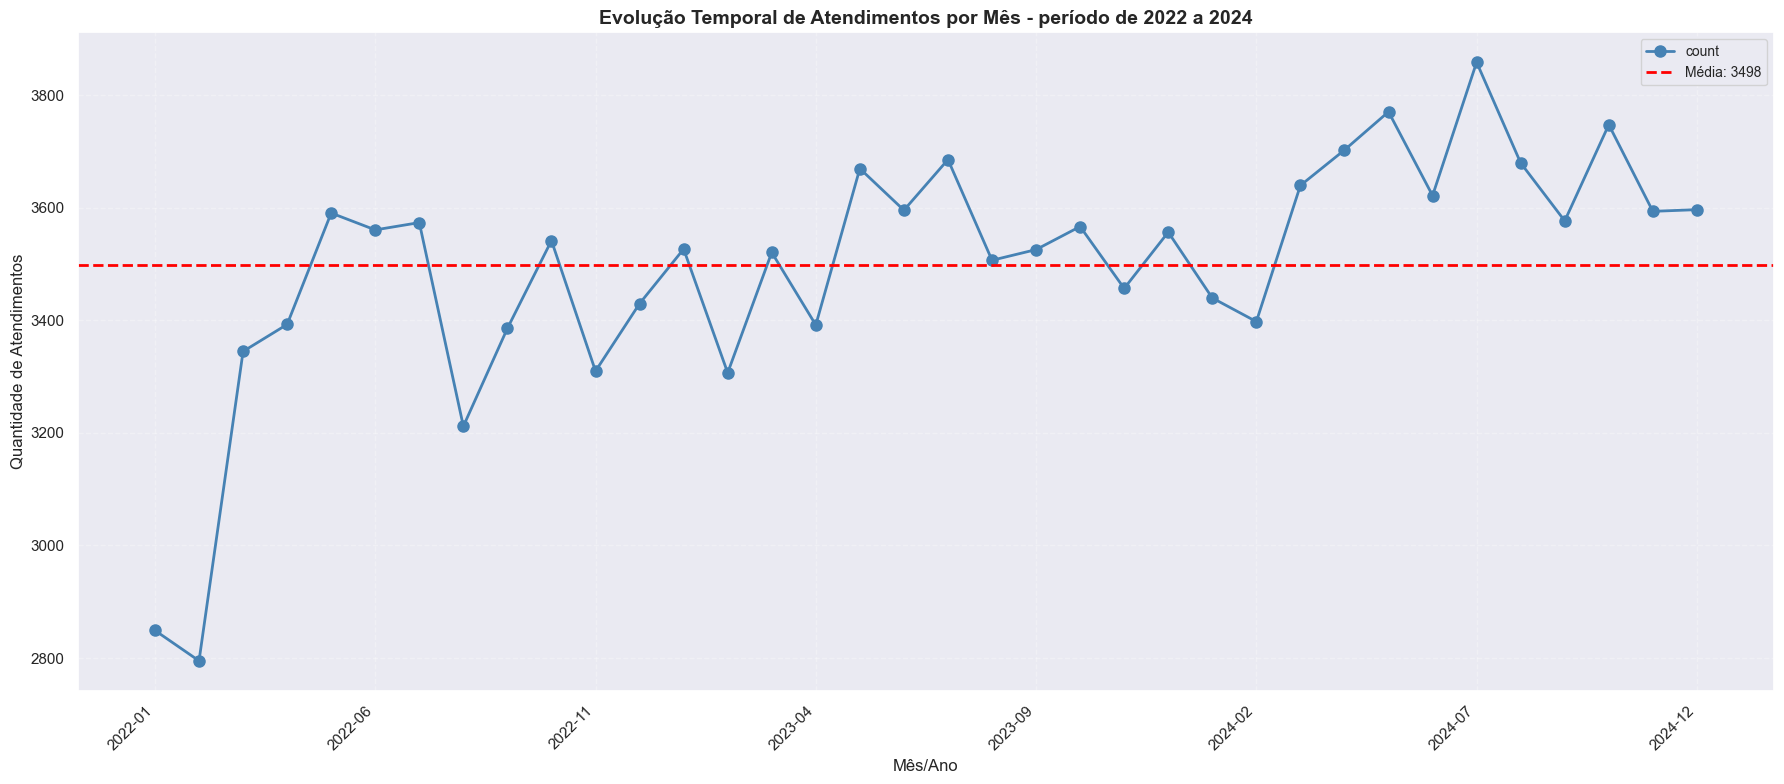

In [36]:
# Gráfico de linha - Atendimentos por mês
plt.figure(figsize=(18, 8))
ax = atendimentos_por_mes.plot(kind='line', marker='o', linewidth=2, markersize=8, color='steelblue')
ax.set_xlabel('Mês/Ano', fontsize=12)
ax.set_ylabel('Quantidade de Atendimentos', fontsize=12)
ax.set_title(f'Evolução Temporal de Atendimentos por Mês - {periodo}', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')

# Rotacionar labels do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar linha de média
media_mensal = atendimentos_por_mes.mean()
ax.axhline(y=media_mensal, color='red', linestyle='--', linewidth=2, 
           label=f'Média: {media_mensal:.0f}')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

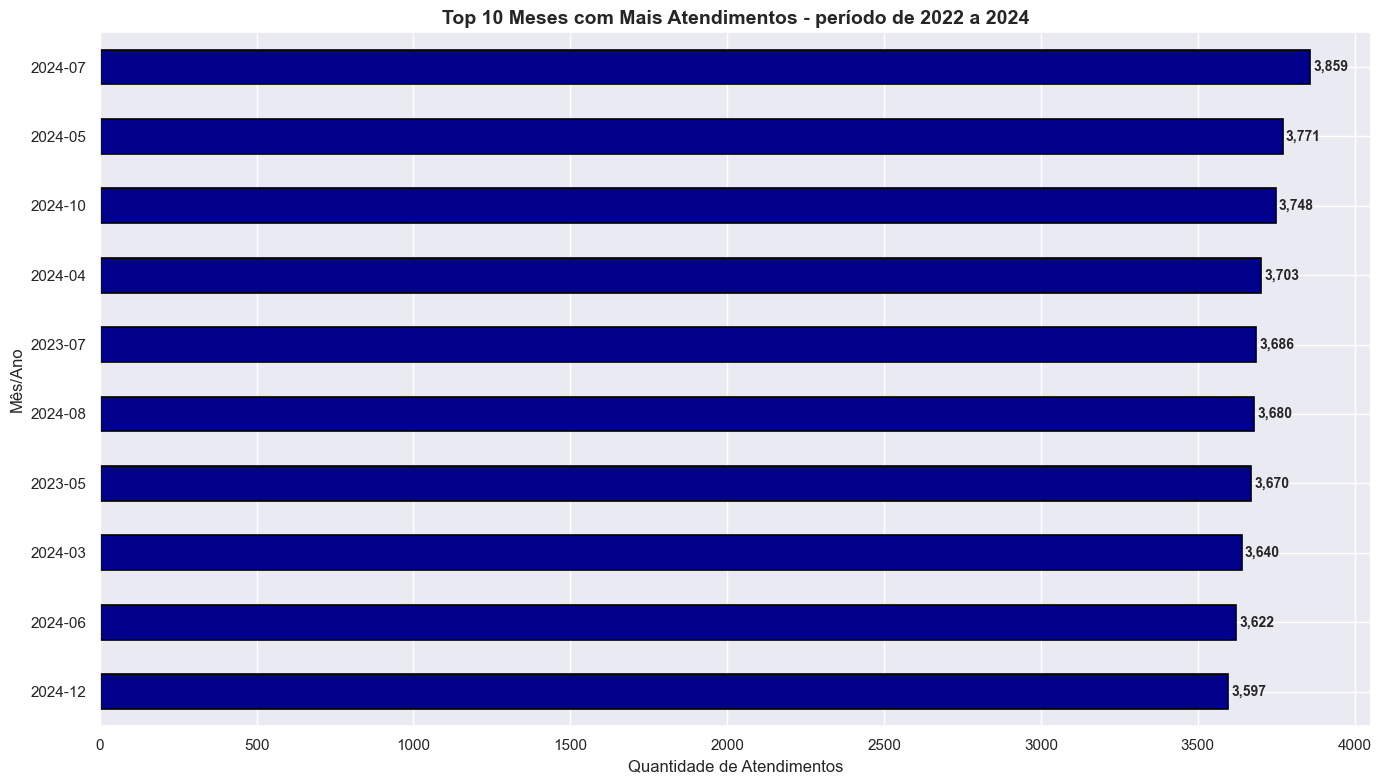

In [37]:
# Top 10 meses com mais atendimentos
top_10_meses = atendimentos_por_mes.nlargest(10)

# Gráfico de barras - Top 10 meses
plt.figure(figsize=(14, 8))
ax = top_10_meses.sort_values(ascending=True).plot(
    kind='barh', 
    color='darkblue', 
    edgecolor='black', 
    linewidth=1.2
)
ax.set_xlabel('Quantidade de Atendimentos', fontsize=12)
ax.set_ylabel('Mês/Ano', fontsize=12)
ax.set_title(f'Top 10 Meses com Mais Atendimentos - {periodo}', 
             fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for i, v in enumerate(top_10_meses.sort_values(ascending=True)):
    ax.text(v + 10, i, f'{v:,}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Análise de categorias de usuários (Subgrupo Usuário)

In [38]:
pacientes_unicos = df[['Paziente', 'Subgrupo Usuário']]
pacientes_unicos.drop_duplicates(inplace=True)
pacientes_unicos.shape

(66180, 2)

In [39]:
# Limpa o dataset para ficar apenas os pacientes únicos
pacientes_unicos = df[['Paziente', 'Subgrupo Usuário']]
pacientes_unicos.drop_duplicates(inplace=True)

# Contar pacientes por categoria de subgrupo
categorias_usuarios = pacientes_unicos['Subgrupo Usuário'].value_counts()

# Ordenar pelas categorias definidas
ordem_categorias = ['Common user', 'Frequent User', 'High User', 'Heavy User']
categorias_usuarios = categorias_usuarios.reindex(ordem_categorias)

# Calcular percentuais
percentuais = (categorias_usuarios / categorias_usuarios.sum() * 100).round(2)

print(f"Distribuição de Pacientes por Categoria de Uso - {periodo}")
print("=" * 90)
print("\n📊 CONTAGEM ABSOLUTA:")
print(categorias_usuarios)
print("\n📈 PERCENTUAL POR CATEGORIA:")
for cat, valor in percentuais.items():
    print(f"  {cat:20s}: {valor:>6.2f}%")
print("\n" + "=" * 90)
print(f"TOTAL DE PACIENTES: {categorias_usuarios.sum():,}")

Distribuição de Pacientes por Categoria de Uso - período de 2022 a 2024

📊 CONTAGEM ABSOLUTA:
Subgrupo Usuário
Common user      58213
Frequent User     5051
High User         2300
Heavy User         616
Name: count, dtype: int64

📈 PERCENTUAL POR CATEGORIA:
  Common user         :  87.96%
  Frequent User       :   7.63%
  High User           :   3.48%
  Heavy User          :   0.93%

TOTAL DE PACIENTES: 66,180


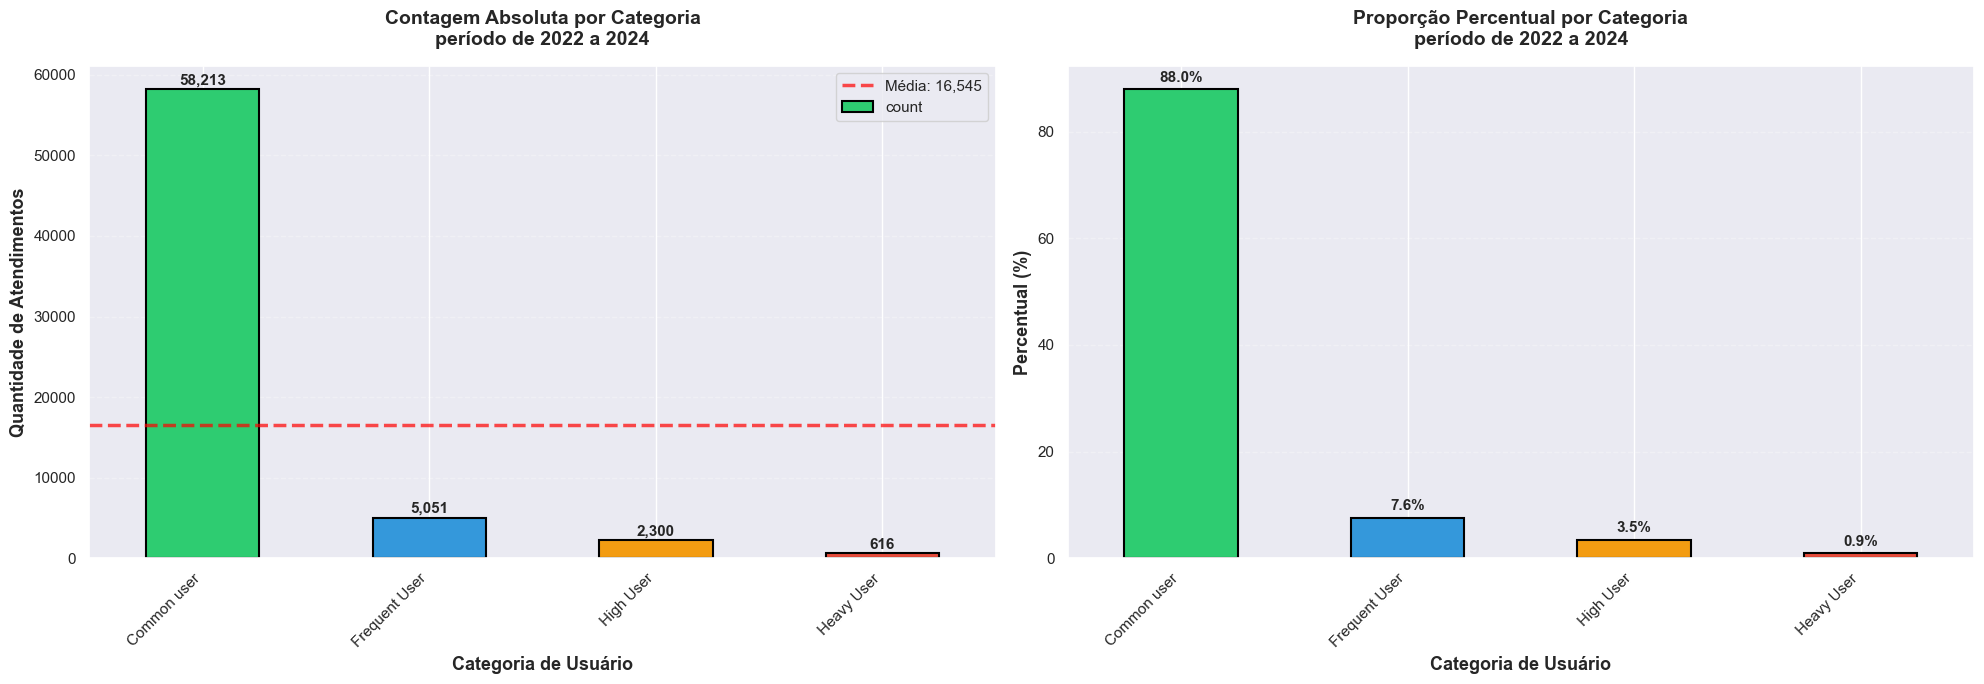

In [40]:
# Gráfico de barras comparativo - Contagem vs Percentual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Gráfico 1: Contagem absoluta
colors_gradient = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
categorias_usuarios.plot(kind='bar', color=colors_gradient, edgecolor='black', linewidth=1.5, ax=ax1)
ax1.set_xlabel('Categoria de Usuário', fontsize=13, fontweight='bold')
ax1.set_ylabel('Quantidade de Atendimentos', fontsize=13, fontweight='bold')
ax1.set_title(f'Contagem Absoluta por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# Adicionar valores nas barras
for i, v in enumerate(categorias_usuarios):
    ax1.text(i, v + 200, f'{v:,}', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# Linha de média
media_cat = categorias_usuarios.mean()
ax1.axhline(y=media_cat, color='red', linestyle='--', linewidth=2.5, 
            label=f'Média: {media_cat:,.0f}', alpha=0.7)
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Gráfico 2: Percentual
percentuais.plot(kind='bar', color=colors_gradient, edgecolor='black', linewidth=1.5, ax=ax2)
ax2.set_xlabel('Categoria de Usuário', fontsize=13, fontweight='bold')
ax2.set_ylabel('Percentual (%)', fontsize=13, fontweight='bold')
ax2.set_title(f'Proporção Percentual por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# Adicionar valores nas barras
for i, v in enumerate(percentuais):
    ax2.text(i, v + 0.8, f'{v:.1f}%', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

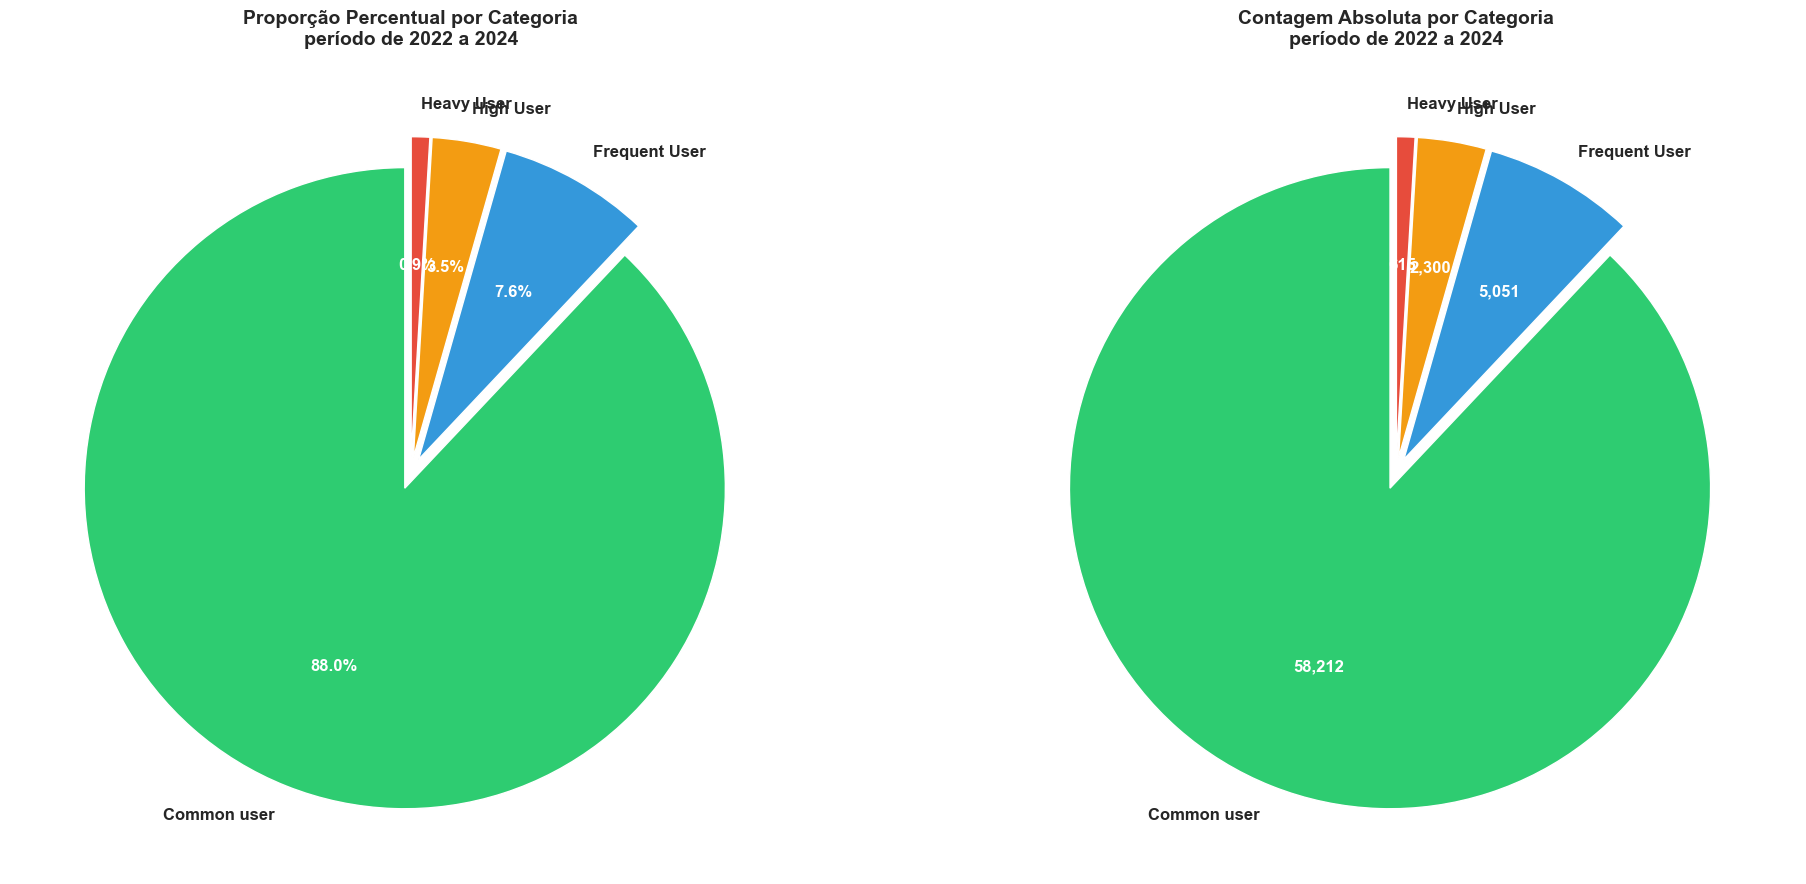

In [41]:
# Gráficos de pizza - Comparação visual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

# Pizza 1: Percentuais
colors_pie = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
wedges, texts, autotexts = ax1.pie(
    categorias_usuarios, 
    labels=categorias_usuarios.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_pie,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax1.set_title(f'Proporção Percentual por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=20)

# Pizza 2: Valores absolutos
wedges2, texts2, autotexts2 = ax2.pie(
    categorias_usuarios, 
    labels=categorias_usuarios.index,
    autopct=lambda pct: f'{int(pct/100 * categorias_usuarios.sum()):,}',
    startangle=90,
    colors=colors_pie,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax2.set_title(f'Contagem Absoluta por Categoria\n{periodo}', 
              fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

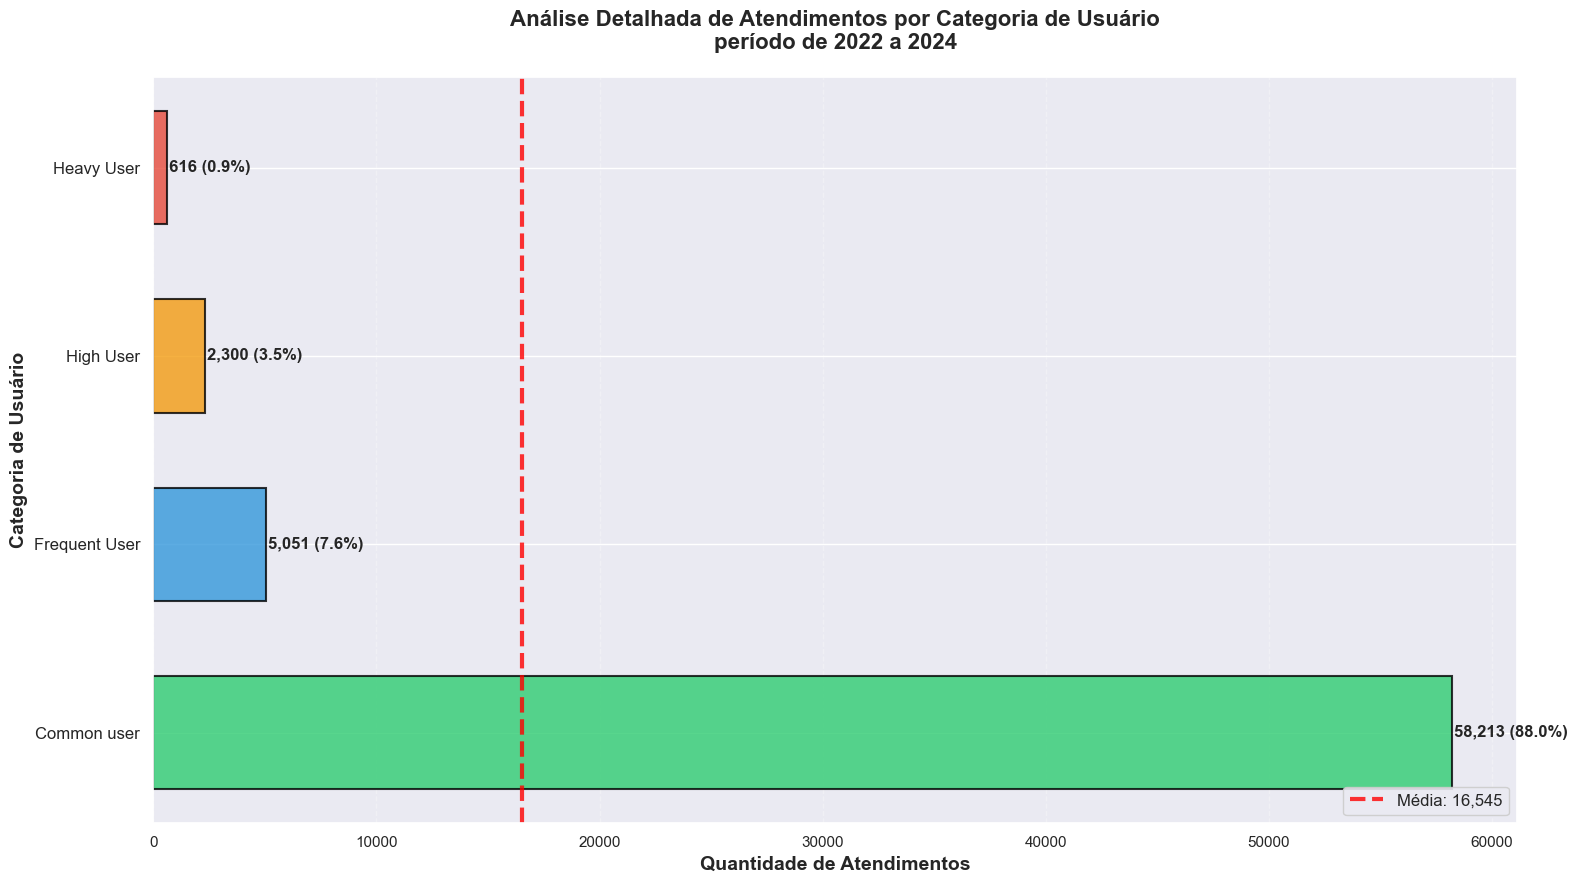

In [42]:
# Gráfico de barras horizontais com métricas completas
plt.figure(figsize=(16, 9))
y_pos = np.arange(len(categorias_usuarios))

# Criar barras horizontais
bars = plt.barh(y_pos, categorias_usuarios.values, 
                color=colors_gradient, edgecolor='black', linewidth=1.5, height=0.6)

# Customizar eixos
plt.xlabel('Quantidade de Atendimentos', fontsize=14, fontweight='bold')
plt.ylabel('Categoria de Usuário', fontsize=14, fontweight='bold')
plt.title(f'Análise Detalhada de Atendimentos por Categoria de Usuário\n{periodo}', 
          fontsize=16, fontweight='bold', pad=20)
plt.yticks(y_pos, categorias_usuarios.index, fontsize=12)

# Adicionar valores, percentuais e informações extras nas barras
for i, (v, p) in enumerate(zip(categorias_usuarios.values, percentuais.values)):
    # Valor absoluto e percentual
    plt.text(v + 100, i, f'{v:,} ({p:.1f}%)', 
             va='center', fontsize=12, fontweight='bold')
    
    # Barra colorida por categoria
    bars[i].set_alpha(0.8)

# Adicionar linha de média
plt.axvline(x=media_cat, color='red', linestyle='--', linewidth=3, 
            label=f'Média: {media_cat:,.0f}', alpha=0.8)

# Adicionar grade e legenda
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='lower right', framealpha=0.9)

plt.tight_layout()
plt.show()

In [43]:
# Tabela resumo estatístico detalhada
resumo_categorias = pd.DataFrame({
    'Categoria': categorias_usuarios.index,
    'Contagem': categorias_usuarios.values,
    'Percentual (%)': percentuais.values,
    'Acumulado': categorias_usuarios.cumsum().values,
    'Perc. Acumulado (%)': percentuais.cumsum().round(2).values
})

print(f"\n{'='*100}")
print(f"{'RESUMO ESTATÍSTICO DETALHADO - CATEGORIAS DE USUÁRIOS':^100}")
print(f"{'Período: ' + periodo:^100}")
print(f"{'='*100}\n")
print(resumo_categorias.to_string(index=False))
print(f"\n{'='*100}")
print(f"📊 TOTAL DE ATENDIMENTOS: {categorias_usuarios.sum():,}")
print(f"📈 NÚMERO DE CATEGORIAS: {len(categorias_usuarios)}")
print(f"📉 MÉDIA POR CATEGORIA: {media_cat:,.2f}")
print(f"📌 DESVIO PADRÃO: {categorias_usuarios.std():,.2f}")
print(f"{'='*100}\n")

# Exibir insights
print("💡 INSIGHTS:")
categoria_maior = categorias_usuarios.idxmax()
categoria_menor = categorias_usuarios.idxmin()
print(f"   • Categoria com MAIS atendimentos: {categoria_maior} ({categorias_usuarios.max():,} - {percentuais.max():.1f}%)")
print(f"   • Categoria com MENOS atendimentos: {categoria_menor} ({categorias_usuarios.min():,} - {percentuais.min():.1f}%)")
print(f"   • Diferença entre maior e menor: {categorias_usuarios.max() - categorias_usuarios.min():,} atendimentos")
print(f"{'='*100}")


                       RESUMO ESTATÍSTICO DETALHADO - CATEGORIAS DE USUÁRIOS                        
                                  Período: período de 2022 a 2024                                   

    Categoria  Contagem  Percentual (%)  Acumulado  Perc. Acumulado (%)
  Common user     58213           87.96      58213                87.96
Frequent User      5051            7.63      63264                95.59
    High User      2300            3.48      65564                99.07
   Heavy User       616            0.93      66180               100.00

📊 TOTAL DE ATENDIMENTOS: 66,180
📈 NÚMERO DE CATEGORIAS: 4
📉 MÉDIA POR CATEGORIA: 16,545.00
📌 DESVIO PADRÃO: 27,838.75

💡 INSIGHTS:
   • Categoria com MAIS atendimentos: Common user (58,213 - 88.0%)
   • Categoria com MENOS atendimentos: Heavy User (616 - 0.9%)
   • Diferença entre maior e menor: 57,597 atendimentos


## 2.3. Top 15 Pacientes Mais Frequentes por Subgrupo de Usuário

In [44]:
# Função para obter top pacientes por subgrupo
def organiza(dataframe, subgrupo):
    """
    Retorna os top N pacientes mais frequentes de um subgrupo específico
    """
    # Filtrar por subgrupo
    df_subgrupo = dataframe[dataframe['Subgrupo Usuário'] == subgrupo]
    
    # Agrupar por paciente e contar visitas
    top_pacientes = (
        df_subgrupo[['Paziente', 'Numero Scheda PS']]
        .groupby('Paziente')
        .count()
        .sort_values(by='Numero Scheda PS', ascending=False)
        .reset_index()
    )
    
    # Renomear coluna
    top_pacientes.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)
    top_pacientes['Subgrupo Usuário'] = subgrupo
    
    return top_pacientes

subs = ['Common user', 'Frequent User', 'High User', 'Heavy User']
data = []

for sub in subs:
    top_pacientes_sub = organiza(ano_2024, sub)
    data.append(top_pacientes_sub)

subcategorias = pd.concat(data, ignore_index=True)
subcategorias.tail(2)

,Paziente,Quantidade de Visitas,Subgrupo Usuário
29864,ZERBINI MARIO,1,Heavy User
29865,AIT TALEB FATIHA,1,Heavy User


In [45]:
subcategorias.sample(3)
subcategorias.to_excel('pacientes_por_subgrupo_2024.xlsx', index=False)

In [46]:
# Função para obter top pacientes por subgrupo
def obter_top_pacientes_por_subgrupo(dataframe, subgrupo, top_n=15):
    """
    Retorna os top N pacientes mais frequentes de um subgrupo específico
    """
    # Filtrar por subgrupo
    df_subgrupo = dataframe[dataframe['Subgrupo Usuário'] == subgrupo]
    
    # Agrupar por paciente e contar visitas
    top_pacientes = (
        df_subgrupo[['Paziente', 'Numero Scheda PS']]
        .groupby('Paziente')
        .count()
        .sort_values(by='Numero Scheda PS', ascending=False)
        .head(top_n)
    )
    
    # Renomear coluna
    top_pacientes.rename(columns={'Numero Scheda PS': 'Quantidade de Visitas'}, inplace=True)
    
    return top_pacientes

# Gerar tabelas para cada subgrupo
subgrupos = ['Common user', 'Frequent User', 'High User', 'Heavy User']

for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    
    print("\n" + "="*80)
    print(f"TOP 15 PACIENTES - {subgrupo.upper()}")
    print("="*80)
    display(top_pacientes)


TOP 15 PACIENTES - COMMON USER


,Quantidade de Visitas
Paziente,
TINTI CATUSCIA,3
BELOMETTI BRUNA ADRIANA,3
BAGLIONI GIOVANNI,3
ABATEGIOVANNI LUCIANO,3
BOCCHI CESARE,3
ZYBA SHEHI ADRIJAN,3
RINALDI GIOVANNI GUIDO,3
PAGNONI GIULIA,3
BERTONI LUCA,3



TOP 15 PACIENTES - FREQUENT USER


,Quantidade de Visitas
Paziente,
ZYBA SHEHI EDMONT,5
ZUCCHI ALDO PIETRO,5
ZUCCHETTI MARIA,5
ZOGAJ ARLINDA,5
ZINI VANNA LUCIA,5
ZINI MARIO,5
ZILIANI GIAN PIETRO,5
ADEMI ARDIT,5
ACETI SILVANA,5



TOP 15 PACIENTES - HIGH USER


,Quantidade de Visitas
Paziente,
ANANE YAW,9
ZAPPELLA LUCIANO,9
HOXHA ERDIS,9
ZANOTTI GIOVANNA,9
ZANOTTI PAOLA,9
RECENTI ENRICO,9
DA COL ANTONIO,9
PIANTONI FAUSTINO,9
PIANTONI MARCO,9



TOP 15 PACIENTES - HEAVY USER


,Quantidade de Visitas
Paziente,
GUERRINI FRANCA,68
PERI GINA,68
ALI MAGID,64
PRANDINI LAURA SIMONETTA,45
BARESI NATALE,40
NICOLAE STRUGURICA,38
VILLA VIVIANA,37
NOCELLA CECILIA,36
MAZZOCCHI RAFFAELLA,35


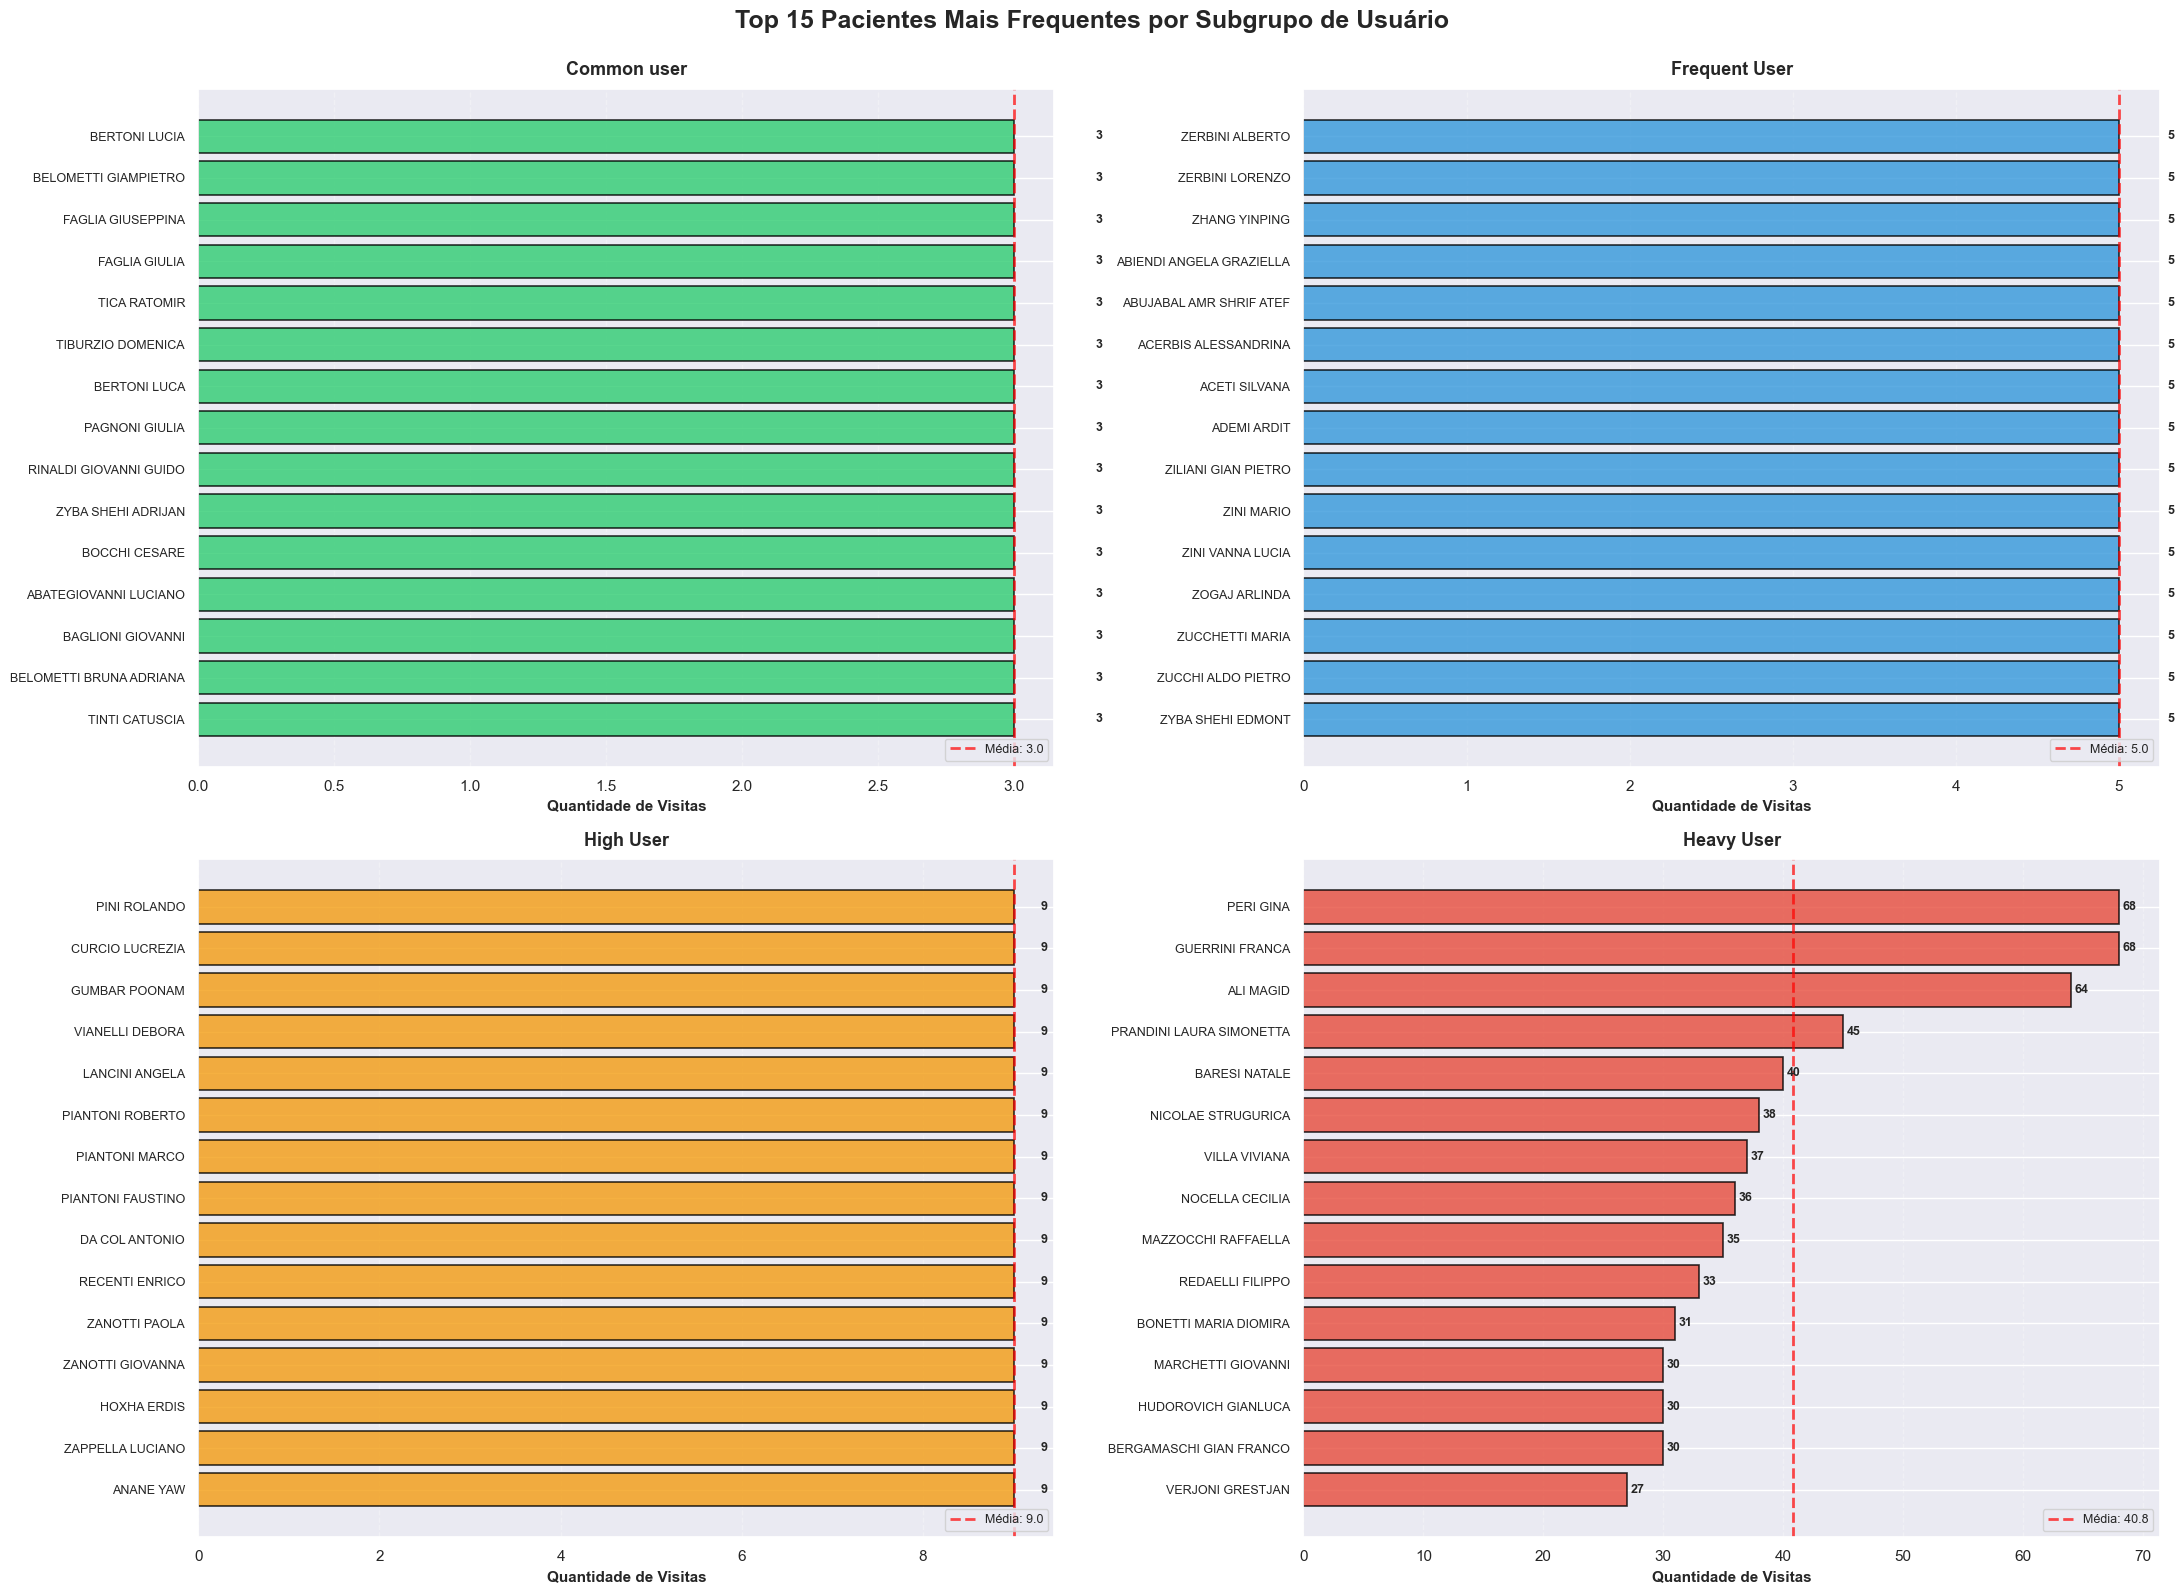

In [47]:
# Criar visualização em grid com 4 gráficos (um para cada subgrupo)
fig, axes = plt.subplots(2, 2, figsize=(22, 16))
fig.suptitle('Top 15 Pacientes Mais Frequentes por Subgrupo de Usuário', 
             fontsize=18, fontweight='bold', y=0.995)

cores_subgrupos = {
    'Common user': '#2ecc71',
    'Frequent User': '#3498db',
    'High User': '#f39c12',
    'Heavy User': '#e74c3c'
}

posicoes = [(0, 0), (0, 1), (1, 0), (1, 1)]

for idx, (subgrupo, pos) in enumerate(zip(subgrupos, posicoes)):
    ax = axes[pos[0], pos[1]]
    
    # Obter dados
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    
    # Criar gráfico de barras horizontais
    top_pacientes_ordenado = top_pacientes.sort_values(by='Quantidade de Visitas', ascending=True)
    
    bars = ax.barh(
        range(len(top_pacientes_ordenado)), 
        top_pacientes_ordenado['Quantidade de Visitas'],
        color=cores_subgrupos[subgrupo],
        edgecolor='black',
        linewidth=1.2,
        alpha=0.8
    )
    
    # Configurar eixos
    ax.set_yticks(range(len(top_pacientes_ordenado)))
    ax.set_yticklabels(top_pacientes_ordenado.index, fontsize=9)
    ax.set_xlabel('Quantidade de Visitas', fontsize=11, fontweight='bold')
    ax.set_title(f'{subgrupo}', fontsize=13, fontweight='bold', pad=10)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Adicionar valores nas barras
    for i, v in enumerate(top_pacientes_ordenado['Quantidade de Visitas']):
        ax.text(v + 0.3, i, str(v), va='center', fontsize=9, fontweight='bold')
    
    # Adicionar linha de média
    media = top_pacientes['Quantidade de Visitas'].mean()
    ax.axvline(x=media, color='red', linestyle='--', linewidth=2, 
               label=f'Média: {media:.1f}', alpha=0.7)
    ax.legend(fontsize=9, loc='lower right')

plt.tight_layout()
plt.show()

In [48]:
# Criar tabela comparativa consolidada
print("\n" + "="*100)
print("TABELA COMPARATIVA - TOP 5 PACIENTES POR SUBGRUPO")
print("="*100 + "\n")

tabela_comparativa = pd.DataFrame()

for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=5)
    top_pacientes_reset = top_pacientes.reset_index()
    top_pacientes_reset['Subgrupo'] = subgrupo
    top_pacientes_reset['Posição'] = range(1, len(top_pacientes_reset) + 1)
    
    # Reorganizar colunas
    top_pacientes_reset = top_pacientes_reset[['Posição', 'Subgrupo', 'Paziente', 'Quantidade de Visitas']]
    
    tabela_comparativa = pd.concat([tabela_comparativa, top_pacientes_reset], ignore_index=True)

display(tabela_comparativa)


TABELA COMPARATIVA - TOP 5 PACIENTES POR SUBGRUPO



,Posição,Subgrupo,Paziente,Quantidade de Visitas
0,1,Common user,TINTI CATUSCIA,3
1,2,Common user,BELOMETTI BRUNA ADRIANA,3
2,3,Common user,BAGLIONI GIOVANNI,3
3,4,Common user,ABATEGIOVANNI LUCIANO,3
4,5,Common user,BOCCHI CESARE,3
5,1,Frequent User,ZYBA SHEHI EDMONT,5
6,2,Frequent User,ZUCCHI ALDO PIETRO,5
7,3,Frequent User,ZUCCHETTI MARIA,5
8,4,Frequent User,ZOGAJ ARLINDA,5
9,5,Frequent User,ZINI VANNA LUCIA,5


In [49]:
# Estatísticas resumidas por subgrupo
print("\n" + "="*100)
print("ESTATÍSTICAS RESUMIDAS POR SUBGRUPO")
print("="*100 + "\n")

estatisticas_resumo = pd.DataFrame()

for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    
    stats = {
        'Subgrupo': subgrupo,
        'Total Pacientes': len(top_pacientes),
        'Total Visitas': top_pacientes['Quantidade de Visitas'].sum(),
        'Média Visitas': top_pacientes['Quantidade de Visitas'].mean(),
        'Mediana Visitas': top_pacientes['Quantidade de Visitas'].median(),
        'Mín Visitas': top_pacientes['Quantidade de Visitas'].min(),
        'Máx Visitas': top_pacientes['Quantidade de Visitas'].max(),
        'Desvio Padrão': top_pacientes['Quantidade de Visitas'].std()
    }
    
    estatisticas_resumo = pd.concat([estatisticas_resumo, pd.DataFrame([stats])], ignore_index=True)

# Formatar a tabela
estatisticas_resumo_formatada = estatisticas_resumo.copy()
estatisticas_resumo_formatada['Total Visitas'] = estatisticas_resumo_formatada['Total Visitas'].apply(lambda x: f'{x:,.0f}')
estatisticas_resumo_formatada['Média Visitas'] = estatisticas_resumo_formatada['Média Visitas'].apply(lambda x: f'{x:.2f}')
estatisticas_resumo_formatada['Mediana Visitas'] = estatisticas_resumo_formatada['Mediana Visitas'].apply(lambda x: f'{x:.1f}')
estatisticas_resumo_formatada['Desvio Padrão'] = estatisticas_resumo_formatada['Desvio Padrão'].apply(lambda x: f'{x:.2f}')

display(estatisticas_resumo_formatada)


ESTATÍSTICAS RESUMIDAS POR SUBGRUPO



,Subgrupo,Total Pacientes,Total Visitas,Média Visitas,Mediana Visitas,Mín Visitas,Máx Visitas,Desvio Padrão
0,Common user,15,45,3.00,3.0,3,3,0.00
1,Frequent User,15,75,5.00,5.0,5,5,0.00
2,High User,15,135,9.00,9.0,9,9,0.00
3,Heavy User,15,612,40.80,36.0,27,68,14.17


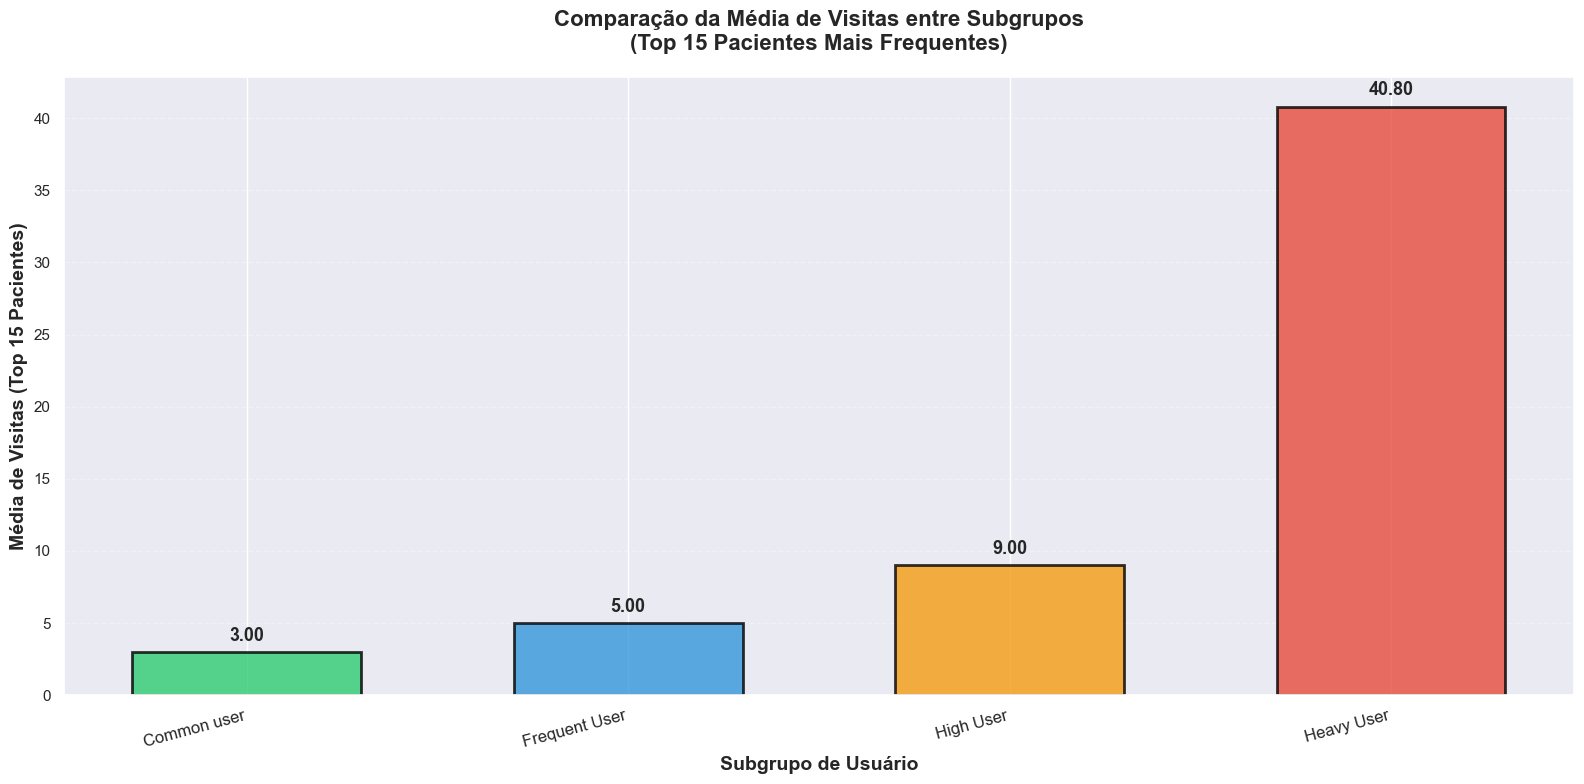


📊 INSIGHTS:
• Subgrupo com MAIOR média: Heavy User (40.80 visitas)
• Subgrupo com MENOR média: Common user (3.00 visitas)
• Diferença entre maior e menor: 37.80 visitas


In [50]:
# Gráfico de barras comparativo - Média de visitas por subgrupo (Top 15)
plt.figure(figsize=(16, 8))

medias_por_subgrupo = []
for subgrupo in subgrupos:
    top_pacientes = obter_top_pacientes_por_subgrupo(df, subgrupo, top_n=15)
    medias_por_subgrupo.append(top_pacientes['Quantidade de Visitas'].mean())

x_pos = np.arange(len(subgrupos))
bars = plt.bar(x_pos, medias_por_subgrupo, 
               color=[cores_subgrupos[s] for s in subgrupos],
               edgecolor='black', linewidth=2, alpha=0.8, width=0.6)

plt.xlabel('Subgrupo de Usuário', fontsize=14, fontweight='bold')
plt.ylabel('Média de Visitas (Top 15 Pacientes)', fontsize=14, fontweight='bold')
plt.title('Comparação da Média de Visitas entre Subgrupos\n(Top 15 Pacientes Mais Frequentes)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(x_pos, subgrupos, fontsize=12, rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for i, (bar, valor) in enumerate(zip(bars, medias_por_subgrupo)):
    plt.text(bar.get_x() + bar.get_width()/2, valor + 0.5, 
             f'{valor:.2f}', ha='center', va='bottom', 
             fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📊 INSIGHTS:")
print("="*80)
print(f"• Subgrupo com MAIOR média: {subgrupos[np.argmax(medias_por_subgrupo)]} ({max(medias_por_subgrupo):.2f} visitas)")
print(f"• Subgrupo com MENOR média: {subgrupos[np.argmin(medias_por_subgrupo)]} ({min(medias_por_subgrupo):.2f} visitas)")
print(f"• Diferença entre maior e menor: {max(medias_por_subgrupo) - min(medias_por_subgrupo):.2f} visitas")
print("="*80)

# 3 - Caracterização Detalhada dos Subgrupos de Usuários

## 3.1. Caracterização por Faixas Etárias

In [51]:
# Criar faixas etárias
def categoriza_idade(idade):
    if pd.isna(idade):
        return 'Não informado'
    elif idade >= 15 and idade <= 44:
        return '15-44 anni'
    elif idade >= 45 and idade <= 64:
        return '45-64 anni'
    elif idade > 64:
        return '> 64 anni'
    else:
        return 'Outro'

# Aplicar a categorização ao dataframe
df['Faixa_Etaria'] = df['Idade'].apply(categoriza_idade)

# Verificar a distribuição geral
print("Distribuição Geral de Faixas Etárias")
print("=" * 80)
print(df['Faixa_Etaria'].value_counts().sort_index())
print("\n")

Distribuição Geral de Faixas Etárias
Faixa_Etaria
15-44 anni    46541
45-64 anni    37012
> 64 anni     42377
Name: count, dtype: int64




In [52]:
# Análise de faixas etárias por subgrupo
faixas_por_subgrupo = pd.crosstab(df['Subgrupo Usuário'], df['Faixa_Etaria'], normalize='index') * 100

# Ordem das faixas etárias
ordem_faixas = ['15-44 anni', '45-64 anni', '> 64 anni']
faixas_por_subgrupo = faixas_por_subgrupo[ordem_faixas]

# Ordem dos subgrupos
ordem_subgrupos = ['Common user', 'Frequent User', 'High User', 'Heavy User']
faixas_por_subgrupo = faixas_por_subgrupo.reindex(ordem_subgrupos)

print("\nDistribuição Percentual de Faixas Etárias por Subgrupo")
print("=" * 80)
print(faixas_por_subgrupo.round(2))
print("\n")


Distribuição Percentual de Faixas Etárias por Subgrupo
Faixa_Etaria      15-44 anni  45-64 anni  > 64 anni
Subgrupo Usuário                                   
Common user            38.68       30.98      30.34
Frequent User          35.43       26.32      38.25
High User              34.00       26.38      39.62
Heavy User             27.85       25.86      46.29




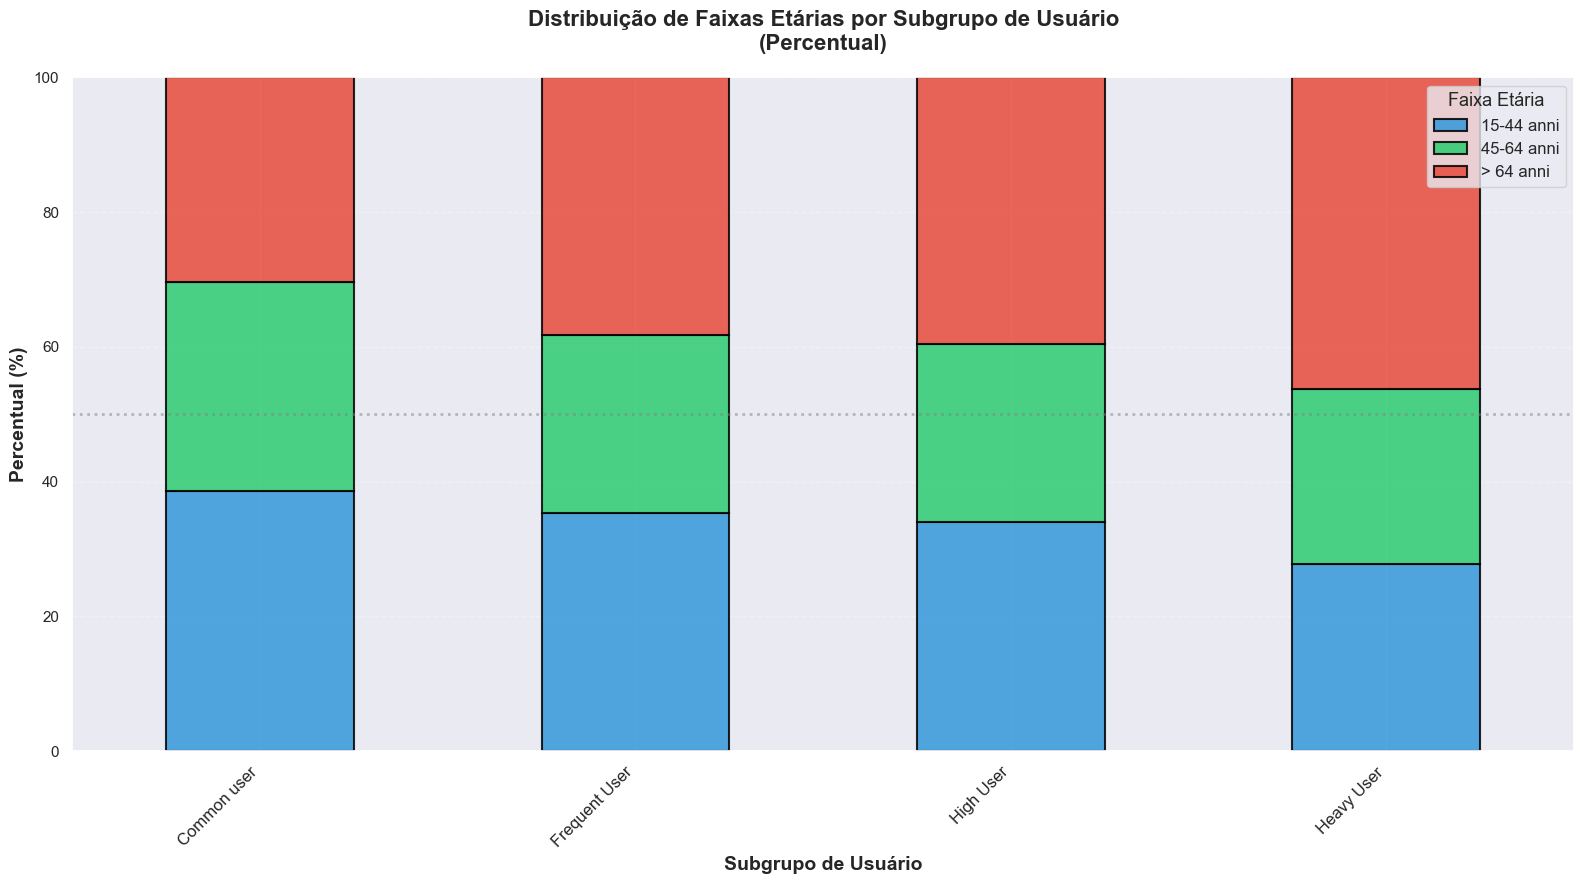

In [53]:
# Gráfico de barras empilhadas - Distribuição de faixas etárias por subgrupo
fig, ax = plt.subplots(figsize=(16, 9))

cores_faixas = ['#3498db', '#2ecc71', '#e74c3c']
faixas_por_subgrupo.plot(kind='bar', stacked=True, color=cores_faixas, 
                          edgecolor='black', linewidth=1.5, ax=ax, alpha=0.85)

ax.set_xlabel('Subgrupo de Usuário', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentual (%)', fontsize=14, fontweight='bold')
ax.set_title('Distribuição de Faixas Etárias por Subgrupo de Usuário\n(Percentual)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.legend(title='Faixa Etária', fontsize=12, title_fontsize=13, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 100)

# Adicionar linha de referência
ax.axhline(y=50, color='gray', linestyle=':', linewidth=2, alpha=0.5)

plt.tight_layout()
plt.show()

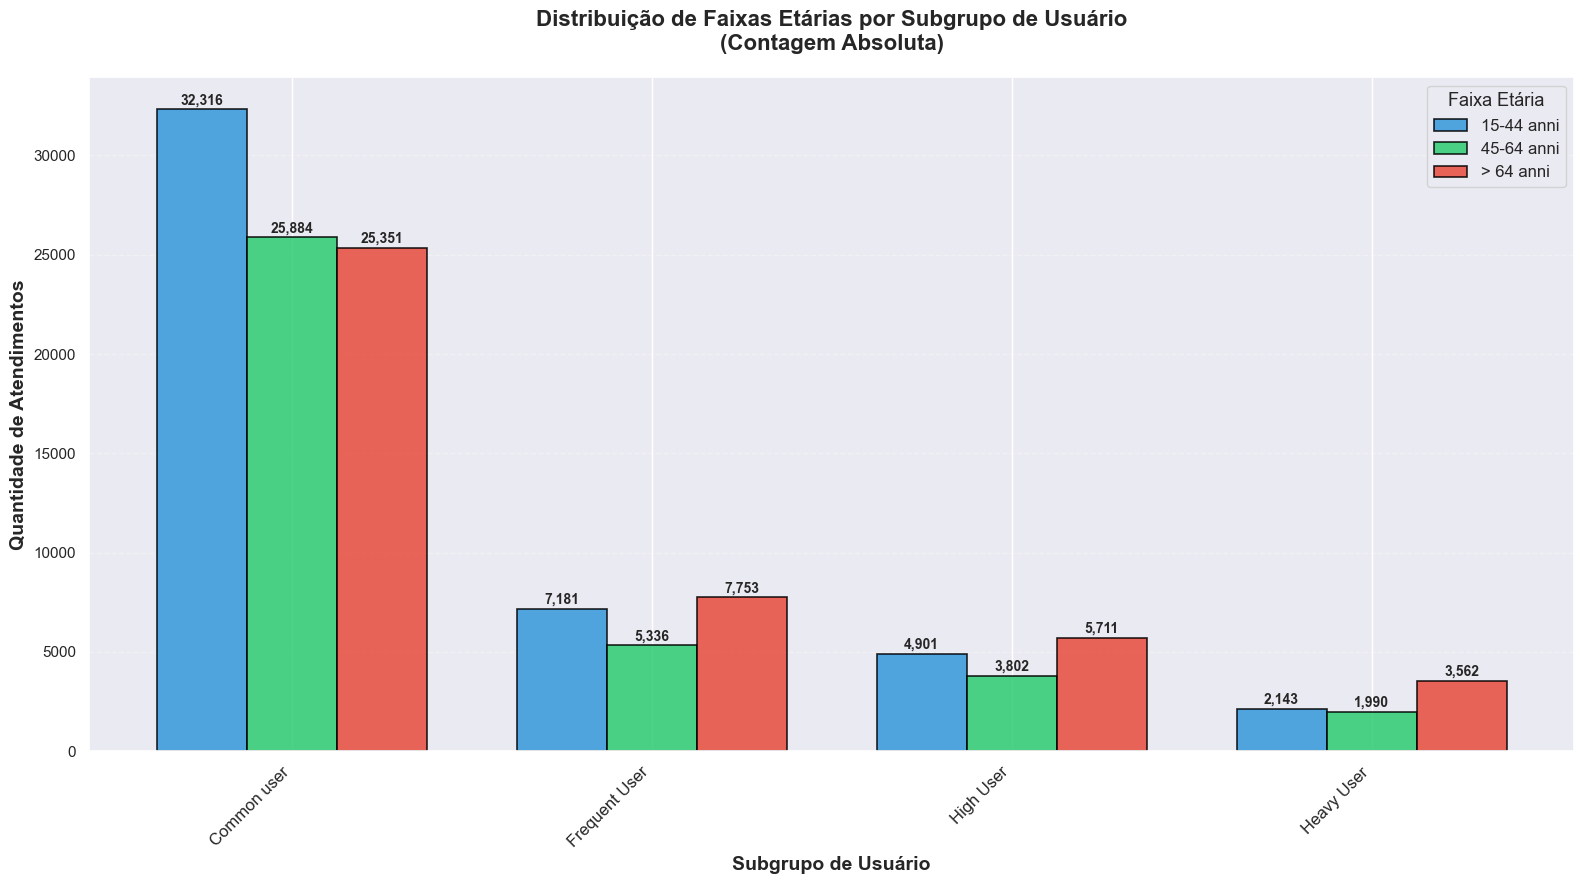

In [54]:
# Gráfico de barras agrupadas - Contagem absoluta
faixas_contagem = pd.crosstab(df['Subgrupo Usuário'], df['Faixa_Etaria'])
faixas_contagem = faixas_contagem[ordem_faixas]
faixas_contagem = faixas_contagem.reindex(ordem_subgrupos)

fig, ax = plt.subplots(figsize=(16, 9))

x_pos = np.arange(len(ordem_subgrupos))
width = 0.25

for i, faixa in enumerate(ordem_faixas):
    offset = width * (i - 1)
    bars = ax.bar(x_pos + offset, faixas_contagem[faixa], width, 
                   label=faixa, color=cores_faixas[i], 
                   edgecolor='black', linewidth=1.2, alpha=0.85)
    
    # Adicionar valores nas barras
    for j, v in enumerate(faixas_contagem[faixa]):
        if v > 0:
            ax.text(j + offset, v + 100, f'{v:,}', 
                   ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Subgrupo de Usuário', fontsize=14, fontweight='bold')
ax.set_ylabel('Quantidade de Atendimentos', fontsize=14, fontweight='bold')
ax.set_title('Distribuição de Faixas Etárias por Subgrupo de Usuário\n(Contagem Absoluta)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(ordem_subgrupos, rotation=45, ha='right', fontsize=12)
ax.legend(title='Faixa Etária', fontsize=12, title_fontsize=13, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 3.2. Idade Média por Subgrupo

In [55]:
# Calcular estatísticas de idade por subgrupo
idade_stats = df.groupby('Subgrupo Usuário')['Idade'].agg([
    ('Média', 'mean'),
    ('Mediana', 'median'),
    ('Desvio Padrão', 'std'),
    ('Mínima', 'min'),
    ('Máxima', 'max'),
    ('Contagem', 'count')
]).round(2)

# Reordenar pelos subgrupos definidos
idade_stats = idade_stats.reindex(ordem_subgrupos)

print("Estatísticas de Idade por Subgrupo de Usuário")
print("=" * 90)
display(idade_stats)
print("\n")

Estatísticas de Idade por Subgrupo de Usuário


,Média,Mediana,Desvio Padrão,Mínima,Máxima,Contagem
Subgrupo Usuário,,,,,,
Common user,51.82,51.00,21.16,15,105,83551
Frequent User,54.84,55.00,22.13,15,100,20270
High User,55.74,56.00,22.05,15,101,14414
Heavy User,59.70,61.00,21.00,15,99,7695


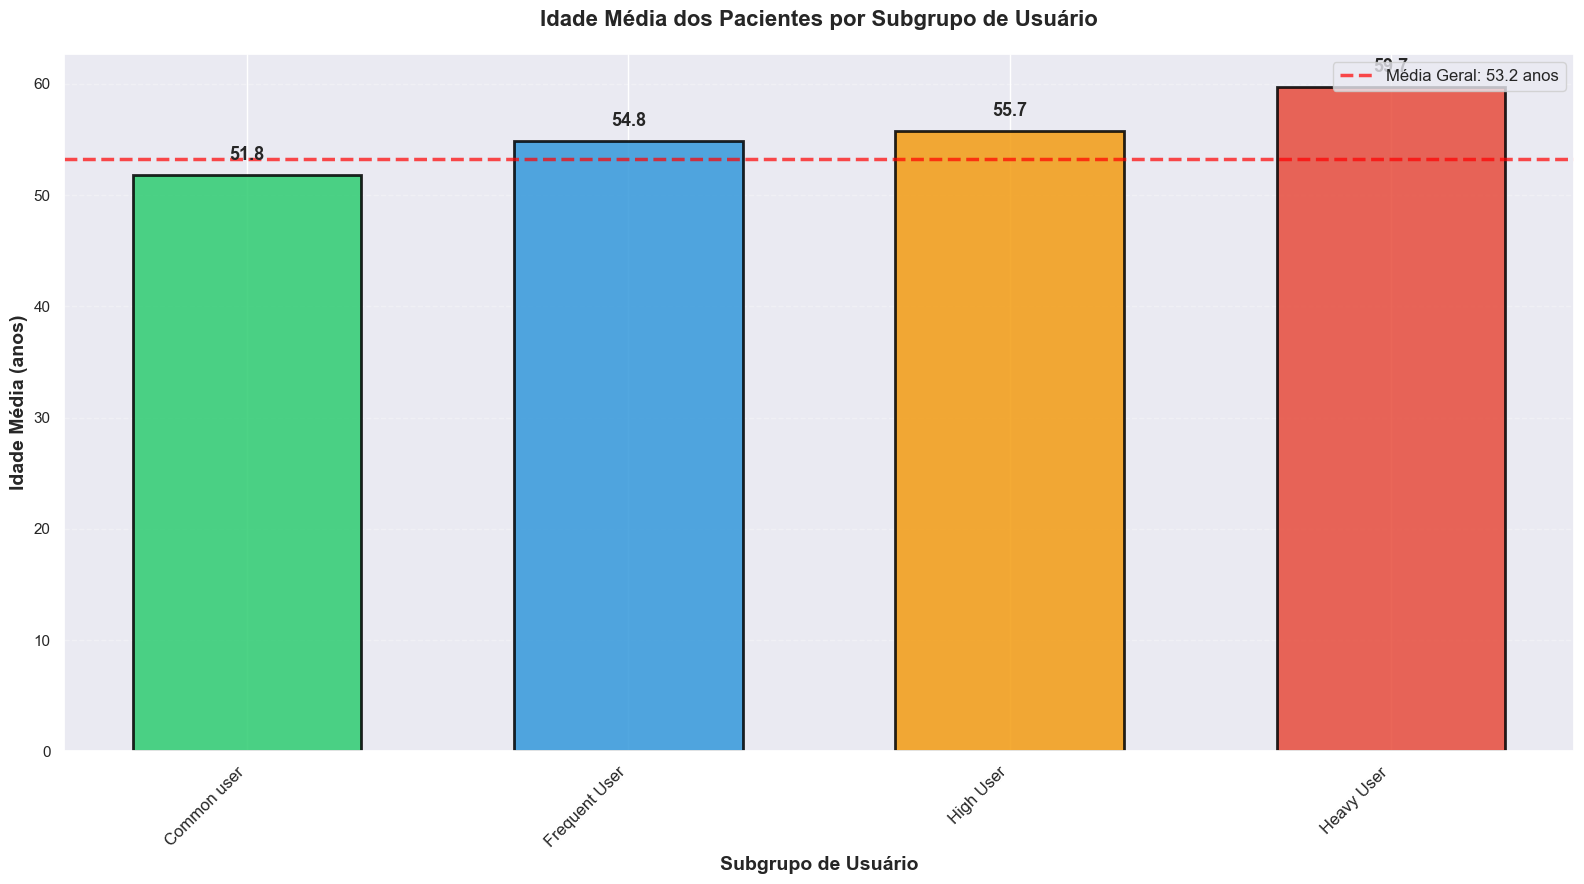


💡 INSIGHTS:
• Subgrupo com MAIOR idade média: Heavy User (59.7 anos)
• Subgrupo com MENOR idade média: Common user (51.8 anos)
• Diferença entre maior e menor: 7.9 anos
• Idade média geral: 53.2 anos


In [56]:
# Gráfico de barras - Idade média por subgrupo
fig, ax = plt.subplots(figsize=(16, 9))

cores_idade = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
bars = ax.bar(range(len(ordem_subgrupos)), idade_stats['Média'], 
               color=cores_idade, edgecolor='black', linewidth=2, alpha=0.85, width=0.6)

ax.set_xlabel('Subgrupo de Usuário', fontsize=14, fontweight='bold')
ax.set_ylabel('Idade Média (anos)', fontsize=14, fontweight='bold')
ax.set_title('Idade Média dos Pacientes por Subgrupo de Usuário', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(range(len(ordem_subgrupos)))
ax.set_xticklabels(ordem_subgrupos, rotation=45, ha='right', fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for i, (bar, valor) in enumerate(zip(bars, idade_stats['Média'])):
    ax.text(bar.get_x() + bar.get_width()/2, valor + 1, 
            f'{valor:.1f}', ha='center', va='bottom', 
            fontsize=13, fontweight='bold')

# Adicionar linha de média geral
media_geral = df['Idade'].mean()
ax.axhline(y=media_geral, color='red', linestyle='--', linewidth=2.5, 
           label=f'Média Geral: {media_geral:.1f} anos', alpha=0.7)
ax.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*90)
print("💡 INSIGHTS:")
print("="*90)
print(f"• Subgrupo com MAIOR idade média: {idade_stats['Média'].idxmax()} ({idade_stats['Média'].max():.1f} anos)")
print(f"• Subgrupo com MENOR idade média: {idade_stats['Média'].idxmin()} ({idade_stats['Média'].min():.1f} anos)")
print(f"• Diferença entre maior e menor: {idade_stats['Média'].max() - idade_stats['Média'].min():.1f} anos")
print(f"• Idade média geral: {media_geral:.1f} anos")
print("="*90)

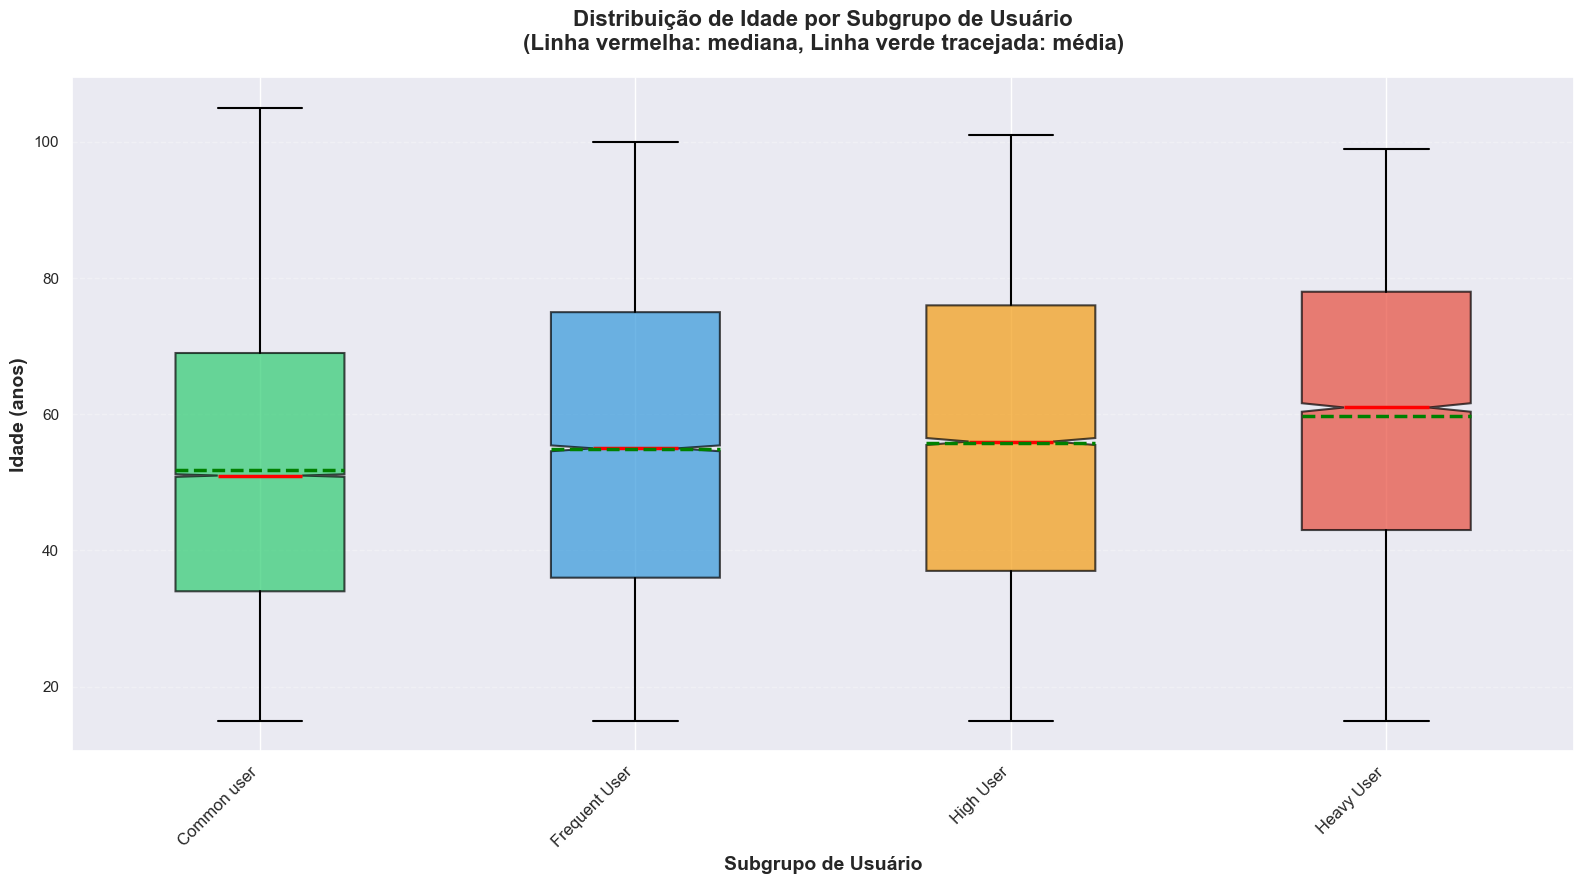

In [57]:
# Boxplot - Distribuição de idade por subgrupo
fig, ax = plt.subplots(figsize=(16, 9))

dados_boxplot = [df[df['Subgrupo Usuário'] == sub]['Idade'].dropna() for sub in ordem_subgrupos]

bp = ax.boxplot(dados_boxplot, labels=ordem_subgrupos, patch_artist=True,
                notch=True, showmeans=True, meanline=True,
                boxprops=dict(facecolor='lightblue', edgecolor='black', linewidth=1.5),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=1.5),
                medianprops=dict(color='red', linewidth=2.5),
                meanprops=dict(color='green', linestyle='--', linewidth=2.5))

# Colorir cada boxplot com cor diferente
for patch, cor in zip(bp['boxes'], cores_idade):
    patch.set_facecolor(cor)
    patch.set_alpha(0.7)

ax.set_xlabel('Subgrupo de Usuário', fontsize=14, fontweight='bold')
ax.set_ylabel('Idade (anos)', fontsize=14, fontweight='bold')
ax.set_title('Distribuição de Idade por Subgrupo de Usuário\n(Linha vermelha: mediana, Linha verde tracejada: média)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(ordem_subgrupos, rotation=45, ha='right', fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 3.3. Caracterização por Modalità Dimissione

In [58]:
# Verificar as modalidades de dimissione disponíveis
print("Modalidades de Dimissione disponíveis:")
print("=" * 80)
print(df['Modalità Dimissione'].value_counts())
print("\n")

Modalidades de Dimissione disponíveis:
Modalità Dimissione
Dimissione a domicilio                                                                                  105460
Ricoverato                                                                                               12566
Il paziente abbandona il PS prima della visita medica                                                     4262
Trasferimento ad altro istituto                                                                           1735
Il paziente abbandona il PS in corso di accertamenti e/o prima della chiusura della cartella clinica       927
Rifiuta ricovero                                                                                           761
Inserito per errore                                                                                        118
Deceduto in PS                                                                                              85
Dimissione a strutture ambulatoriali                 

In [59]:
# Análise de modalità dimissione por subgrupo (percentual)
dimissione_por_subgrupo = pd.crosstab(df['Subgrupo Usuário'], df['Modalità Dimissione'], 
                                       normalize='index') * 100

# Reordenar pelos subgrupos
dimissione_por_subgrupo = dimissione_por_subgrupo.reindex(ordem_subgrupos)

print("Distribuição Percentual de Modalità Dimissione por Subgrupo")
print("=" * 100)
display(dimissione_por_subgrupo.round(2))
print("\n")

Distribuição Percentual de Modalità Dimissione por Subgrupo


Modalità Dimissione,Deceduto in PS,Dimissione a domicilio,Dimissione a strutture ambulatoriali,Giunto cadavere,Il paziente abbandona il PS in corso di accertamenti e/o prima della chiusura della cartella clinica,Il paziente abbandona il PS prima della visita medica,Inserito per errore,Ricoverato,Rifiuta ricovero,Trasferimento ad altro istituto
Subgrupo Usuário,,,,,,,,,,
Common user,0.08,83.93,0.01,0.00,0.73,3.49,0.08,9.80,0.59,1.29
Frequent User,0.07,83.55,0.01,0.00,0.58,3.06,0.15,10.50,0.60,1.48
High User,0.01,83.43,0.03,0.00,0.86,2.97,0.05,10.35,0.65,1.65
Heavy User,0.04,82.81,0.00,0.00,0.96,3.89,0.21,9.82,0.70,1.57


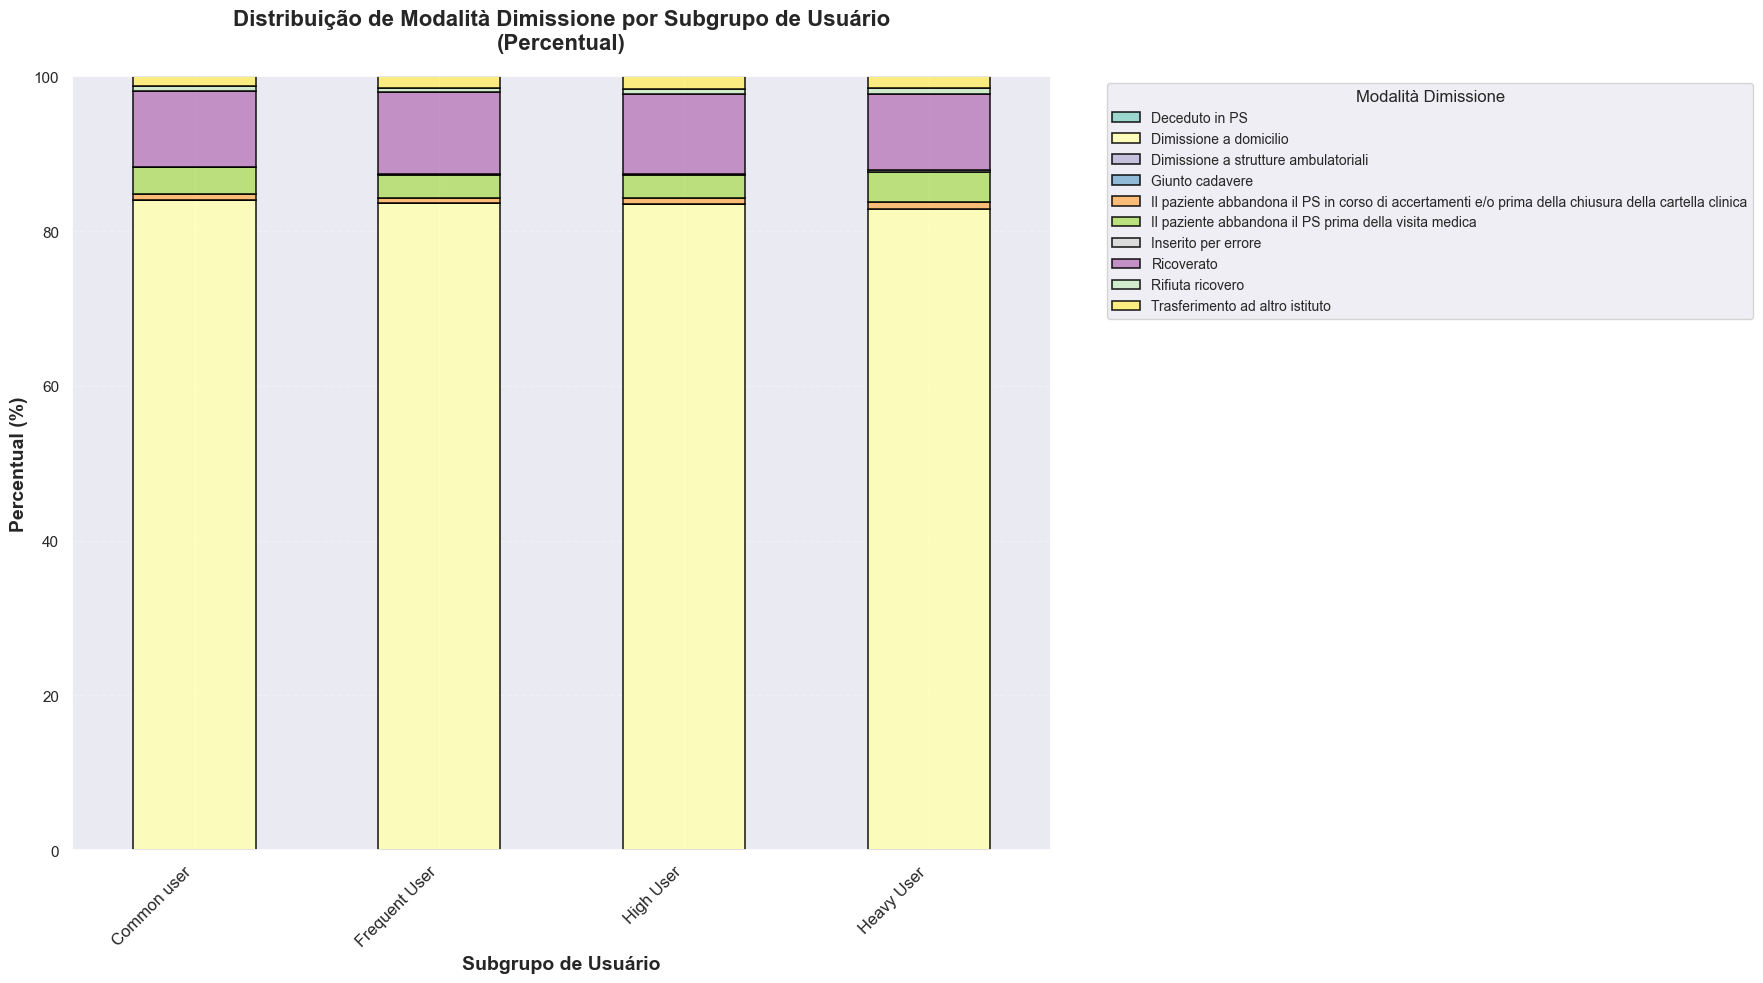

In [60]:
# Gráfico de barras empilhadas - Modalità Dimissione por subgrupo
fig, ax = plt.subplots(figsize=(18, 10))

# Criar paleta de cores para as modalidades
num_modalidades = len(dimissione_por_subgrupo.columns)
cores_modalidades = plt.cm.Set3(np.linspace(0, 1, num_modalidades))

dimissione_por_subgrupo.plot(kind='bar', stacked=True, color=cores_modalidades, 
                               edgecolor='black', linewidth=1.2, ax=ax, alpha=0.85)

ax.set_xlabel('Subgrupo de Usuário', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentual (%)', fontsize=14, fontweight='bold')
ax.set_title('Distribuição de Modalità Dimissione por Subgrupo de Usuário\n(Percentual)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.legend(title='Modalità Dimissione', fontsize=10, title_fontsize=12, 
          bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

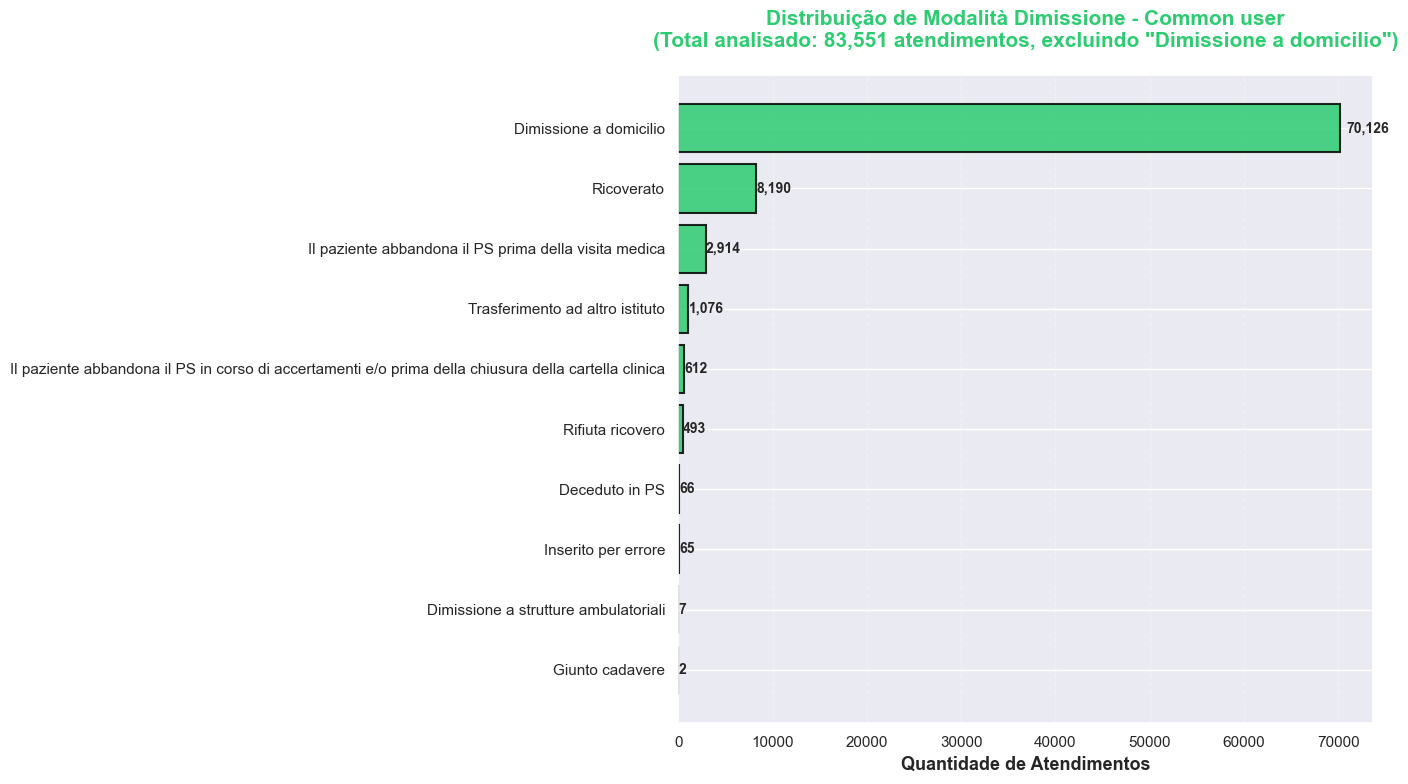

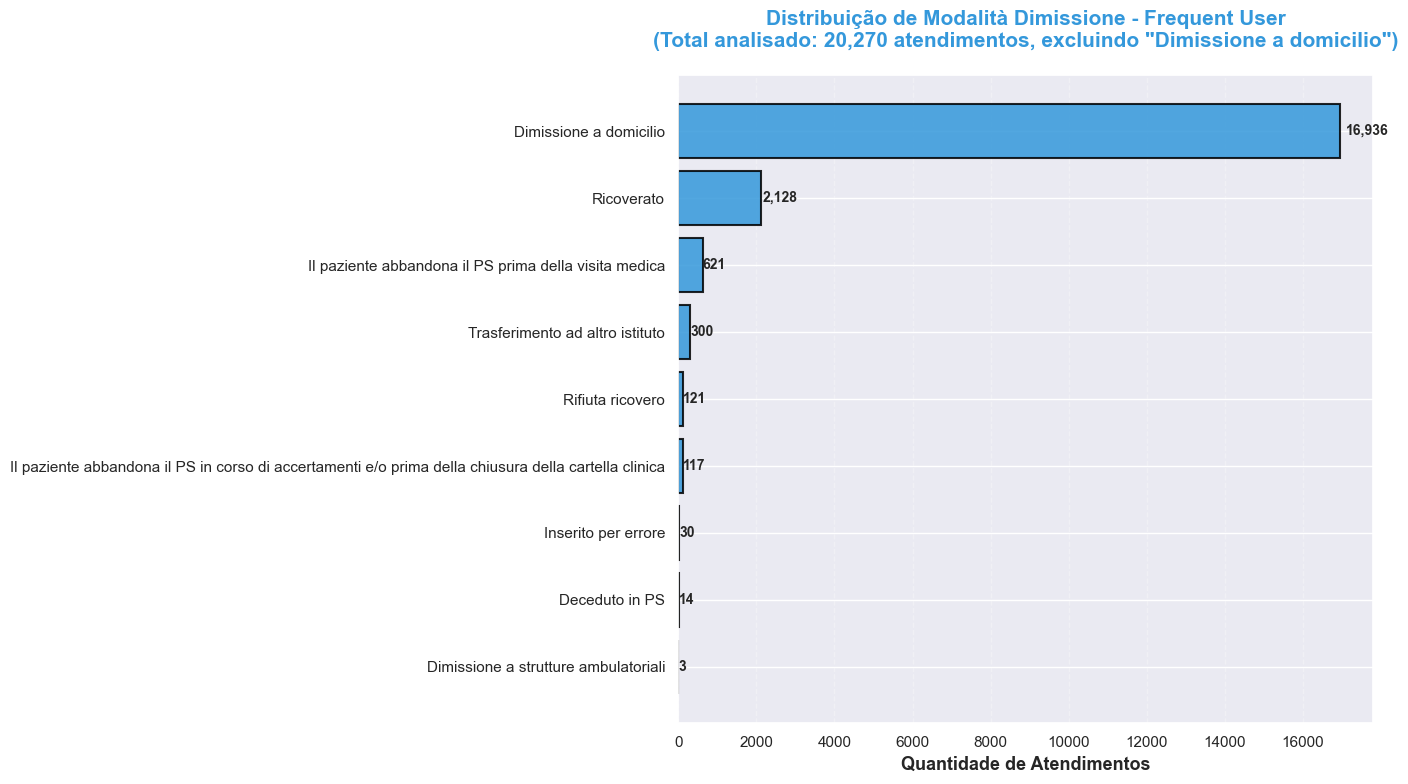

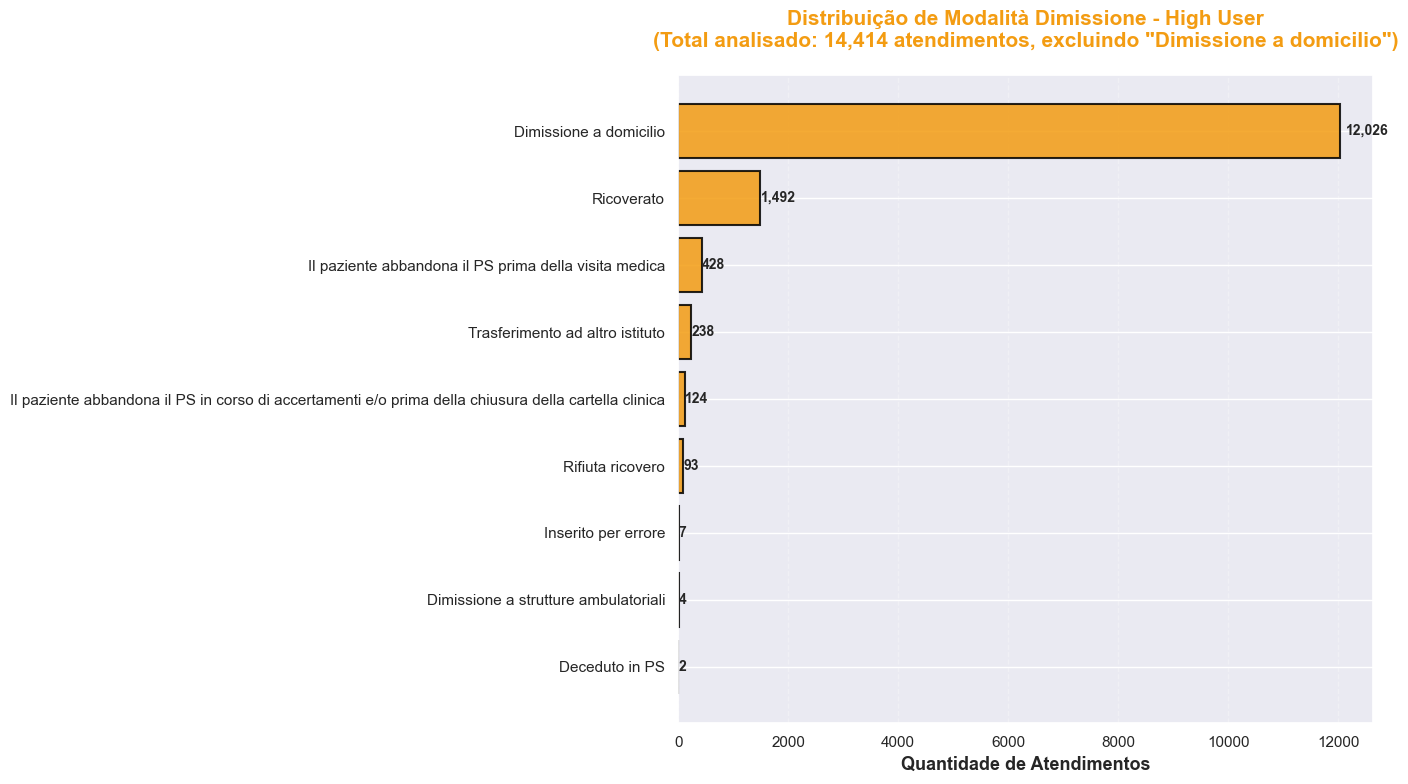

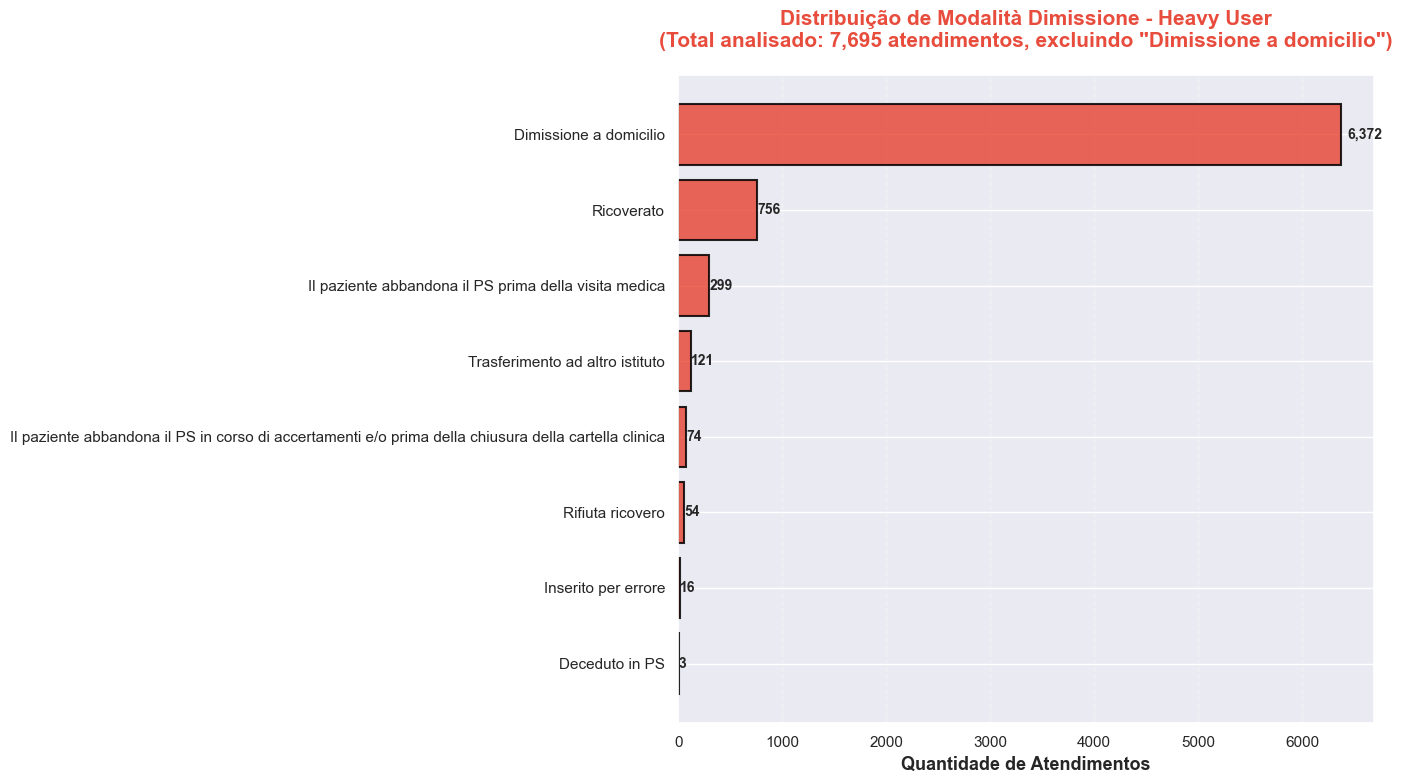

In [61]:
# Gráficos de barras horizontais por subgrupo - Modalità Dimissione (sem "Dimissione a domicilio")
cores_subgrupo_dim = {
    'Common user': '#2ecc71',
    'Frequent User': '#3498db',
    'High User': '#f39c12',
    'Heavy User': '#e74c3c'
}

# Criar gráficos individuais para cada subgrupo
for idx, subgrupo in enumerate(ordem_subgrupos):
    # Filtrar dados por subgrupo
    df_sub = df[df['Subgrupo Usuário'] == subgrupo]
    dimissione_counts = df_sub['Modalità Dimissione'].value_counts()
    
    # Remover "Dimissione a domicilio" para melhor visualização
    # dimissione_counts = dimissione_counts.drop('Dimissione a domicilio', errors='ignore')
    
    # Ordenar para melhor visualização
    dimissione_counts = dimissione_counts.sort_values(ascending=True)
    
    # Criar figura individual
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Criar gráfico de barras horizontais
    bars = ax.barh(range(len(dimissione_counts)), dimissione_counts.values,
                   color=cores_subgrupo_dim[subgrupo], edgecolor='black', 
                   linewidth=1.5, alpha=0.85)
    
    # Configurar eixos
    ax.set_yticks(range(len(dimissione_counts)))
    ax.set_yticklabels(dimissione_counts.index, fontsize=11)
    ax.set_xlabel('Quantidade de Atendimentos', fontsize=13, fontweight='bold')
    ax.set_title(f'Distribuição de Modalità Dimissione - {subgrupo}\n(Total analisado: {dimissione_counts.sum():,} atendimentos, excluindo "Dimissione a domicilio")', 
                 fontsize=15, fontweight='bold', pad=20,
                 color=cores_subgrupo_dim[subgrupo])
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Adicionar valores nas barras
    for i, v in enumerate(dimissione_counts.values):
        ax.text(v + (v * 0.01), i, f'{v:,}', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")  # Separador entre gráficos

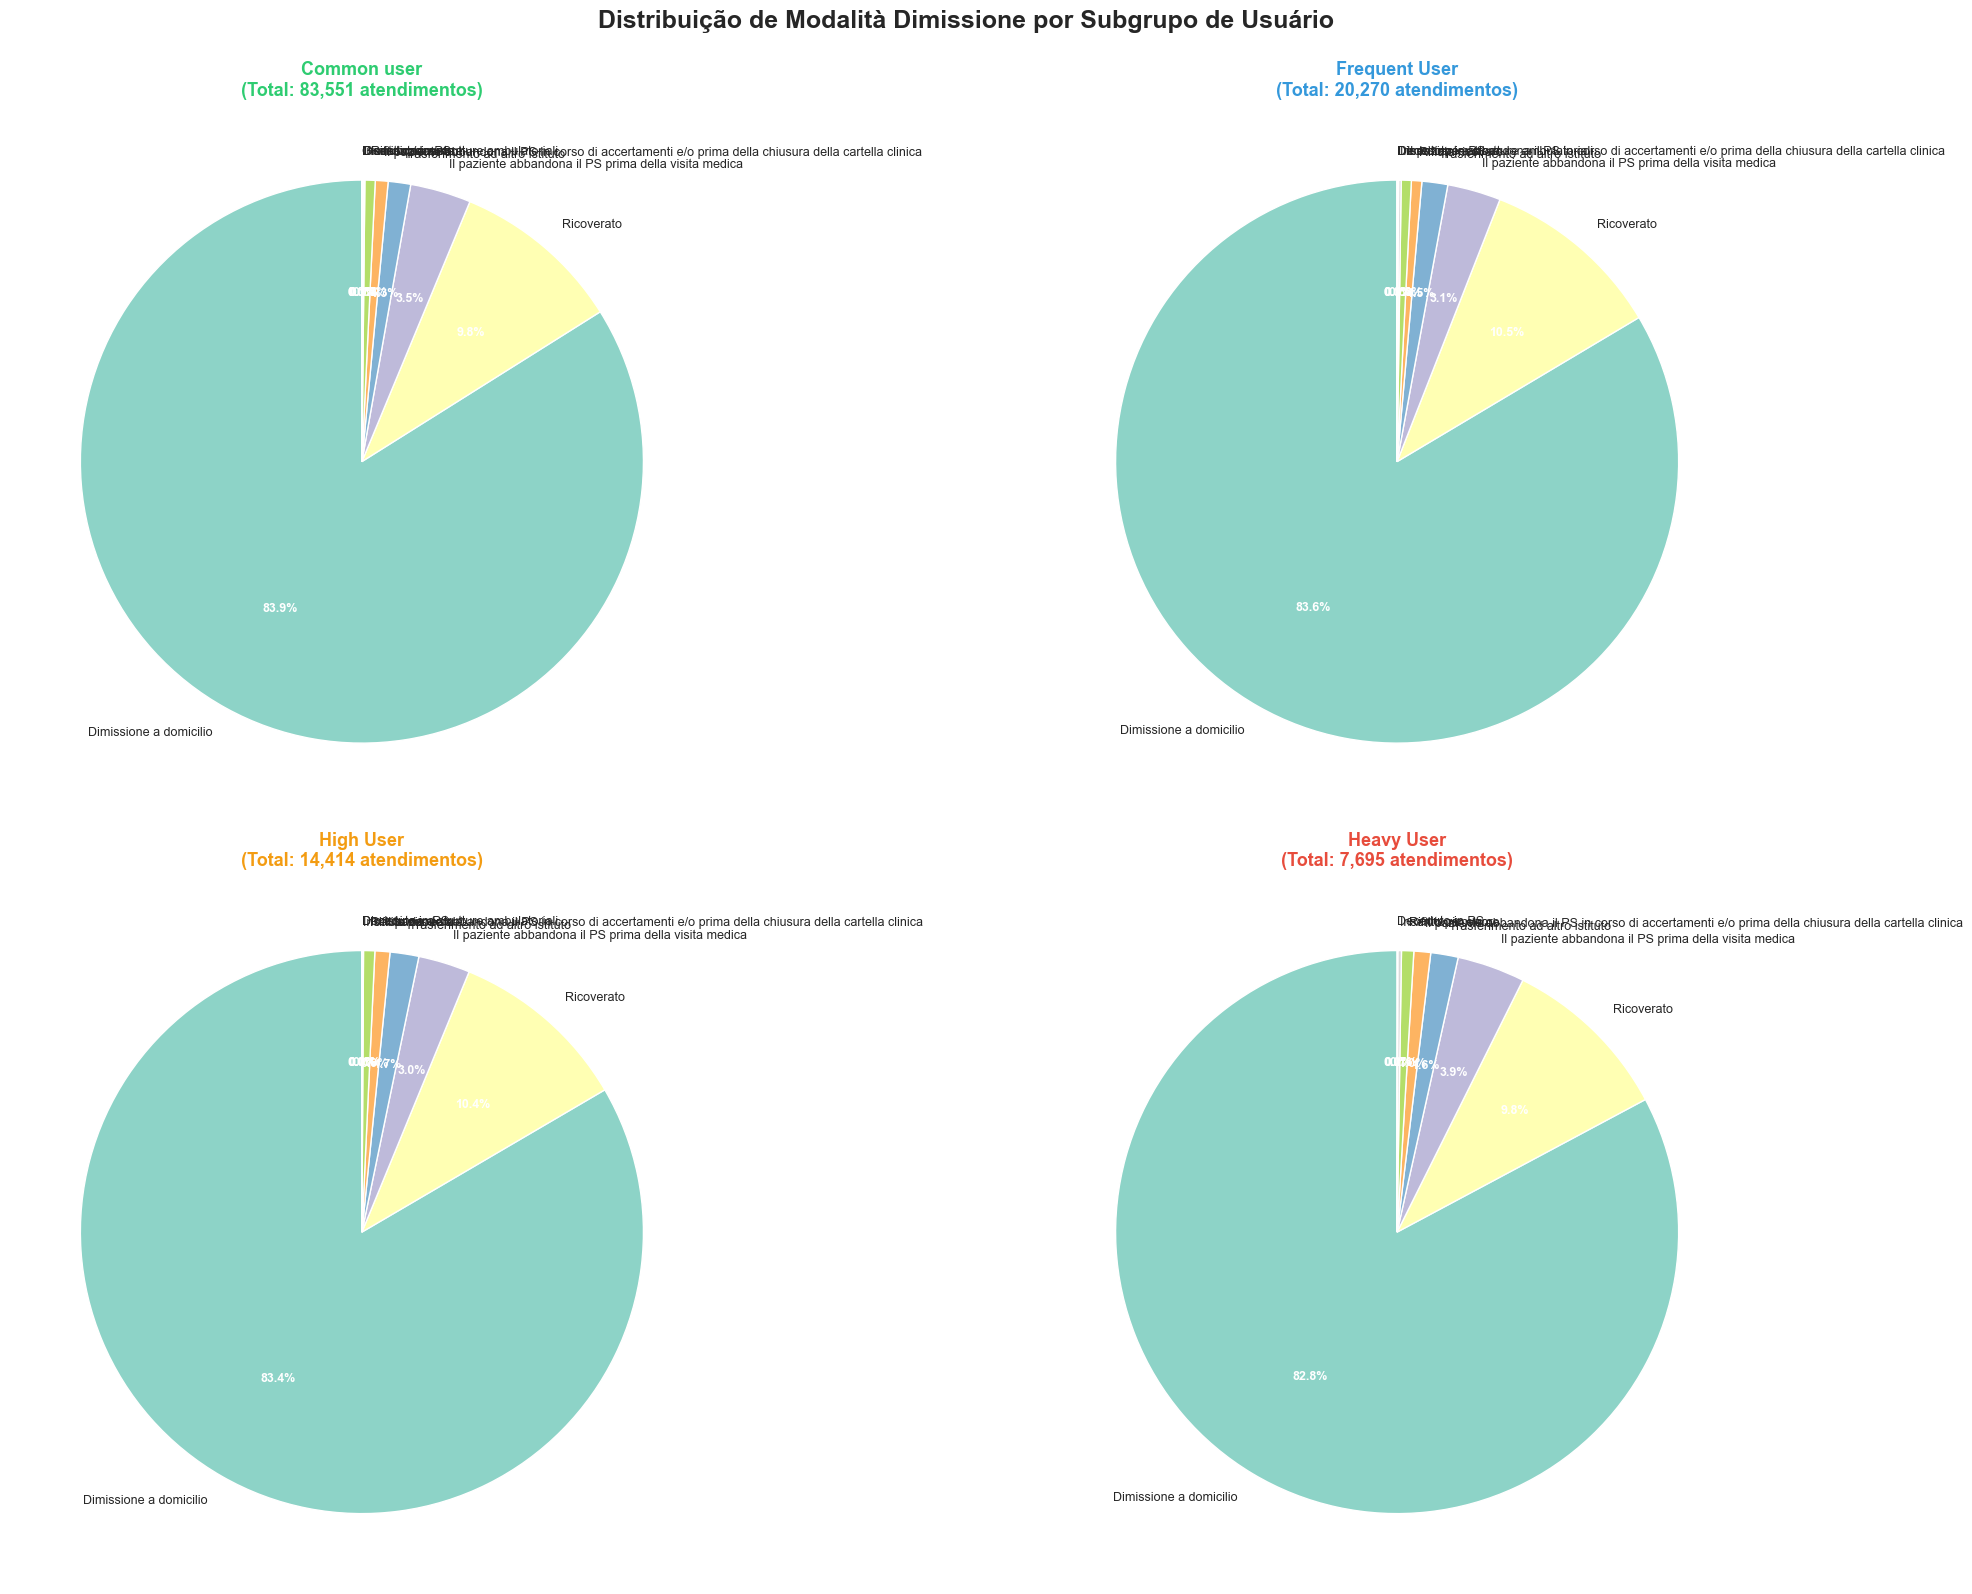

In [62]:
# Gráficos individuais por subgrupo - Modalità Dimissione
fig, axes = plt.subplots(2, 2, figsize=(22, 16))
fig.suptitle('Distribuição de Modalità Dimissione por Subgrupo de Usuário', 
             fontsize=18, fontweight='bold', y=0.995)

posicoes = [(0, 0), (0, 1), (1, 0), (1, 1)]
cores_subgrupo_dim = {
    'Common user': '#2ecc71',
    'Frequent User': '#3498db',
    'High User': '#f39c12',
    'Heavy User': '#e74c3c'
}

for idx, (subgrupo, pos) in enumerate(zip(ordem_subgrupos, posicoes)):
    ax = axes[pos[0], pos[1]]
    
    # Filtrar dados por subgrupo
    df_sub = df[df['Subgrupo Usuário'] == subgrupo]
    dimissione_counts = df_sub['Modalità Dimissione'].value_counts()
    # TODO RETIRAR "DIMISSIONE A DOMICILIO" DOS GRÁFICOS
    # dimissione_counts = dimissione_counts.drop('Dimissione a domicilio', errors='ignore')
    
    # Criar gráfico de pizza
    wedges, texts, autotexts = ax.pie(
        dimissione_counts.values, 
        labels=dimissione_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=cores_modalidades[:len(dimissione_counts)],
        textprops={'fontsize': 9}
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)
    
    ax.set_title(f'{subgrupo}\n(Total: {len(df_sub):,} atendimentos)', 
                 fontsize=13, fontweight='bold', pad=10,
                 color=cores_subgrupo_dim[subgrupo])

plt.tight_layout()
plt.show()

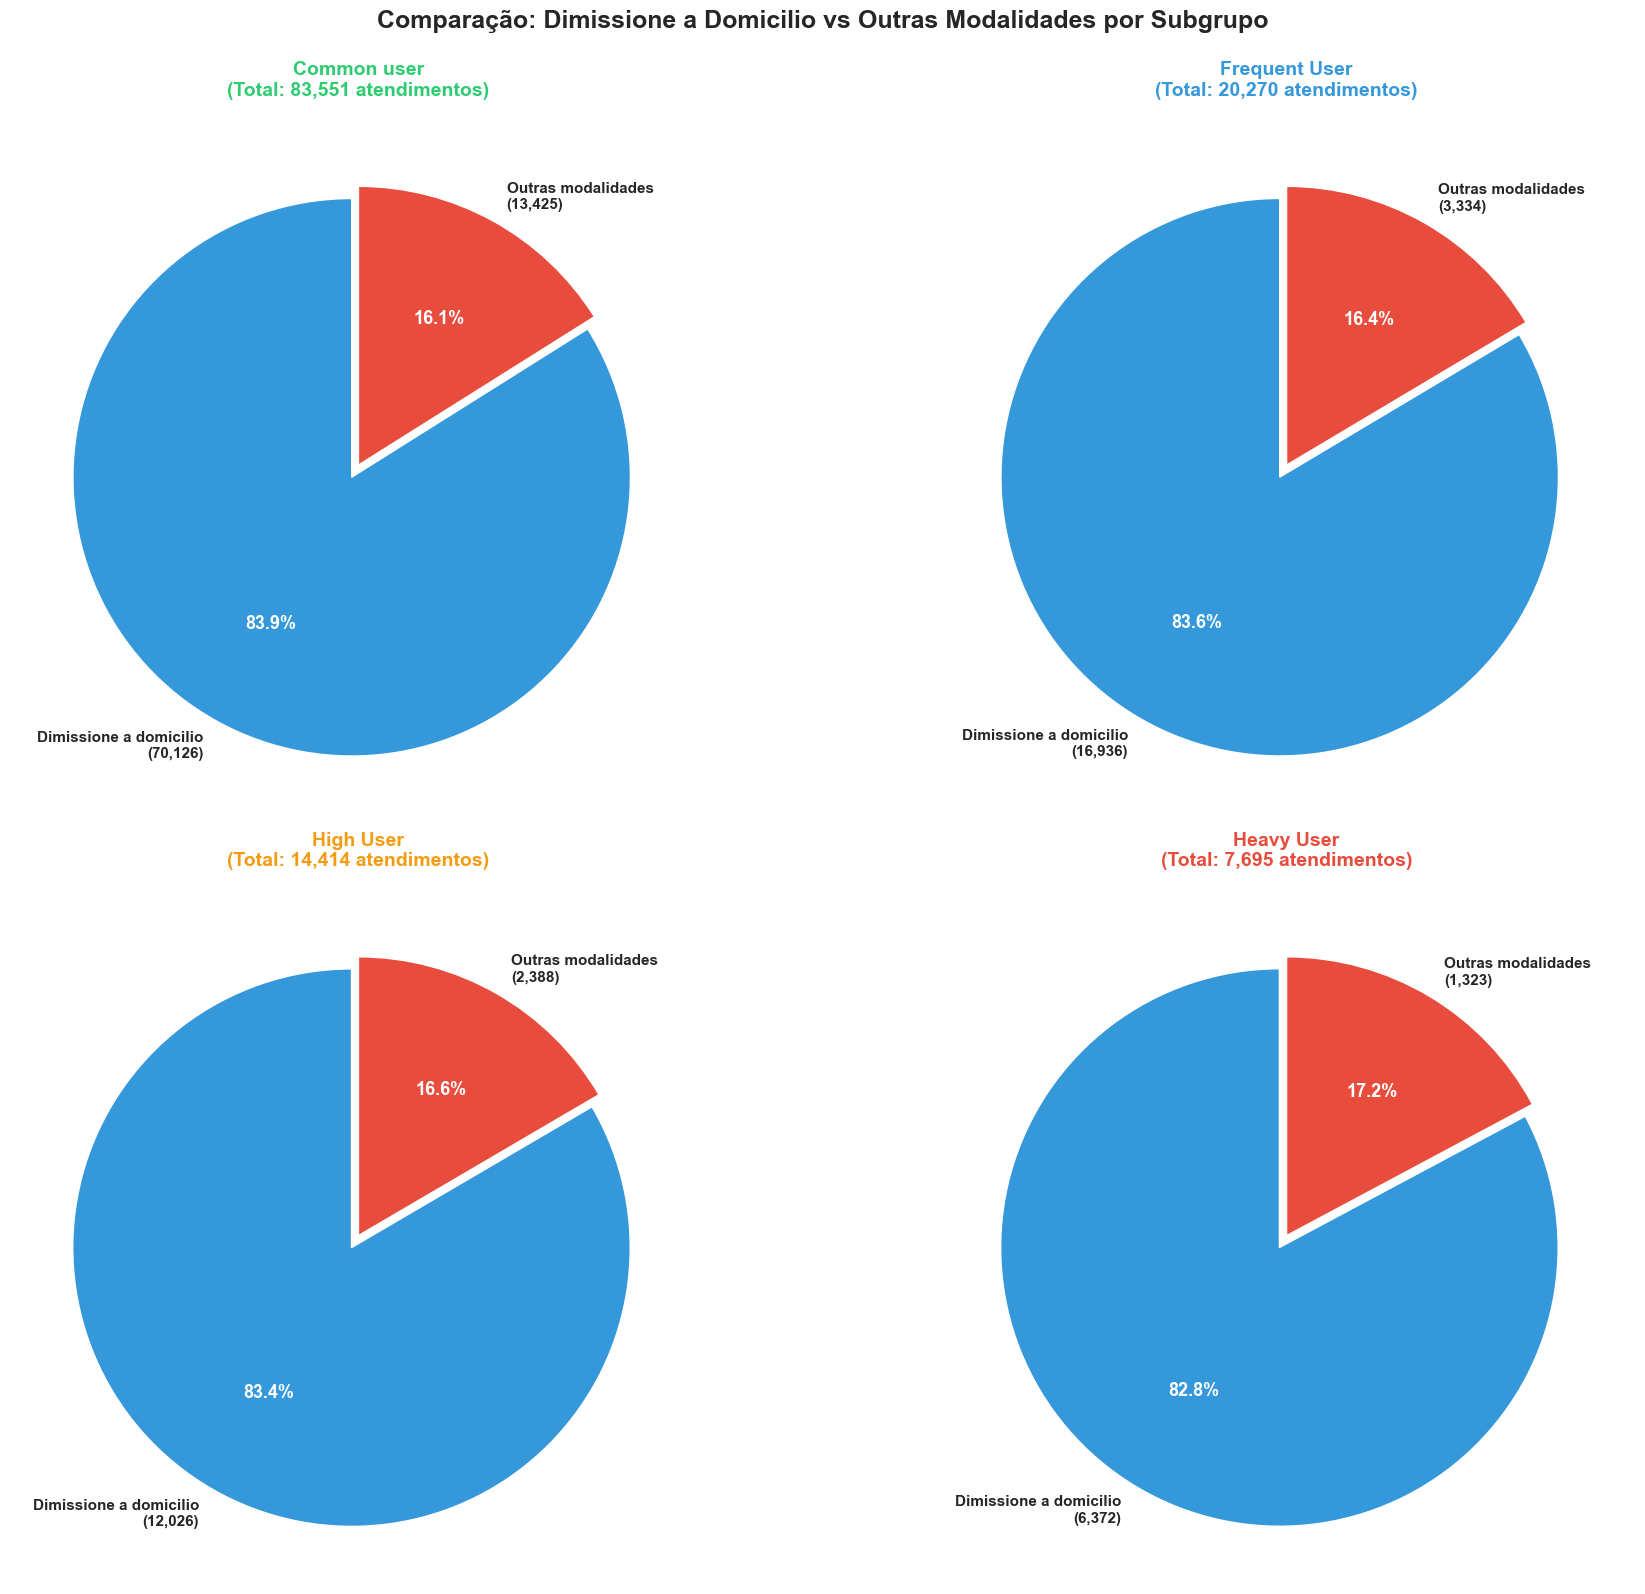


RESUMO: DIMISSIONE A DOMICILIO VS OUTRAS MODALIDADES


,Subgrupo,Dimissione a Domicilio,% Domicilio,Outras Modalidades,% Outras,Total
0,Common user,70126,83.9%,13425,16.1%,83551
1,Frequent User,16936,83.6%,3334,16.4%,20270
2,High User,12026,83.4%,2388,16.6%,14414
3,Heavy User,6372,82.8%,1323,17.2%,7695


In [63]:
# Gráfico comparativo: "Dimissione a domicilio" vs "Outras categorias"
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Comparação: Dimissione a Domicilio vs Outras Modalidades por Subgrupo', 
             fontsize=18, fontweight='bold', y=0.995)

posicoes = [(0, 0), (0, 1), (1, 0), (1, 1)]

for idx, (subgrupo, pos) in enumerate(zip(ordem_subgrupos, posicoes)):
    ax = axes[pos[0], pos[1]]
    
    # Filtrar dados por subgrupo
    df_sub = df[df['Subgrupo Usuário'] == subgrupo]
    dimissione_counts = df_sub['Modalità Dimissione'].value_counts()
    
    # Separar "Dimissione a domicilio" das outras
    domicilio = dimissione_counts.get('Dimissione a domicilio', 0)
    outras = dimissione_counts.drop('Dimissione a domicilio', errors='ignore').sum()
    
    # Dados para o gráfico
    categorias = ['Dimissione a domicilio', 'Outras modalidades']
    valores = [domicilio, outras]
    cores = ['#3498db', '#e74c3c']
    
    # Criar gráfico de pizza
    wedges, texts, autotexts = ax.pie(
        valores, 
        labels=categorias,
        autopct='%1.1f%%',
        startangle=90,
        colors=cores,
        textprops={'fontsize': 12, 'weight': 'bold'},
        explode=(0.05, 0)
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(13)
    
    # Adicionar contagens aos labels
    for i, (text, valor) in enumerate(zip(texts, valores)):
        text.set_text(f'{categorias[i]}\n({valor:,})')
        text.set_fontsize(11)
        text.set_fontweight('bold')
    
    ax.set_title(f'{subgrupo}\n(Total: {len(df_sub):,} atendimentos)', 
                 fontsize=14, fontweight='bold', pad=15,
                 color=cores_subgrupo_dim[subgrupo])

plt.tight_layout()
plt.show()

# Tabela resumo
print("\n" + "="*100)
print("RESUMO: DIMISSIONE A DOMICILIO VS OUTRAS MODALIDADES")
print("="*100)

resumo_domicilio = pd.DataFrame()

for subgrupo in ordem_subgrupos:
    df_sub = df[df['Subgrupo Usuário'] == subgrupo]
    dimissione_counts = df_sub['Modalità Dimissione'].value_counts()
    
    domicilio = dimissione_counts.get('Dimissione a domicilio', 0)
    outras = dimissione_counts.drop('Dimissione a domicilio', errors='ignore').sum()
    total = len(df_sub)
    
    temp_df = pd.DataFrame({
        'Subgrupo': [subgrupo],
        'Dimissione a Domicilio': [domicilio],
        '% Domicilio': [f"{(domicilio/total*100):.1f}%"],
        'Outras Modalidades': [outras],
        '% Outras': [f"{(outras/total*100):.1f}%"],
        'Total': [total]
    })
    
    resumo_domicilio = pd.concat([resumo_domicilio, temp_df], ignore_index=True)

display(resumo_domicilio)
print("="*100)

## 3.4. Caracterização por Problema Principale

In [64]:
# Top 10 problemas principais por subgrupo
print("TOP 10 PROBLEMAS PRINCIPAIS POR SUBGRUPO")
print("=" * 100)

for subgrupo in ordem_subgrupos:
    df_sub = df[df['Subgrupo Usuário'] == subgrupo]
    top_problemas = df_sub['Problema Principale'].value_counts().head(10)
    
    print(f"\n{subgrupo.upper()}")
    print("-" * 100)
    display(top_problemas)
    print()

TOP 10 PROBLEMAS PRINCIPAIS POR SUBGRUPO

COMMON USER
----------------------------------------------------------------------------------------------------


Problema Principale
Altri sintomi o disturbi                    24492
Trauma                                      20592
Dolore addominale                            7460
Dolore toracico                              4828
Sintomi o disturbi oculistici                3453
Febbre                                       3369
Sintomi o disturbi urologici                 3249
Altri sintomi sistema nervoso                3199
Dispnea                                      3140
Sintomi o disturbi otorinolaringoiatrici     2333
Name: count, dtype: int64



FREQUENT USER
----------------------------------------------------------------------------------------------------


Problema Principale
Altri sintomi o disturbi                    6557
Trauma                                      3517
Dolore addominale                           2012
Sintomi o disturbi urologici                1209
Dolore toracico                             1123
Dispnea                                      996
Febbre                                       884
Altri sintomi sistema nervoso                810
Sintomi o disturbi oculistici                726
Sintomi o disturbi otorinolaringoiatrici     671
Name: count, dtype: int64



HIGH USER
----------------------------------------------------------------------------------------------------


Problema Principale
Altri sintomi o disturbi                    4690
Trauma                                      2235
Dolore addominale                           1539
Sintomi o disturbi urologici                 928
Dolore toracico                              868
Dispnea                                      789
Altri sintomi sistema nervoso                621
Febbre                                       617
Sintomi o disturbi otorinolaringoiatrici     437
Sintomi o disturbi oculistici                433
Name: count, dtype: int64



HEAVY USER
----------------------------------------------------------------------------------------------------


Problema Principale
Altri sintomi o disturbi                    2488
Trauma                                       947
Dolore addominale                            861
Sintomi o disturbi urologici                 734
Dolore toracico                              575
Dispnea                                      426
Febbre                                       313
Altri sintomi sistema nervoso                296
Sintomi o disturbi oculistici                177
Sintomi o disturbi otorinolaringoiatrici     167
Name: count, dtype: int64

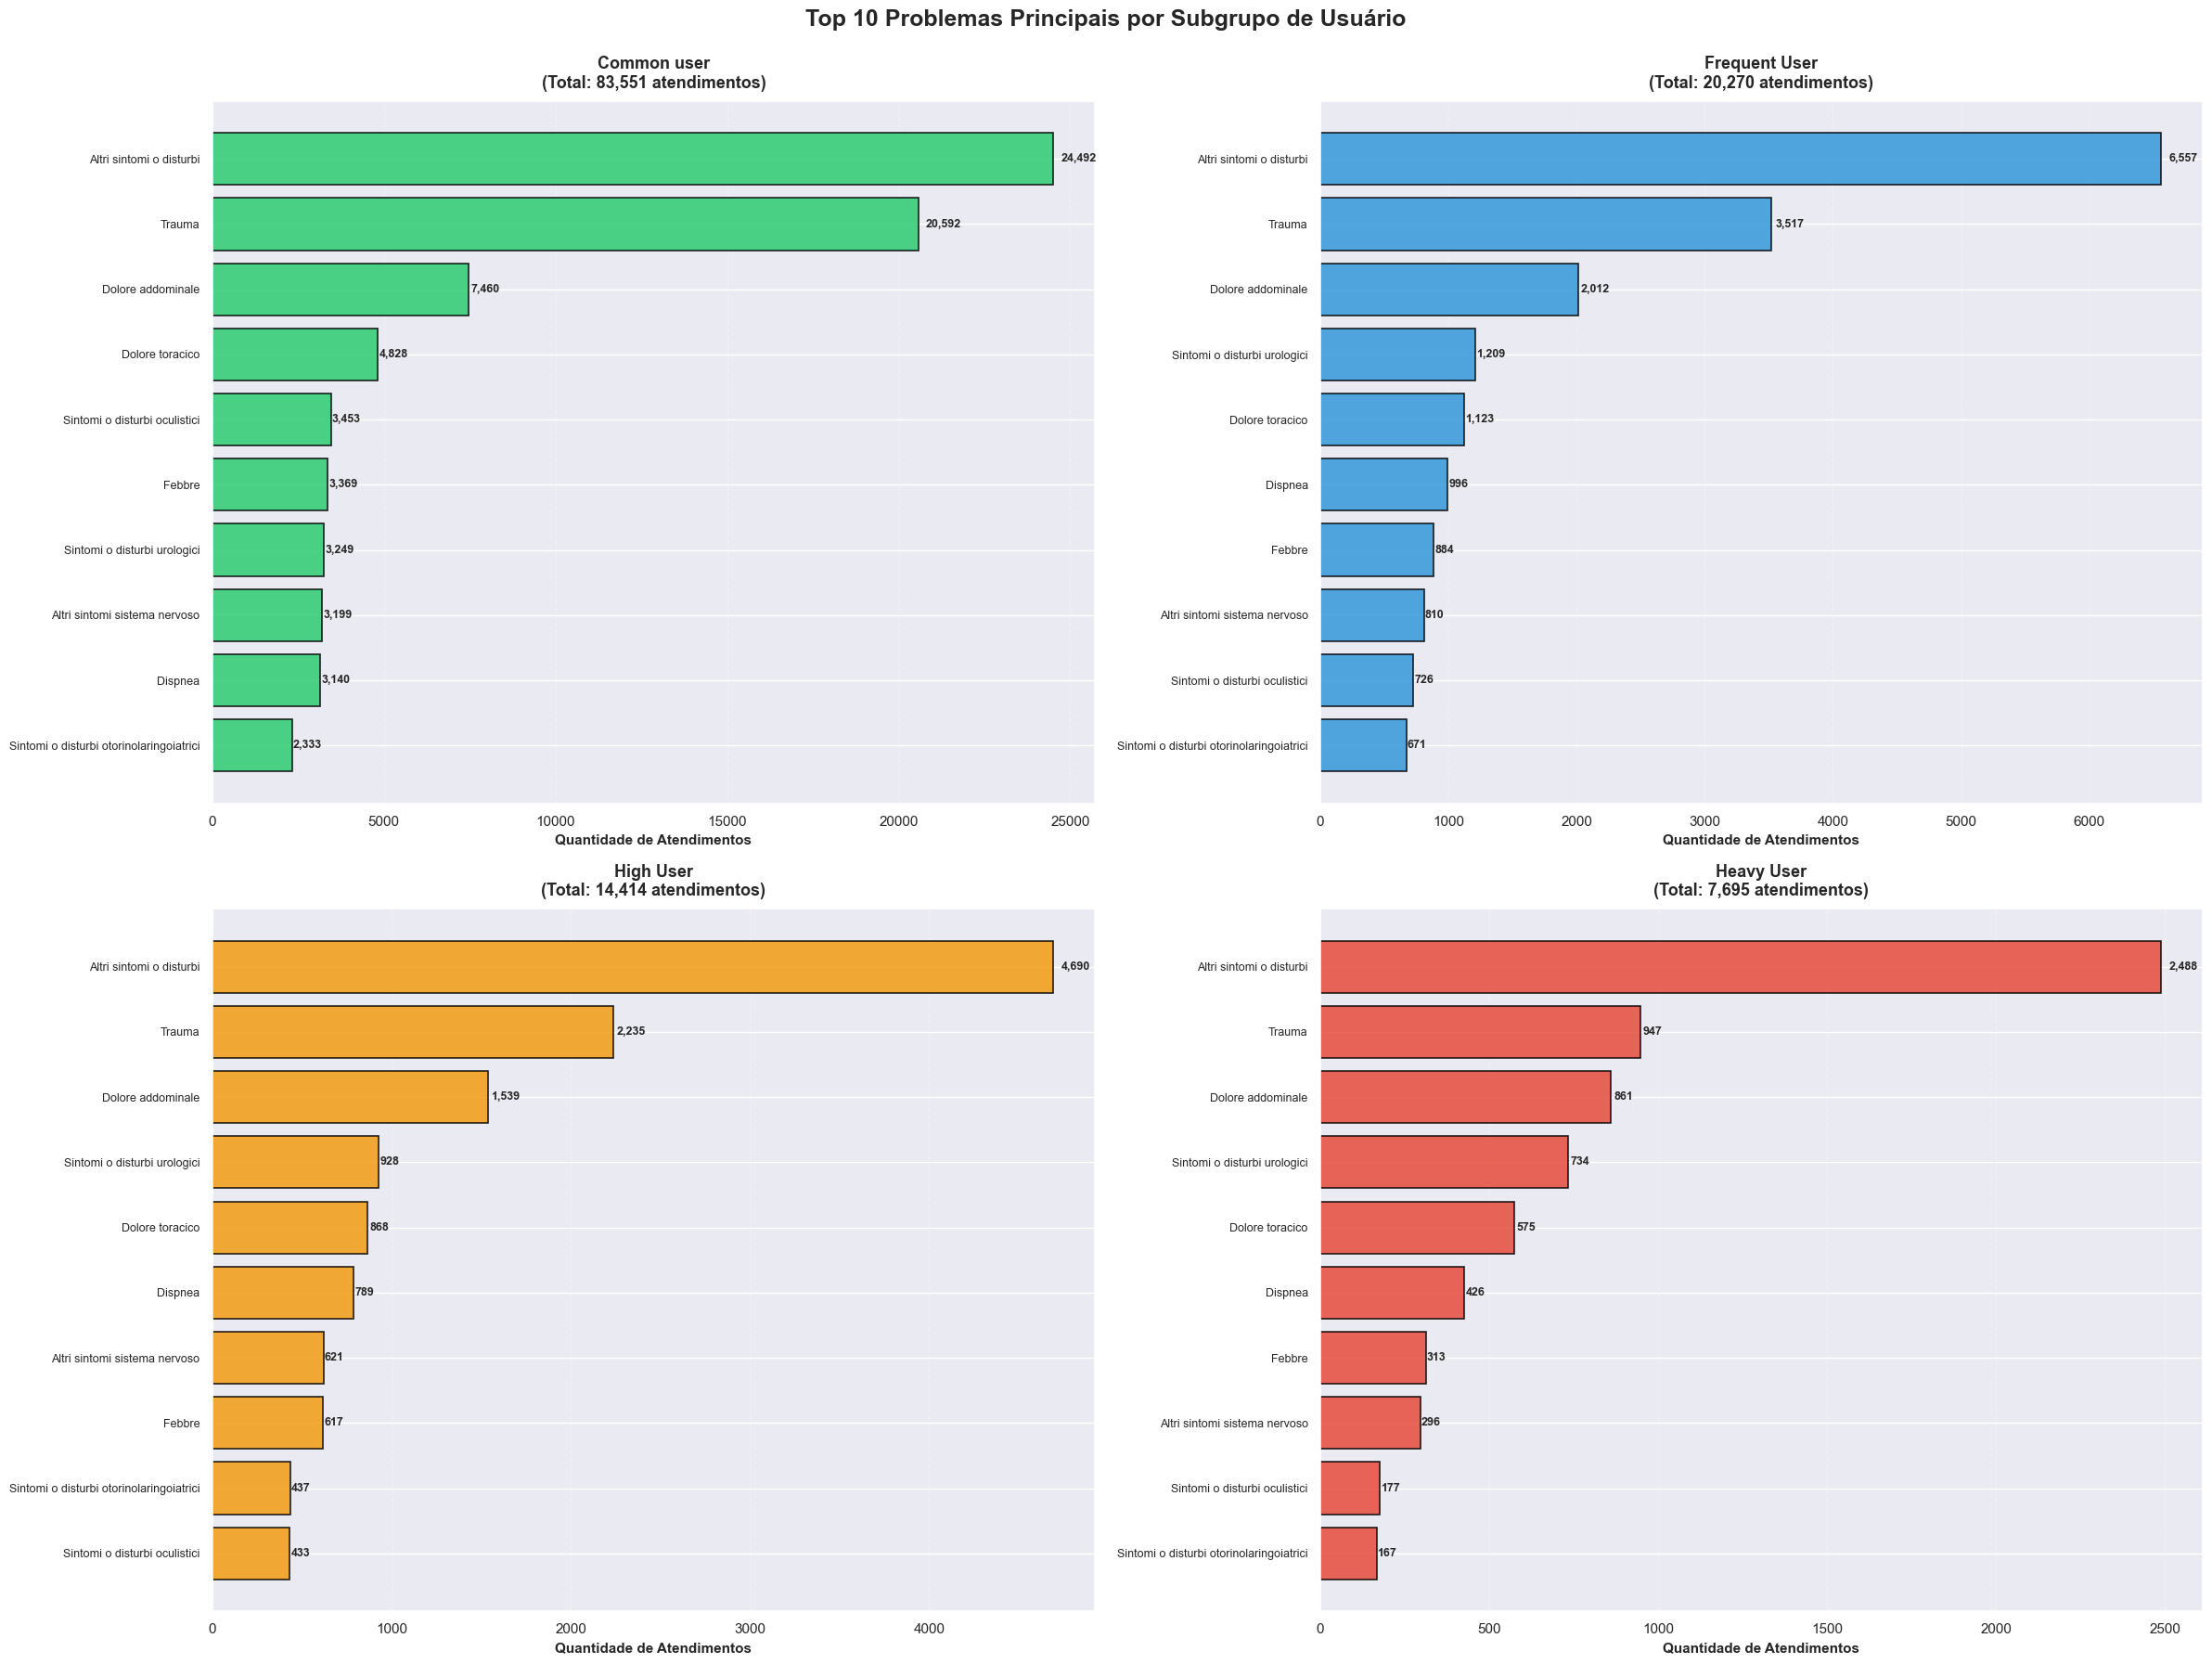

In [65]:
# Criar visualização em grid - Top 10 problemas por subgrupo
fig, axes = plt.subplots(2, 2, figsize=(24, 18))
fig.suptitle('Top 10 Problemas Principais por Subgrupo de Usuário', 
             fontsize=18, fontweight='bold', y=0.995)

cores_problemas = {
    'Common user': '#2ecc71',
    'Frequent User': '#3498db',
    'High User': '#f39c12',
    'Heavy User': '#e74c3c'
}

posicoes = [(0, 0), (0, 1), (1, 0), (1, 1)]

for idx, (subgrupo, pos) in enumerate(zip(ordem_subgrupos, posicoes)):
    ax = axes[pos[0], pos[1]]
    
    # Filtrar dados por subgrupo
    df_sub = df[df['Subgrupo Usuário'] == subgrupo]
    top_problemas = df_sub['Problema Principale'].value_counts().head(10).sort_values(ascending=True)
    
    # Criar gráfico de barras horizontais
    bars = ax.barh(
        range(len(top_problemas)), 
        top_problemas.values,
        color=cores_problemas[subgrupo],
        edgecolor='black',
        linewidth=1.2,
        alpha=0.85
    )
    
    # Configurar eixos
    ax.set_yticks(range(len(top_problemas)))
    ax.set_yticklabels(top_problemas.index, fontsize=9)
    ax.set_xlabel('Quantidade de Atendimentos', fontsize=11, fontweight='bold')
    ax.set_title(f'{subgrupo}\n(Total: {len(df_sub):,} atendimentos)', 
                 fontsize=13, fontweight='bold', pad=10)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Adicionar valores nas barras
    for i, v in enumerate(top_problemas.values):
        ax.text(v + (v * 0.01), i, f'{v:,}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [66]:
# Análise comparativa - Top 5 problemas entre subgrupos
print("\n" + "="*120)
print("ANÁLISE COMPARATIVA - TOP 5 PROBLEMAS POR SUBGRUPO")
print("="*120 + "\n")

tabela_comparativa_problemas = pd.DataFrame()

for subgrupo in ordem_subgrupos:
    df_sub = df[df['Subgrupo Usuário'] == subgrupo]
    top_problemas = df_sub['Problema Principale'].value_counts().head(5)
    
    # Calcular percentuais
    percentuais = (top_problemas / len(df_sub) * 100).round(2)
    
    # Criar DataFrame temporário
    temp_df = pd.DataFrame({
        'Subgrupo': subgrupo,
        'Posição': range(1, 6),
        'Problema': top_problemas.index,
        'Quantidade': top_problemas.values,
        'Percentual (%)': percentuais.values
    })
    
    tabela_comparativa_problemas = pd.concat([tabela_comparativa_problemas, temp_df], 
                                              ignore_index=True)

display(tabela_comparativa_problemas)


ANÁLISE COMPARATIVA - TOP 5 PROBLEMAS POR SUBGRUPO



,Subgrupo,Posição,Problema,Quantidade,Percentual (%)
0,Common user,1,Altri sintomi o disturbi,24492,29.31
1,Common user,2,Trauma,20592,24.65
2,Common user,3,Dolore addominale,7460,8.93
3,Common user,4,Dolore toracico,4828,5.78
4,Common user,5,Sintomi o disturbi oculistici,3453,4.13
5,Frequent User,1,Altri sintomi o disturbi,6557,32.35
6,Frequent User,2,Trauma,3517,17.35
7,Frequent User,3,Dolore addominale,2012,9.93
8,Frequent User,4,Sintomi o disturbi urologici,1209,5.96
9,Frequent User,5,Dolore toracico,1123,5.54


## 3.5. Relação Subgrupo / Número Total de Pacientes

In [67]:
# Análise de pacientes únicos por subgrupo
pacientes_por_subgrupo = df.groupby('Subgrupo Usuário')['Paziente'].nunique()
pacientes_por_subgrupo = pacientes_por_subgrupo.reindex(ordem_subgrupos)

# Total de pacientes únicos
total_pacientes = df['Paziente'].nunique()

# Calcular percentuais
percentuais_pacientes = (pacientes_por_subgrupo / total_pacientes * 100).round(2)

# Criar tabela resumo
resumo_pacientes = pd.DataFrame({
    'Subgrupo': ordem_subgrupos,
    'Pacientes Únicos': pacientes_por_subgrupo.values,
    'Percentual (%)': percentuais_pacientes.values,
    'Total Atendimentos': [len(df[df['Subgrupo Usuário'] == sub]) for sub in ordem_subgrupos],
    'Média Atend/Paciente': [(len(df[df['Subgrupo Usuário'] == sub]) / 
                               df[df['Subgrupo Usuário'] == sub]['Paziente'].nunique()) # TODO: Divisão por zero 
                              for sub in ordem_subgrupos]
})

print("\n" + "="*110)
print("RELAÇÃO SUBGRUPO / NÚMERO TOTAL DE PACIENTES")
print("="*110)
display(resumo_pacientes)
print("\n" + "="*110)
print(f"📊 TOTAL GERAL DE PACIENTES ÚNICOS: {total_pacientes:,}")
print(f"📊 TOTAL GERAL DE ATENDIMENTOS: {len(df):,}")
print(f"📊 MÉDIA GERAL ATENDIMENTOS/PACIENTE: {(len(df) / total_pacientes):.2f}")
print("="*110)


RELAÇÃO SUBGRUPO / NÚMERO TOTAL DE PACIENTES


,Subgrupo,Pacientes Únicos,Percentual (%),Total Atendimentos,Média Atend/Paciente
0,Common user,58213,87.96,83551,1.44
1,Frequent User,5051,7.63,20270,4.01
2,High User,2300,3.48,14414,6.27
3,Heavy User,616,0.93,7695,12.49



📊 TOTAL GERAL DE PACIENTES ÚNICOS: 66,180
📊 TOTAL GERAL DE ATENDIMENTOS: 125,930
📊 MÉDIA GERAL ATENDIMENTOS/PACIENTE: 1.90


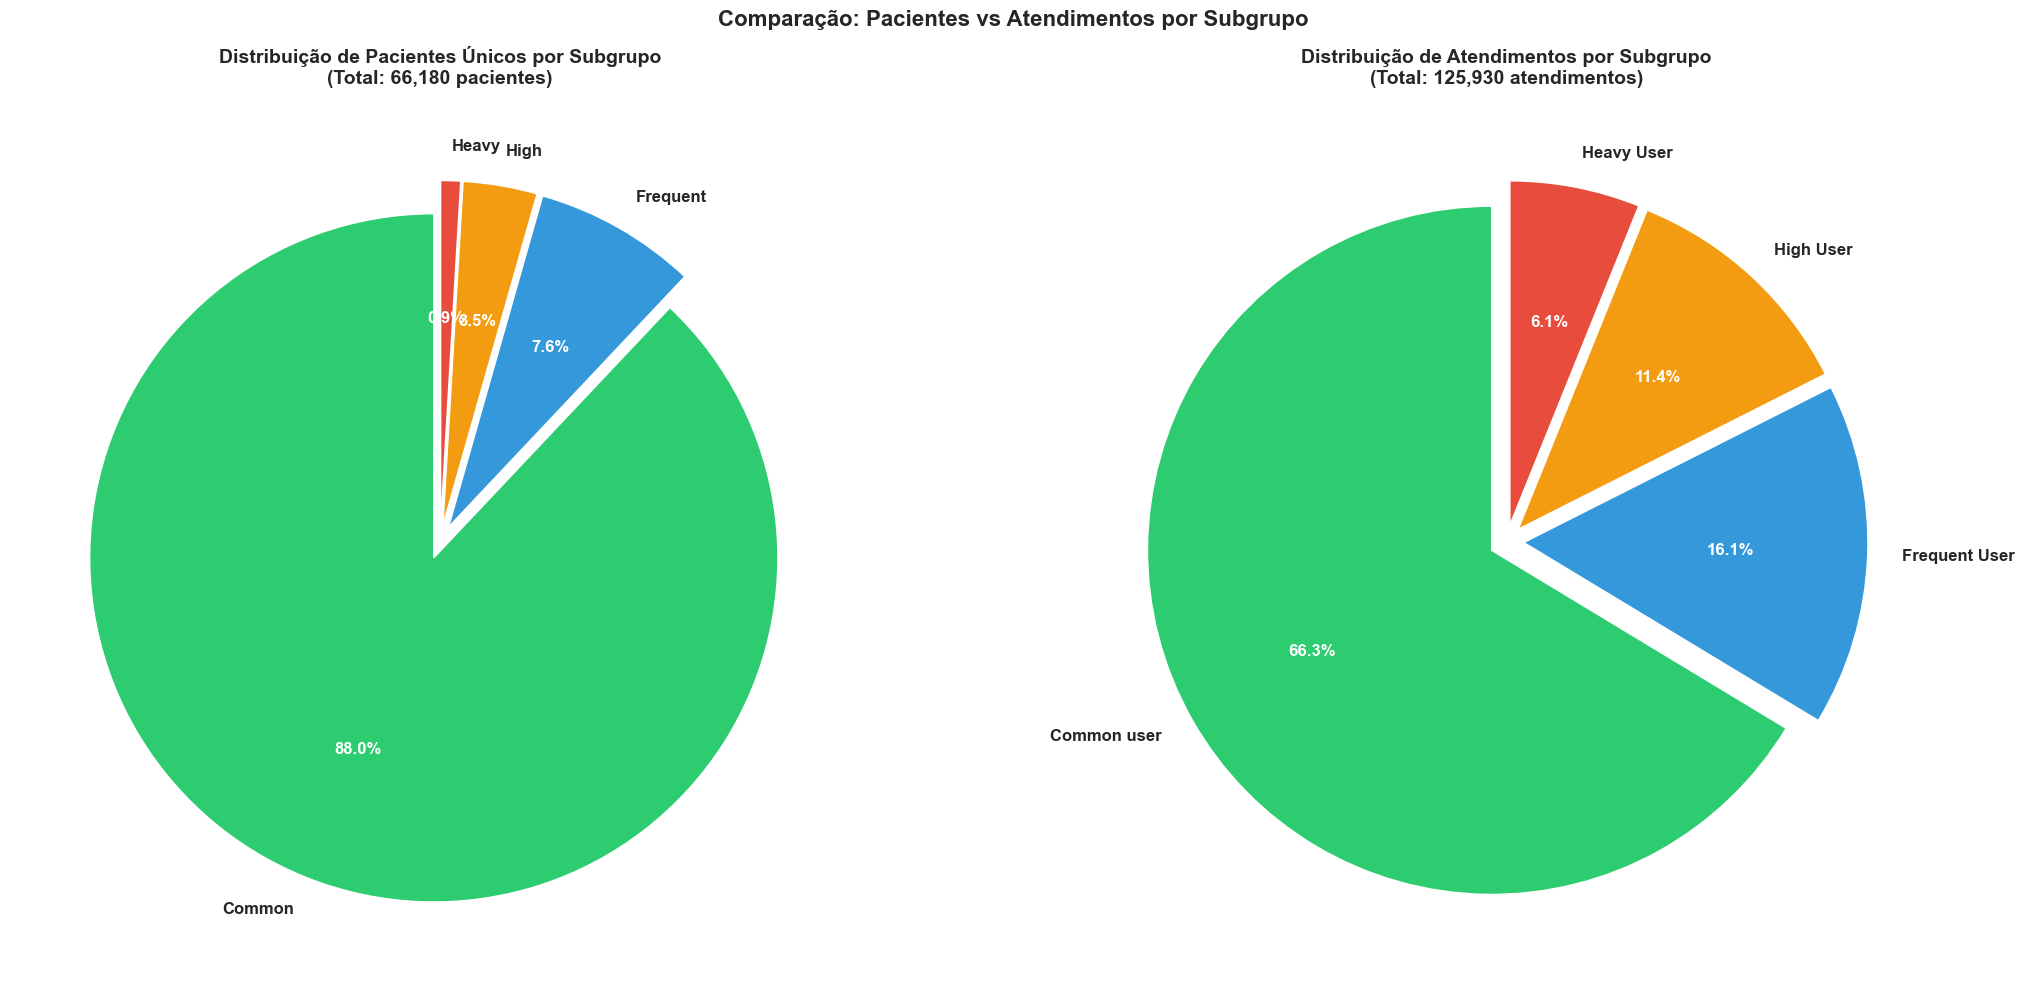

In [68]:
# Gráfico de pizza - Distribuição de pacientes únicos por subgrupo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

# Pizza 1: Pacientes únicos
cores_pizza = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
wedges1, texts1, autotexts1 = ax1.pie(
    pacientes_por_subgrupo.values, 
    labels=['Common', 'Frequent', 'High', 'Heavy'], # TODO ALTERAÇÃO PARA NÃO TRUNCAR AS LABELS  - labels=ordem_subgrupos,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores_pizza,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax1.set_title(f'Distribuição de Pacientes Únicos por Subgrupo\n(Total: {total_pacientes:,} pacientes)', 
              fontsize=14, fontweight='bold', pad=20)

# Pizza 2: Total de atendimentos
total_atend_por_sub = [len(df[df['Subgrupo Usuário'] == sub]) for sub in ordem_subgrupos]
wedges2, texts2, autotexts2 = ax2.pie(
    total_atend_por_sub, 
    labels=ordem_subgrupos,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores_pizza,
    textprops={'fontsize': 12, 'weight': 'bold'},
    explode=(0.05, 0.05, 0.05, 0.05)
)

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

ax2.set_title(f'Distribuição de Atendimentos por Subgrupo\n(Total: {len(df):,} atendimentos)', 
              fontsize=14, fontweight='bold', pad=20)

plt.suptitle('Comparação: Pacientes vs Atendimentos por Subgrupo', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

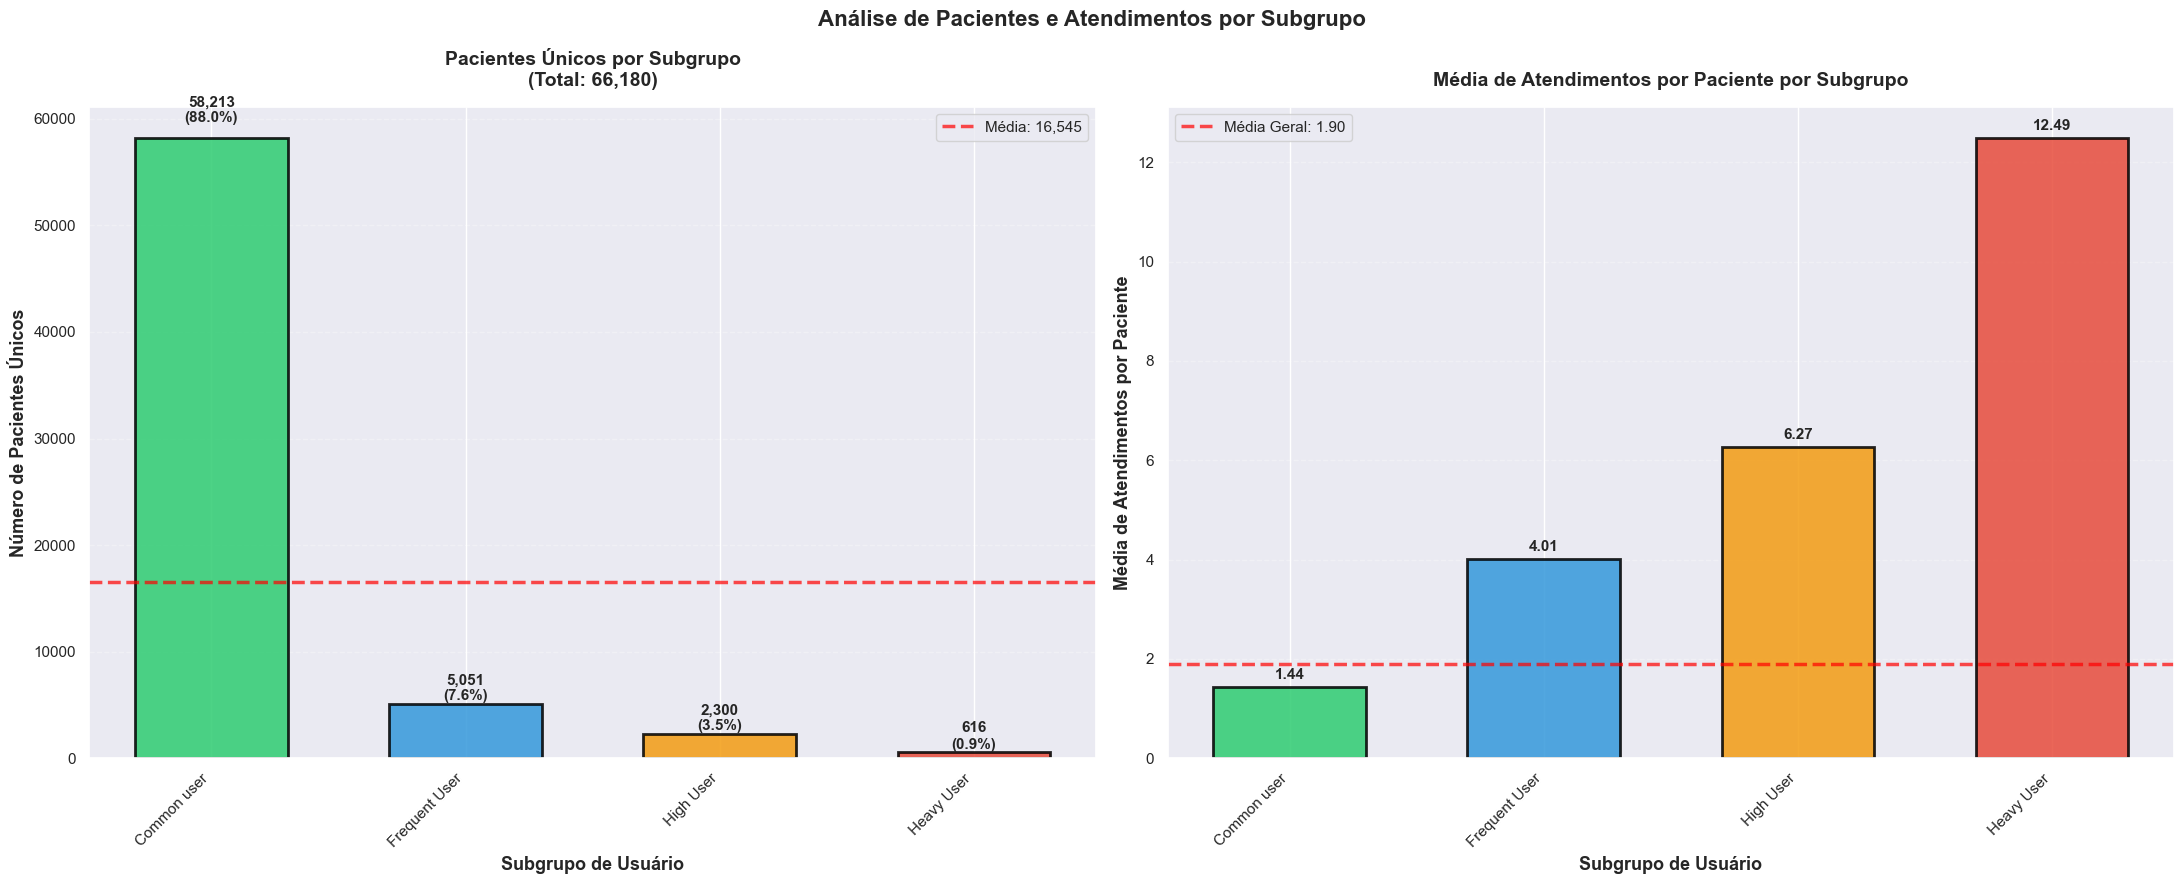

In [69]:
# Gráfico de barras comparativo - Pacientes vs Atendimentos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 9))

# Gráfico 1: Pacientes únicos
bars1 = ax1.bar(range(len(ordem_subgrupos)), pacientes_por_subgrupo.values,
                color=cores_pizza, edgecolor='black', linewidth=2, alpha=0.85, width=0.6)

ax1.set_xlabel('Subgrupo de Usuário', fontsize=13, fontweight='bold')
ax1.set_ylabel('Número de Pacientes Únicos', fontsize=13, fontweight='bold')
ax1.set_title(f'Pacientes Únicos por Subgrupo\n(Total: {total_pacientes:,})', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(range(len(ordem_subgrupos)))
ax1.set_xticklabels(ordem_subgrupos, rotation=45, ha='right', fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for i, (bar, valor, perc) in enumerate(zip(bars1, pacientes_por_subgrupo.values, 
                                             percentuais_pacientes.values)):
    ax1.text(bar.get_x() + bar.get_width()/2, valor + (valor * 0.02), 
             f'{valor:,}\n({perc:.1f}%)', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# Linha de média
media_pac = pacientes_por_subgrupo.mean()
ax1.axhline(y=media_pac, color='red', linestyle='--', linewidth=2.5, 
            label=f'Média: {media_pac:,.0f}', alpha=0.7)
ax1.legend(fontsize=11)

# Gráfico 2: Média de atendimentos por paciente
medias_atend = resumo_pacientes['Média Atend/Paciente'].values
bars2 = ax2.bar(range(len(ordem_subgrupos)), medias_atend,
                color=cores_pizza, edgecolor='black', linewidth=2, alpha=0.85, width=0.6)

ax2.set_xlabel('Subgrupo de Usuário', fontsize=13, fontweight='bold')
ax2.set_ylabel('Média de Atendimentos por Paciente', fontsize=13, fontweight='bold')
ax2.set_title('Média de Atendimentos por Paciente por Subgrupo', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xticks(range(len(ordem_subgrupos)))
ax2.set_xticklabels(ordem_subgrupos, rotation=45, ha='right', fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar valores nas barras
for i, (bar, valor) in enumerate(zip(bars2, medias_atend)):
    ax2.text(bar.get_x() + bar.get_width()/2, valor + 0.1, 
             f'{valor:.2f}', ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

# Linha de média
media_geral_atend = len(df) / total_pacientes
ax2.axhline(y=media_geral_atend, color='red', linestyle='--', linewidth=2.5, 
            label=f'Média Geral: {media_geral_atend:.2f}', alpha=0.7)
ax2.legend(fontsize=11)

plt.suptitle('Análise de Pacientes e Atendimentos por Subgrupo', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [70]:
# Insights finais
print("\n" + "="*110)
print("💡 INSIGHTS PRINCIPAIS DA ANÁLISE POR SUBGRUPOS")
print("="*110)

# 1. Subgrupo com mais pacientes
subgrupo_mais_pac = resumo_pacientes.loc[resumo_pacientes['Pacientes Únicos'].idxmax()]
print(f"\n1️⃣ SUBGRUPO COM MAIS PACIENTES:")
print(f"   • {subgrupo_mais_pac['Subgrupo']}: {subgrupo_mais_pac['Pacientes Únicos']:,} pacientes ({subgrupo_mais_pac['Percentual (%)']:.1f}%)")

# 2. Subgrupo com maior média de atendimentos/paciente
subgrupo_maior_media = resumo_pacientes.loc[resumo_pacientes['Média Atend/Paciente'].idxmax()]
print(f"\n2️⃣ SUBGRUPO COM MAIOR MÉDIA DE ATENDIMENTOS/PACIENTE:")
print(f"   • {subgrupo_maior_media['Subgrupo']}: {subgrupo_maior_media['Média Atend/Paciente']:.2f} atendimentos/paciente")

# 3. Comparação Heavy Users
heavy_users = resumo_pacientes[resumo_pacientes['Subgrupo'] == 'Heavy User'].iloc[0]
print(f"\n3️⃣ ANÁLISE DOS HEAVY USERS:")
print(f"   • Representam {heavy_users['Percentual (%)']:.1f}% dos pacientes ({heavy_users['Pacientes Únicos']:,} pessoas)")
print(f"   • Geraram {heavy_users['Total Atendimentos']:,} atendimentos")
print(f"   • Percentual dos atendimentos totais: {(heavy_users['Total Atendimentos'] / len(df) * 100):.1f}%")

# 4. Eficiência do sistema
common_users = resumo_pacientes[resumo_pacientes['Subgrupo'] == 'Common user'].iloc[0]
print(f"\n4️⃣ COMMON USERS (MAIORIA):")
print(f"   • Representam {common_users['Percentual (%)']:.1f}% dos pacientes ({common_users['Pacientes Únicos']:,} pessoas)")
print(f"   • Geraram {common_users['Total Atendimentos']:,} atendimentos")
print(f"   • Média de {common_users['Média Atend/Paciente']:.2f} atendimentos/paciente")

print("\n" + "="*110)


💡 INSIGHTS PRINCIPAIS DA ANÁLISE POR SUBGRUPOS

1️⃣ SUBGRUPO COM MAIS PACIENTES:
   • Common user: 58,213 pacientes (88.0%)

2️⃣ SUBGRUPO COM MAIOR MÉDIA DE ATENDIMENTOS/PACIENTE:
   • Heavy User: 12.49 atendimentos/paciente

3️⃣ ANÁLISE DOS HEAVY USERS:
   • Representam 0.9% dos pacientes (616 pessoas)
   • Geraram 7,695 atendimentos
   • Percentual dos atendimentos totais: 6.1%

4️⃣ COMMON USERS (MAIORIA):
   • Representam 88.0% dos pacientes (58,213 pessoas)
   • Geraram 83,551 atendimentos
   • Média de 1.44 atendimentos/paciente

